In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)
#library(DESeq2)

## Preprocessing

In [24]:
setwd("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/")

biom <- import_biom("all_cohorts_cadaver_deblur.biom")
map <- import_qiime_sample_data("all_cadaver_metadata.txt")
tree <- read_tree("rep_phylo.tre")
cadaver_nt <- merge_phyloseq(biom,tree,map)
cadaver_nt <- prune_samples(sample_sums(cadaver_nt) > 1000, cadaver_nt)
cadaver <- merge_phyloseq(biom,tree,map) %>%
    prune_samples((sample_sums(.) > 1000), .) %>%
    filter_taxa(function(x) sum(x > 3) > (0.001*length(x)), TRUE) %>%
    transform_sample_counts(function(x) x / sum(x))

saveRDS(cadaver_nt, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_nt.rds")
saveRDS(cadaver, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver.rds")
                                                      

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [5]:
cadaver_nt = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_nt.rds")
cadaver = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver.rds")

liver = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Liver_nt.rds")
spleen = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Spleen_nt.rds")
uterus = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Uterus_nt.rds")
prostate = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Prostate_nt.rds")
brain = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Brain_nt.rds")
heart = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Heart_nt.rds")



In [10]:
#temp - setup for supervised_learning.py

usa.liver = subset_samples(liver, Location=="USA")
italy.liver = subset_samples(liver, Location=="Italy")
finland.liver = subset_samples(liver, Location=="Finland")

usa.liver = prune_taxa(taxa_sums(usa.liver)>0, usa.liver)
italy.liver = prune_taxa(taxa_sums(italy.liver)>0, italy.liver)
finland.liver = prune_taxa(taxa_sums(finland.liver)>0, finland.liver)

#rarefy to even read depth, n = 5000
usa.liver.5krare = rarefy_even_depth(usa.liver, sample.size = 5000,
   replace = FALSE, trimOTUs = TRUE, verbose = TRUE)
italy.liver.5krare = rarefy_even_depth(italy.liver, sample.size = 5000,
   replace = FALSE, trimOTUs = TRUE, verbose = TRUE)
finland.liver.5krare = rarefy_even_depth(finland.liver, sample.size = 5000,
   replace = FALSE, trimOTUs = TRUE, verbose = TRUE)

saveRDS(usa.liver.5krare, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/usa.liver.5krare.rds")
saveRDS(italy.liver.5krare, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/italy.liver.5krare.rds")
saveRDS(finland.liver.5krare, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/finland.liver.5krare.rds")

usa.liver.5krare.otu = otu_table(usa.liver.5krare)
italy.liver.5krare.otu = otu_table(italy.liver.5krare)
finland.liver.5krare.otu = otu_table(finland.liver.5krare)

write.csv(usa.liver.5krare.otu, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/usa.liver.5krare.otu.csv")
write.csv(italy.liver.5krare.otu, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/italy.liver.5krare.otu.csv")
write.csv(finland.liver.5krare.otu, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/finland.liver.5krare.otu.csv")

usa.liver.5krare.map = sample_data(usa.liver.5krare)
italy.liver.5krare.map = sample_data(italy.liver.5krare)
finland.liver.5krare.map = sample_data(finland.liver.5krare)

write.csv(usa.liver.5krare.map, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/usa.liver.5krare.map.csv")
write.csv(italy.liver.5krare.map, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/italy.liver.5krare.map.csv")
write.csv(finland.liver.5krare.map, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/finland.liver.5krare.map.csv")


You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`

...
170OTUs were removed because they are no longer 
present in any sample after random subsampling

...
You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`

...
23 samples removedbecause they contained fewer reads than `sample.size`.
Up to first five removed samples are: 

Case51LiverCase85LiverCase82LiverCase36LiverCase80Liver	
...
215OTUs were removed because they are no longer 
present in any sample after random subsampling

...
You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`

...
28OTUs were removed because they are no longer 
present in any sample after random subsampling

...


In [9]:
#temp
temp = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/cadaver_5k_otu_table.csv")
write.table(temp, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/cadaver_5k_otu_table.txt")

In [4]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/all_meta.csv")

In [5]:
head(sample_tab)

Sample.ID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,Ethnicity,Order,Location,...,Organ,RTLID,Samplename,Cause_of_death,The_manner_of_death,Height_cm,Weight_kg,bmi,bmi_category,Description
4885.48Liver,AAAACAGT,GTGCCAGCMGCCGCGGTAA,4885,L638,M,65,C,4885,Finland,...,Liver,48,48-MS515F,Acute tubulo-interstitial nephritis,Natural,171,73,24.96,normal,4885.48_Liver
3813.13Liver,AAAACACA,GTGCCAGCMGCCGCGGTAA,3813,C15,F,40,C,3813,USA,...,Liver,13,13-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.13_Liver
4522.C28Liver,AAAACCGT,GTGCCAGCMGCCGCGGTAA,4522,C28,M,57,C,4522,USA,...,Liver,C28,C28LiverMS515F,Drowning,Accident,178,102,32.19,obese,4522.C28_Liver
Case51Liver,CGTTTGGAATGA,GTGTGYCAGCMGCCGCGGTAA,ASU1_C5,51,F,59,Caucasian,ITA,Italy,...,Liver,51,Case51Liver,Drowning,Accident,159,65,25.71,Overweight,Case51Liver
4522.C48Liver,AAAAGAAG,GTGCCAGCMGCCGCGGTAA,4522,C48,F,45,C,4522,USA,...,Liver,C48,C48LiverMS515F,Overdose,Accident,180,83,25.62,overweight,4522.C48_Liver
Case33Liver,ACATGATATTCT,GTGTGYCAGCMGCCGCGGTAA,ASU2_C10,33,M,70,Caucasian,ITA,Italy,...,Liver,33,Case33Liver,Ischemic heart disease,Natural death,178,97,30.61,Obese,Case33Liver


In [110]:
Ita <- all_meta[which(all_meta$Location=='Italy'),]

a <- Ita[which(Ita$MOD=='Accident'),]
b <- Ita[which(Ita$MOD=='Homicide'),]
c <- Ita[which(Ita$MOD=='Natural'),]
d <- Ita[which(Ita$MOD=='Suicide'),]

In [51]:
sample_tab %>% group_by(Location,Organ) %>% summarize(count=n())
#table(unlist(Ita$Case_no))

Location,Organ,count
Finland,Liver,20
Italy,Brain,35
Italy,Heart,29
Italy,Liver,36
Italy,Prostate,21
Italy,Spleen,24
Italy,Uterus,13
USA,Blood,7
USA,Brain,9
USA,Heart,11


In [12]:
count(sample_tab, vars=Organ)

vars,n
Blood,7
Brain,50
Heart,53
Liver,109
Mouth Swab,13
Prostate,25
Spleen,38
Uterus,15


In [5]:
Brain = subset_samples(cadaver_nt, Organ=="Brain")
Heart = subset_samples(cadaver_nt, Organ=="Heart")
Liver = subset_samples(cadaver_nt, Organ=="Liver")
Prostate = subset_samples(cadaver_nt, Organ=="Prostate")
Uterus = subset_samples(cadaver_nt, Organ=="Uterus")
Spleen = subset_samples(cadaver_nt, Organ=="Spleen")

In [4]:
Brain = readRDS("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Brain_nt.rds")
Heart = readRDS("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Heart_nt.rds")
Liver = readRDS("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Liver_nt.rds")
Prostate = readRDS("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Prostate_nt.rds")
Uterus = readRDS("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Uterus_nt.rds")
Spleen = readRDS("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/Spleen_nt.rds")

In [5]:
brain_otu = otu_table(Brain)
heart_otu = otu_table(Heart)
liver_otu = otu_table(Liver)
prostate_otu = otu_table(Prostate)
uterus_otu = otu_table(Uterus)
spleen_otu = otu_table(Spleen)

write.table(brain_otu, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/brain_otu.txt", sep="\t")
write.table(heart_otu, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/heart_otu.txt", sep="\t")
write.table(liver_otu, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/liver_otu.txt", sep="\t")
write.table(prostate_otu, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/prostate_otu.txt", sep="\t")
write.table(uterus_otu, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/uterus_otu.txt", sep="\t")
write.table(spleen_otu, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/spleen_otu.txt", sep="\t")

In [23]:
library(microbiomeSeq)

### Alpha Diversity Measures

##### Shannon Diversity Calculations

In [56]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
#sample_tab = read.csv("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/all_meta.csv")
colnames(sample_tab)[1] <- "SampleID"

In [60]:
Ita = subset_samples(cadaver_nt, Location=="Italy")
Fin = subset_samples(cadaver_nt, Location=="Finland")
USA = subset_samples(cadaver_nt, Location=="USA")

Euro = merge_phyloseq(Ita,Fin)
Euro_liver = subset_samples(Euro, Organ=="Liver")
all_liver = subset_samples(cadaver_nt, Organ=="Liver")

In [61]:
#By MOD

sha = estimate_richness(na.omit(all_liver), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("Location") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("Location")

stats.sha = dfsha %>%
    group_by(Location) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

Location,median,mean,sd,sem
Finland,0.3978866,0.5622249,0.4722966,0.1056087
Italy,1.8067530,1.8267020,0.6116528,0.1019421
USA,2.5044232,2.2007063,1.4517678,0.2117621


In [22]:
#Record Stats
cat("Tests Output", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt")
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
cat("Shannon Div stats\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(stats.sha, file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)

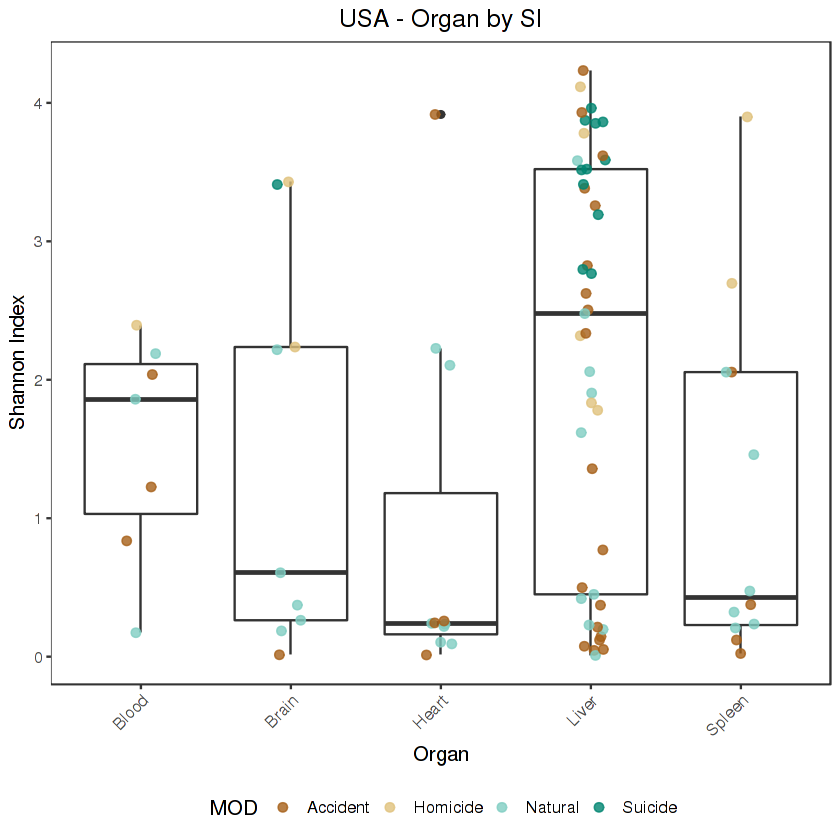

In [65]:
#dfsha$The.manner.of.death <- factor(dfsha$The.manner.of.death, levels=c("Accident", "Natural","Homicide", "Suicide"))

p = ggplot(na.omit(dfsha), aes(x = Organ, y = Shannon)) + ggtitle("USA - Organ by SI")

p = p + geom_boxplot() + ylab("Shannon Index")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

#p = p + scale_y_continuous(limits = c(0,1200))

p = p + geom_point(size = 2,alpha=.8, aes(color = MOD),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_brewer(palette="BrBG")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())
                           

#p = p + facet_wrap(~Location)

p

In [62]:
krusk = kruskal.test(Shannon ~ Location, data=dfsha) 
krusk


	Kruskal-Wallis rank sum test

data:  Shannon by Location
Kruskal-Wallis chi-squared = 26.874, df = 2, p-value = 1.46e-06


In [63]:
library(dunn.test)
dunn = dunn.test()
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 26.8743, df = 2, p-value = 0


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |    Finland      Italy
---------+----------------------
   Italy |  -4.090436
         |    0.0000*
         |
     USA |  -5.106688  -1.005042
         |    0.0000*     0.1574

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 26.87434

$Z
[1] -4.090436 -5.106689 -1.005043

$P
[1] 2.152812e-05 1.639267e-07 1.574382e-01

$P.adjusted
[1] 3.229218e-05 4.917800e-07 1.574382e-01

$comparisons
[1] "Finland - Italy" "Finland - USA"   "Italy - USA"

In [23]:
#Record Stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
# export kruskal-wallis
cat("Shannon Div Krsukal-Wallis\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(krusk, file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
# add 2 newlines
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
# export dunn.test
cat("Shannon Div Dunn Test\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(dunn, file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)

### Observed Diversity Calculations

In [64]:
obs = estimate_richness(USA, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

In [74]:
#Export to local to remove "X"'s in front of SampleID, reimport and continue - try setting as.factor next time
#write.csv(obs, "/gpfs/data/gilbert-lab/Lutz/Cadaver/temp_obs.csv")
obs = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/temp_obs.csv", check.names=FALSE)

In [70]:
head(obs)

Observed,SampleID
14,3813.25Heart
137,3813.32Spleen
158,3813.13Liver
74,4522.C28Liver
21,4522.C48Liver
71,4522.G14Liver


In [68]:
dfobs = merge(obs, sample_tab, on="SampleID")

ordobs = obs %>% group_by("Organ") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Organ")

stats.obs = dfobs %>%
    group_by(Organ) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

Organ,median,mean,sd,sem
Blood,61,62.28571,44.52233,16.827860
Brain,62,93.77778,77.46254,25.820845
Heart,40,68.09091,72.25296,21.785089
Liver,87,92.95745,62.67964,9.142765
Spleen,73,92.08333,78.17284,22.566554


In [30]:
#Record Stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
cat("Obs Richness stats\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(stats.obs, file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)


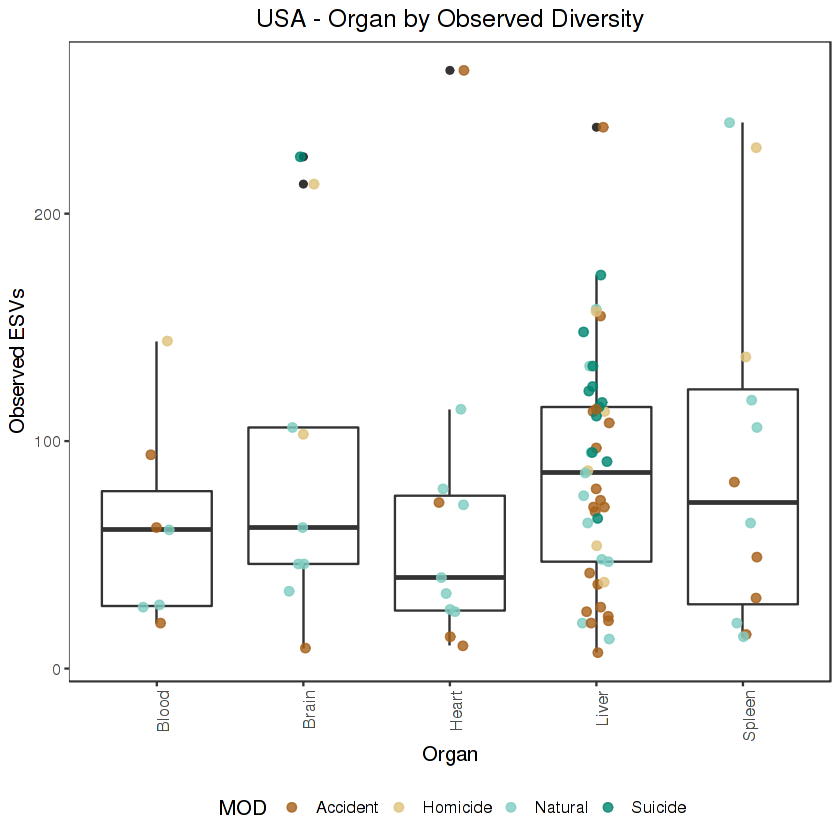

In [72]:
#dfobs$The_manner_of_death <- factor(dfobs$The_manner_of_death, levels=c("Accident", "Natural","Homicide", "Suicide"))

p = ggplot(na.omit(dfobs), aes(x = Organ, y = Observed)) + ggtitle("USA - Organ by Observed Diversity")

p = p + geom_boxplot() + ylab("Observed ESVs")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

#p = p + scale_y_continuous(limits = c(0,1200))

p = p + geom_point(size = 2,alpha=.8, aes(color = MOD),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_brewer(palette="BrBG")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())


p

In [69]:
krusk = kruskal.test(Observed ~ Organ, data=dfobs) 
krusk


	Kruskal-Wallis rank sum test

data:  Observed by Organ
Kruskal-Wallis chi-squared = 4.0478, df = 4, p-value = 0.3996


In [70]:
library(dunn.test)
dunn = dunn.test(dfobs$Observed, g=dfobs$Organ, method="BH")
dunn

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 4.0478, df = 4, p-value = 0.4


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |      Blood      Brain      Heart      Liver
---------+--------------------------------------------
   Brain |  -0.718443
         |     0.3937
         |
   Heart |   0.073694   0.884809
         |     0.5229     0.4703
         |
   Liver |  -1.321266  -0.476098  -1.704541
         |     0.4660     0.3963     0.4414
         |
  Spleen |  -0.779995  -0.020184  -0.974053   0.508073
         |     0.4354     0.4919     0.5500     0.4367

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 4.047848

$Z
 [1] -0.71844307  0.07369497  0.88480958 -1.32126683 -0.47609883 -1.70454178
 [7] -0.77999541 -0.02018453 -0.97405350  0.50807367

$P
 [1] 0.23624207 0.47062655 0.18812967 0.09320621 0.31700199 0.04413996
 [7] 0.21769679 0.49194808 0.16501499 0.30570084

$P.adjusted
 [1] 0.3937368 0.5229184 0.4703242 0.4660310 0.3962525 0.4413996 0.4353936
 [8] 0.4919481 0.5500500 0.4367155

$comparisons
 [1] "Blood - Brain"  "Blood - Heart"  "Brain - Heart"  "Blood - Liver" 
 [5] "Brain - Liver"  "Heart - Liver"  "Blood - Spleen" "Brain - Spleen"
 [9] "Heart - Spleen" "Liver - Spleen"

In [46]:
#Record Stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
# export kruskal-wallis
cat("Observed Richness Krsukal-Wallis\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(krusk, file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
# add 2 newlines
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
# export dunn.test
cat("Observed Richness Dunn Test\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(dunn, file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)

### Regression of richness by PMI

In [167]:
USA = subset_samples(cadaver_nt, Location=="USA")

In [178]:
obs = estimate_richness(Fin, split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)

In [181]:
#Export to local to remove "X"'s in front of SampleID, reimport and continue - try setting as.factor next time
#write.csv(obs, "/gpfs/data/gilbert-lab/Lutz/Cadaver/temp_obs.csv")
obs = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/temp_obs.csv", check.names=FALSE)

In [129]:
dfobs2 <- dfobs[which(dfobs$PMI < 100), ] 

#dfobs = subset(dfobs, PMI"240")

head(as.factor(dfobs2$PMI))

[1] 72 72 72 72 72 96
Levels: 24 32 36 38 42 48 60 65 72 77 96

In [182]:
dfobs = merge(obs, sample_tab, on="SampleID")

#dfobs = subset(dfobs, PMI!="240")

ordobs = obs %>% group_by("Organ") %>%
    summarize(med.obs = median(Observed)) %>%
    arrange(desc(med.obs)) %>%
    magrittr::extract2("Organ")

stats.obs = dfobs %>%
    group_by(Organ) %>%
    summarize(median = median(Observed), 
              mean = mean(Observed),
              sd = sd(Observed),
              sem = sd(Observed/sqrt(length(Observed)))) #%>%
    #arrange(-desc(mean))
stats.obs

Organ,median,mean,sd,sem
Liver,11.5,13.8,8.095483,1.810205


In [94]:
head(as.factor(dfobs$PMI))

[1] 19   19   19   19   19   55.5
37 Levels: 3.5 4 6 10 11.5 12 13 13.5 14 15.5 19 19.5 22 22.5 23 24.5 27 ... 240

In [85]:
dfobs$Organ = as.character(dfobs$Organ)
a <- within(dfobs, Organ[Organ == 'Uterus'] <- 'H_Uterus') 
b <- within(a, Organ[Organ == 'Liver'] <- 'A_Liver') 
c <- subset(dfobs, Organ!="Blood")
#d <- within(c, Organ[Organ == 'Spleen'] <- 'Spleen') 
e <- within(d, Organ[Organ == 'Prostate'] <- 'Prostate') 
#f <- within(e, Organ[Organ == 'Uterus'] <- 'Uterus') 

ERROR: Error in within(d, Organ[Organ == "Prostate"] <- "Prostate"): object 'd' not found


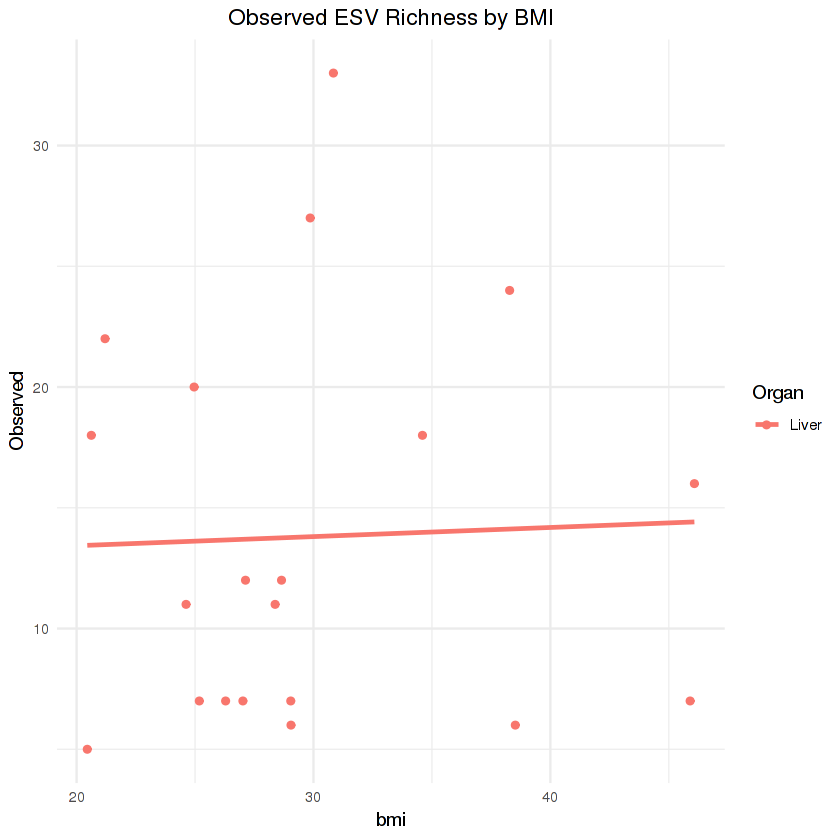

In [183]:
#p1 = ggplot(c, aes(x=PMI, y=Observed, colour = Organ)) + geom_point() + 
#        ggtitle("Observed ESV Richness by Post-mortem sampling interval")
#p1 = p1 + geom_smooth(method = "lm", se=FALSE)#, alpha=.2)#, colour = "grey55") #"loess"
#p1 = p1 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
#p1 = p1 + scale_colour_gradient(low = "grey78", high = "black")
#p1 = p1 + scale_color_brewer(palette = "BrBG")
#p1


p2 = ggplot(dfobs, aes(x=bmi, y=Observed, colour = Organ)) + geom_point() + 
        ggtitle("Observed ESV Richness by BMI") #+
    #scale_x_continuous(limits = c(0,100))
p2 = p2 + geom_smooth(method = "lm", se=FALSE, alpha=.2)
p2 = p2 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
#p2 = p2 + scale_colour_manual(values = c("saddlebrown", "lightseagreen", "slateblue1"))
p2

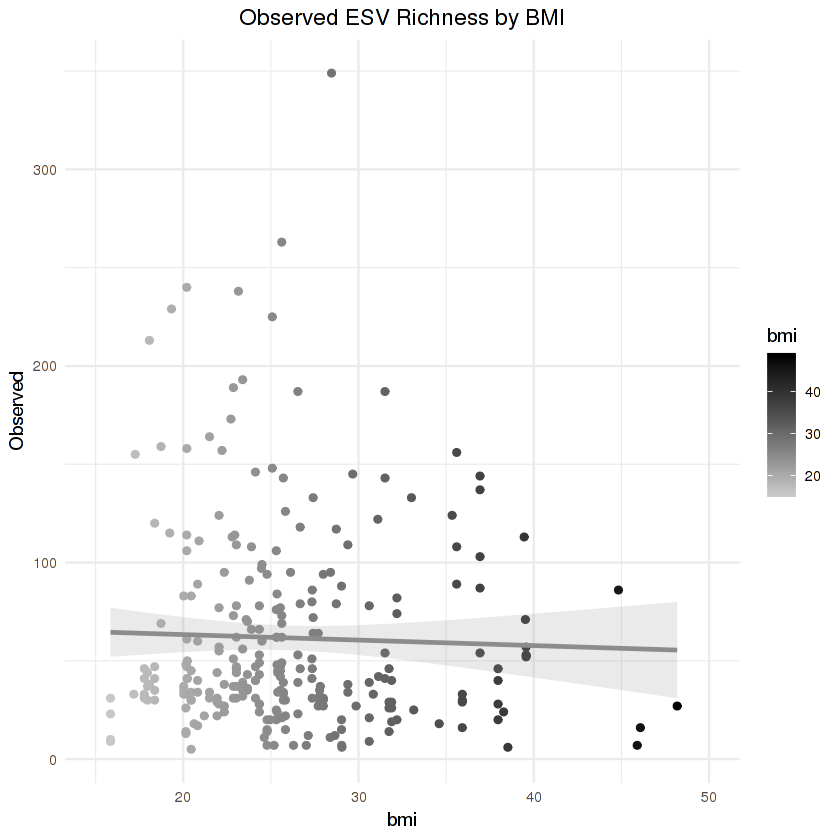

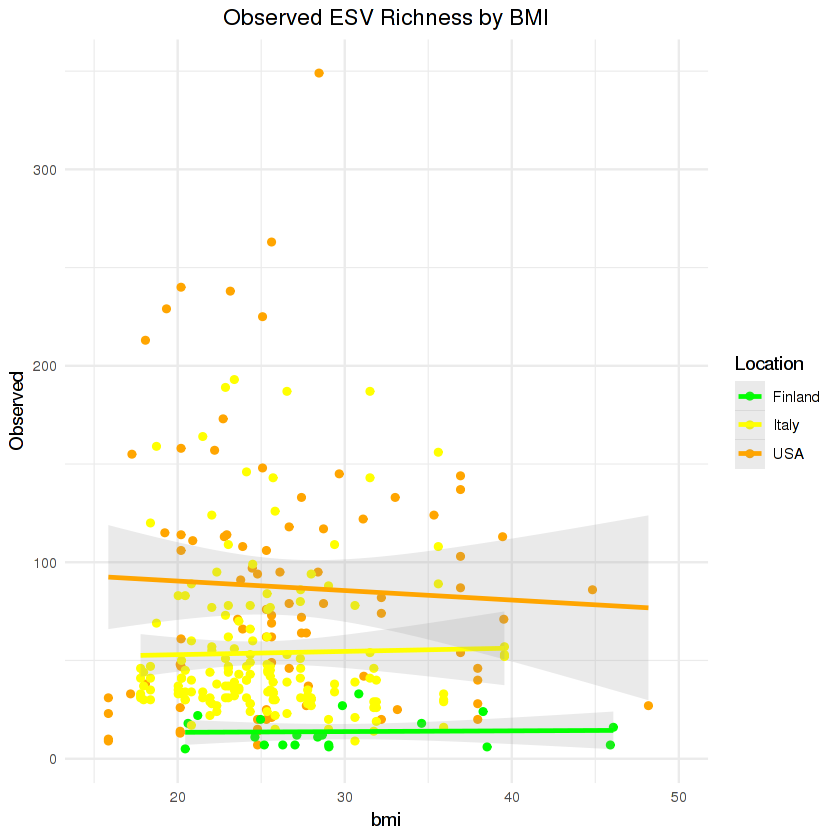

In [117]:
p3 = ggplot(dfobs, aes(x=bmi, y=Observed, colour = bmi)) + geom_point() + ggtitle("Observed ESV Richness by BMI")
p3 = p3 + geom_smooth(method = "lm", se=TRUE, alpha=.2, colour = "grey55") +
         theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) +
         scale_colour_gradient(low = "grey78", high = "black") +
         xlim(c(15,50))
p3

p4 = ggplot(dfobs, aes(x=bmi, y=Observed, colour = Location)) + geom_point() +  ggtitle("Observed ESV Richness by BMI")
p4 = p4 + geom_smooth(method = "lm", se=TRUE, alpha=.2) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) +
        scale_colour_manual(values = c("Green", "Yellow", "Orange")) +
        xlim(c(15,50))
p4

In [187]:
#SUMMARIZE REGRESSION COEFFICIENTS - Break down by sample type before running
brain = subset(dfobs2, Organ=="Brain")
#heart = subset(dfobs, Organ=="Heart")
#liver = subset(dfobs, Organ=="Liver")
#spleen = subset(dfobs, Organ=="Spleen")
#blood = subset(dfobs, Organ=="Blood")
#prostate = subset(dfobs, Organ=="Prostate")
#uterus = subset(dfobs, Organ=="Uterus")

fit = lm(Sex ~ Organ, data = brain)
summary(fit)

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [139]:
head(dfobs)

SampleID,Observed,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,Ethnicity,Order,...,RTLID,Samplename,Cause_of_death,MOD,The_manner_of_death,Height_cm,Weight_kg,bmi,bmi_category,Description
Case100Brain,37,TTATCCAGTCCT,GTGTGYCAGCMGCCGCGGTAA,ASU4_E5,100,M,21,Caucasian,ITA,...,100,Case100Brain,Unknown illicit drug intoxication,Accident,Accident,175,70,22.86,normal,Case100Brain
Case100Heart,51,ATAGTTAGGGCT,GTGTGYCAGCMGCCGCGGTAA,ASU4_B5,100,M,21,Caucasian,ITA,...,100,Case100Heart,Unknown illicit drug intoxication,Accident,Accident,175,70,22.86,normal,Case100Heart
Case100Liver,31,GAATCTGACAAC,GTGTGYCAGCMGCCGCGGTAA,ASU4_C5,100,M,21,Caucasian,ITA,...,100,Case100Liver,Unknown illicit drug intoxication,Accident,Accident,175,70,22.86,normal,Case100Liver
Case100Prostate,189,TCTGGCTACGAC,GTGTGYCAGCMGCCGCGGTAA,ASU4_A5,100,M,21,Caucasian,ITA,...,100,Case100Prostate,Unknown illicit drug intoxication,Accident,Accident,175,70,22.86,normal,Case100Prostate
Case100Spleen,73,CTCATCATGTTC,GTGTGYCAGCMGCCGCGGTAA,ASU4_D5,100,M,21,Caucasian,ITA,...,100,Case100Spleen,Unknown illicit drug intoxication,Accident,Accident,175,70,22.86,normal,Case100Spleen
Case101Brain,47,CAATCATAGGTG,GTGTGYCAGCMGCCGCGGTAA,ASU2_E3,101,F,70,Caucasian,ITA,...,101,Case101Brain,Hemorrhagic_stroke,Natural,Natural death,151,55,24.12,normal,Case101Brain


In [ ]:
ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
    }

In [81]:
# Record stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
cat("Observed Richness by PMI_hr Regression\n", file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)
capture.output(summary(fit), file = "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/Report_data/stats.txt", append = TRUE)

In [68]:
dfobs.fin = dfobs[which(dfobs$Location=='Finland'),]
dfobs.ita = dfobs[which(dfobs$Location=='Italy'),]
dfobs.usa = dfobs[which(dfobs$Location=='USA'),]

In [71]:
head(dfobs.fin)

,SampleID,X,Observed,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,Ethnicity,...,Organ,RTLID,Samplename,Cause_of_death,The_manner_of_death,Height_cm,Weight_kg,bmi,bmi_category,Description
87,4885.12Liver,4885.12Liver,7,AAAACAAA,GTGCCAGCMGCCGCGGTAA,4885,L549,M,56,C,...,Liver,12,12-MS515F,Phlebitis and thrombophlebitis,Natural,171,79,27.02,overweight,4885.12_Liver
88,4885.15Liver,4885.15Liver,6,AAAACAAC,GTGCCAGCMGCCGCGGTAA,4885,L558,M,64,C,...,Liver,15,15-MS515F,Hypertensive heart disease without congestive heart failure,Natural,183,129,38.52,obese,4885.15_Liver
89,4885.16Liver,4885.16Liver,22,AAAACAAG,GTGCCAGCMGCCGCGGTAA,4885,L568,M,55,C,...,Liver,16,16-MS515F,Accidental poisoning by and exposure to alcohol,Accident,171,62,21.20,normal,4885.16_Liver
90,4885.19Liver,4885.19Liver,7,AAAACAAT,GTGCCAGCMGCCGCGGTAA,4885,L572,M,75,C,...,Liver,19,19-MS515F,Atherosclerotic heart disease,Natural,176,78,25.18,overweight,4885.19_Liver
91,4885.26Liver,4885.26Liver,18,AAAACACA,GTGCCAGCMGCCGCGGTAA,4885,L584,M,68,C,...,Liver,26,26-MS515F,Duodenal ulcer,Natural,172,61,20.62,normal,4885.26_Liver
92,4885.34Liver,4885.34Liver,24,AAAACACC,GTGCCAGCMGCCGCGGTAA,4885,L603,M,59,C,...,Liver,34,34-MS515F,Alcoholic cardiomyopathy,Natural,160,98,38.28,obese,4885.34_Liver


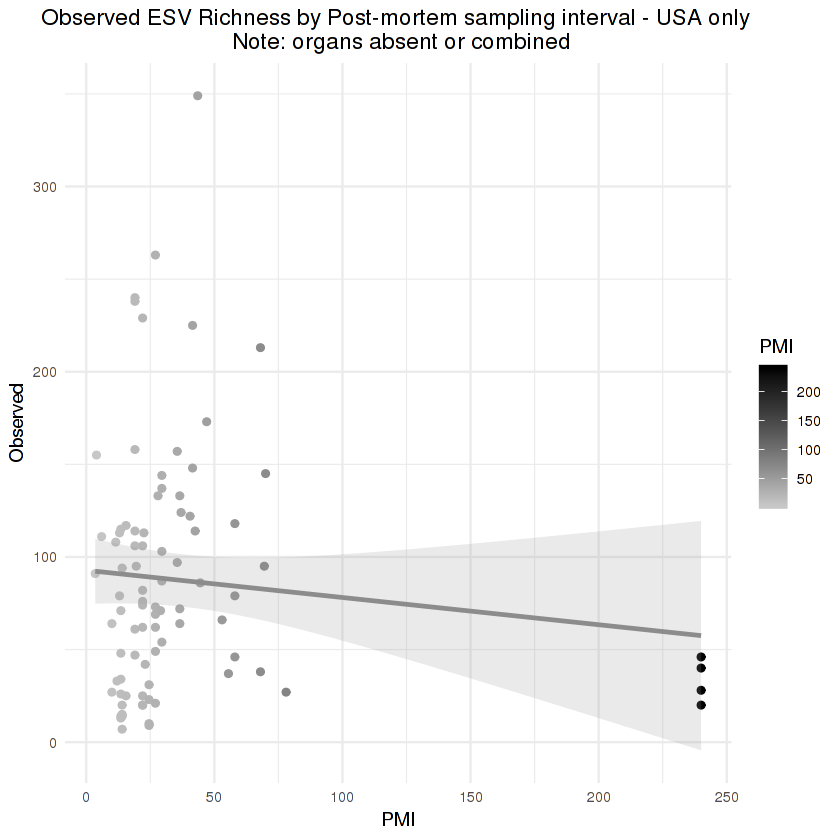

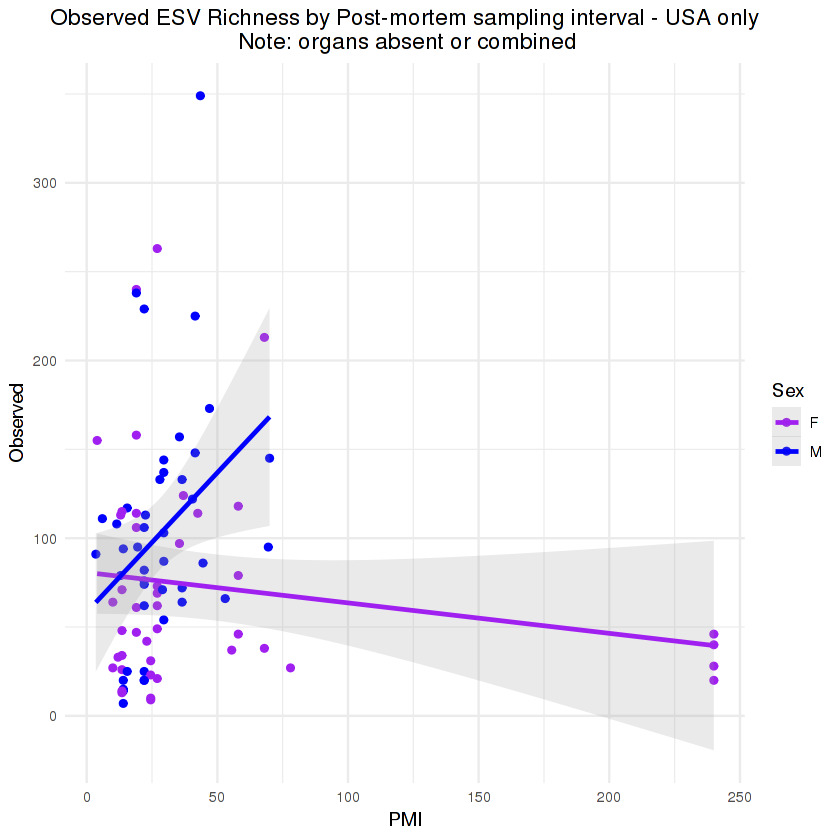

In [63]:
p5 = ggplot(dfobs.usa, aes(x=PMI, y=Observed, colour = PMI)) + geom_point() + 
        ggtitle("Observed ESV Richness by Post-mortem sampling interval - USA only \n Note: organs absent or combined")
p5 = p5 + geom_smooth(method = "lm", se=TRUE, alpha=.2, colour = "grey55") #"loess"
p5 = p5 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p5 = p5 + scale_colour_gradient(low = "grey78", high = "black")
p5

p6 = ggplot(dfobs.usa, aes(x=PMI, y=Observed, colour = Sex)) + geom_point() + 
        ggtitle("Observed ESV Richness by Post-mortem sampling interval - USA only\n Note: organs absent or combined")
p6 = p6 + geom_smooth(method = "lm", se=TRUE, alpha=.2)
p6 = p6 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p6 = p6 + scale_colour_manual(values = c("Purple", "Blue"))
p6

In [57]:
fit <- lm(PMI ~ Observed, data = dfobs.usa)
summary(fit)


Call:
lm(formula = PMI ~ Observed, data = dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.043 -22.129 -13.581   2.946 198.997 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.54053    8.56735   5.199 1.39e-06 ***
Observed    -0.07690    0.07847  -0.980     0.33    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.77 on 84 degrees of freedom
Multiple R-squared:  0.01131,	Adjusted R-squared:  -0.0004651 
F-statistic: 0.9605 on 1 and 84 DF,  p-value: 0.3299


In [21]:
# Record stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("USA only - Observed Richness by PMI_hr Regression\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(summary(fit), file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)

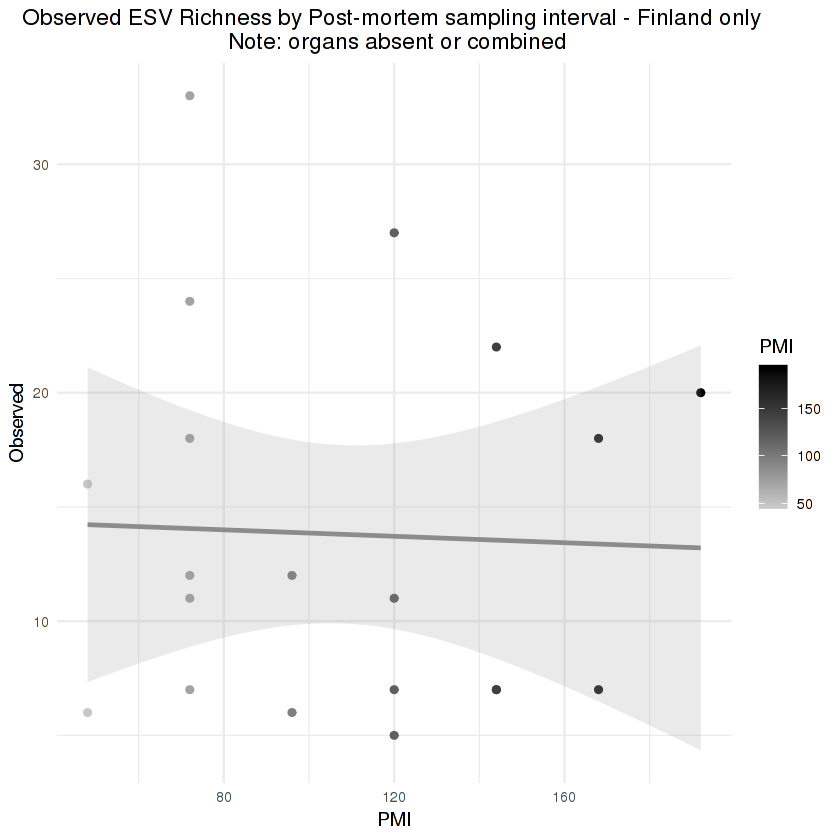

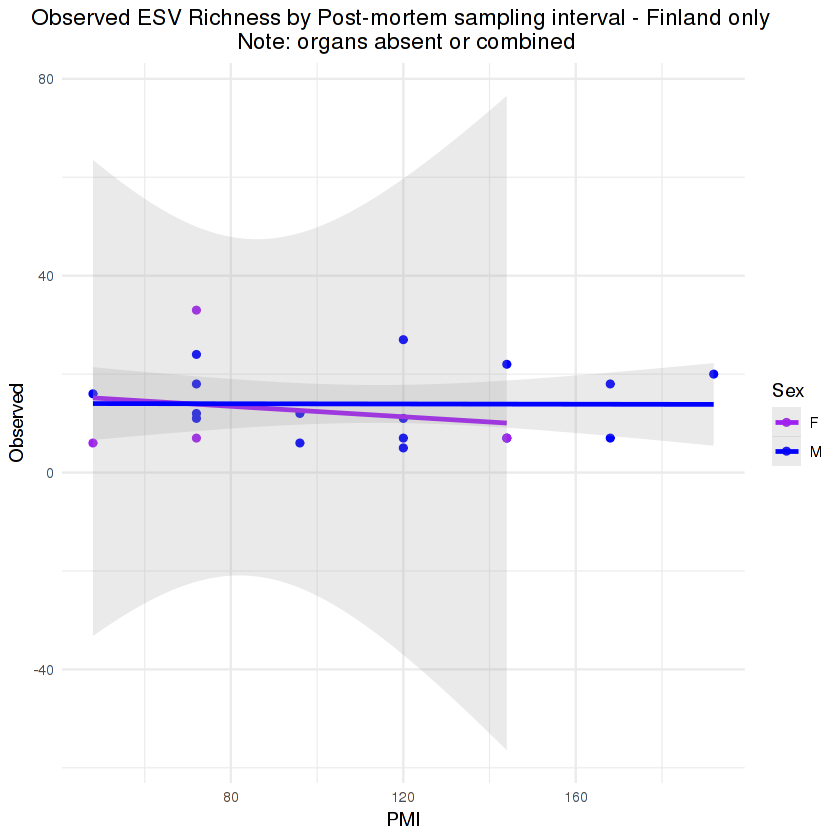

In [72]:
p7 = ggplot(dfobs.fin, aes(x=PMI, y=Observed, colour = PMI)) + geom_point() + 
        ggtitle("Observed ESV Richness by Post-mortem sampling interval - Finland only \n Note: organs absent or combined")
p7 = p7 + geom_smooth(method = "lm", se=TRUE, alpha=.2, colour = "grey55") #"loess"
p7 = p7 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p7 = p7 + scale_colour_gradient(low = "grey78", high = "black")
p7

p8 = ggplot(dfobs.fin, aes(x=PMI, y=Observed, colour = Sex)) + geom_point() + 
        ggtitle("Observed ESV Richness by Post-mortem sampling interval - Finland only \n Note: organs absent or combined")
p8 = p8 + geom_smooth(method = "lm", se=TRUE, alpha=.2)
p8 = p8 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p8 = p8 + scale_colour_manual(values = c("Purple", "Blue"))
p8

In [22]:
fit <- lm(PMI ~ Observed, data = dfobs.fin)
summary(fit)


Call:
lm(formula = PMI ~ Observed, data = dfobs.fin)

Residuals:
   Min     1Q Median     3Q    Max 
-59.81 -34.42 -10.62  36.58  86.58 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 108.8128    19.0398   5.715 1.65e-05 ***
Observed     -0.1995     1.3077  -0.153     0.88    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.03 on 19 degrees of freedom
Multiple R-squared:  0.001224,	Adjusted R-squared:  -0.05134 
F-statistic: 0.02328 on 1 and 19 DF,  p-value: 0.8803


In [23]:
# Record stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("Finland only - Observed Richness by PMI_hr Regression\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(summary(fit), file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)

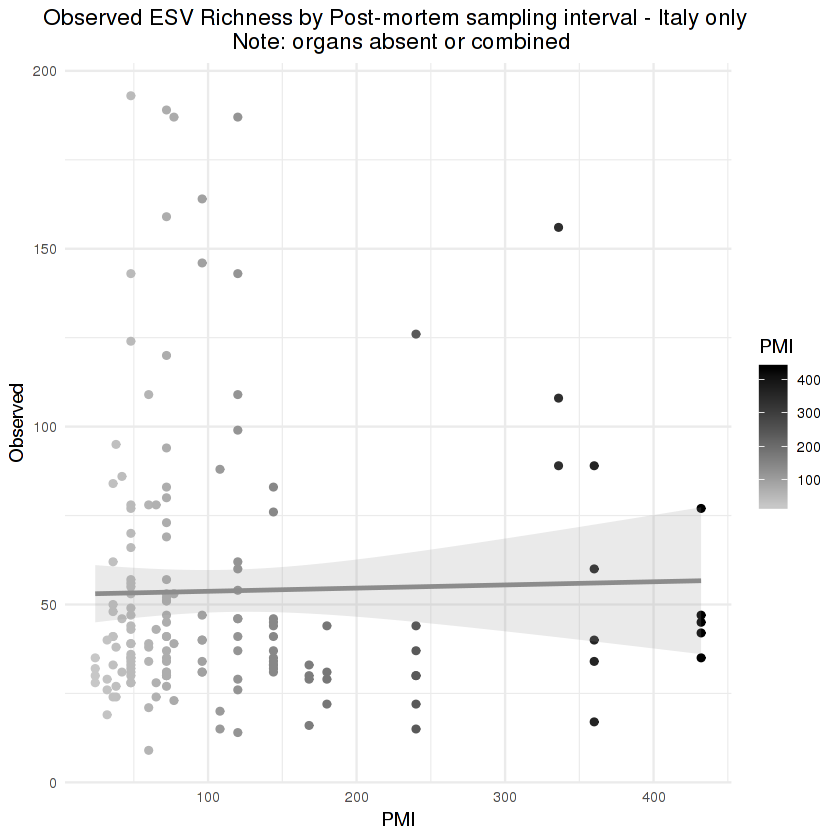

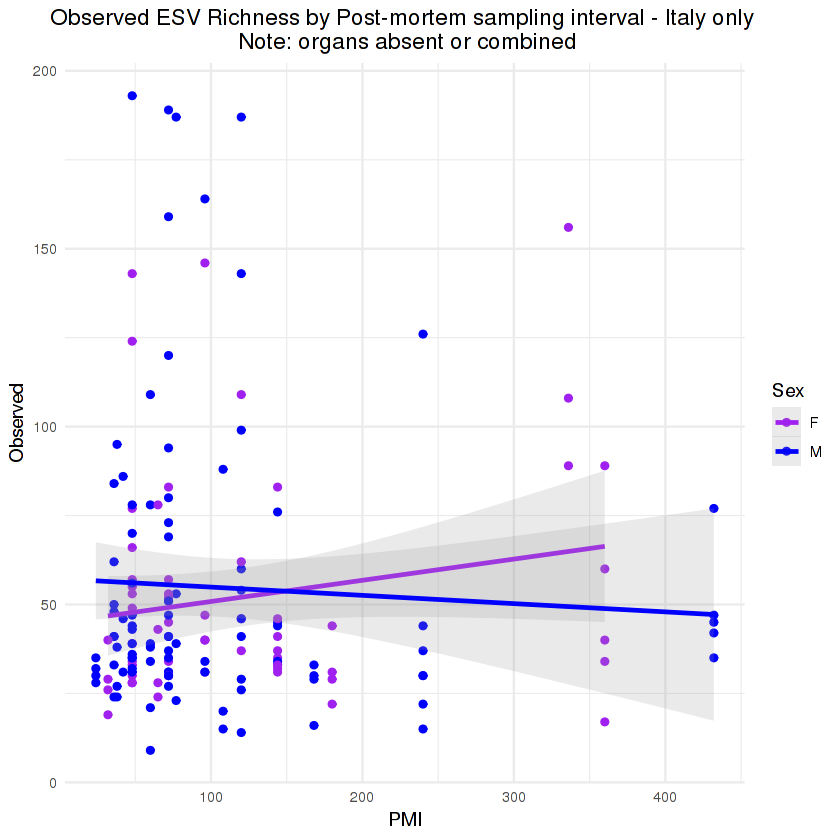

In [69]:
p9 = ggplot(dfobs.ita, aes(x=PMI, y=Observed, colour = PMI)) + geom_point() + 
        ggtitle("Observed ESV Richness by Post-mortem sampling interval - Italy only \n Note: organs absent or combined")
p9 = p9 + geom_smooth(method = "lm", se=TRUE, alpha=.2, colour = "grey55") #"loess"
p9 = p9 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p9 = p9 + scale_colour_gradient(low = "grey78", high = "black")
p9

p10 = ggplot(dfobs.ita, aes(x=PMI, y=Observed, colour = Sex)) + geom_point() + 
        ggtitle("Observed ESV Richness by Post-mortem sampling interval - Italy only \n Note: organs absent or combined")
p10 = p10 + geom_smooth(method = "lm", se=TRUE, alpha=.2)
p10 = p10 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) 
p10 = p10 + scale_colour_manual(values = c("Purple", "Blue"))
p10

In [3]:
cadaver_nt_5k = rarefy_even_depth(cadaver_nt, sample.size = 5000,
   replace = FALSE, trimOTUs = TRUE, verbose = TRUE)

cadaver_5k <- cadaver_nt_5k %>%
    transform_sample_counts(function(x) x / sum(x))

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`

...
101 samples removedbecause they contained fewer reads than `sample.size`.
Up to first five removed samples are: 

Case85SpleenCase51LiverCase76BrainCase91SpleenCase69Brain	
...
346OTUs were removed because they are no longer 
present in any sample after random subsampling

...


### Betadiversity

In [4]:
cadaver.df = data.frame(sample_data(cadaver))

In [11]:
class(cadaver)

[1] "phyloseq"
attr(,"package")
[1] "phyloseq"

In [6]:
# WEIGHTED UNIFRAC
cadaver.dist.wunif = distance(cadaver, method = "wunifrac", type = "samples")
cadaver.wunif.nostrata.adtest = adonis2(cadaver.dist.wunif ~ Sex + Ethnicity + Age + Location + The_manner_of_death + PMI + bmi, by = "margin", data=cadaver.df)
cadaver.wunif.nostrata.adtest

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGCAAGCGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.2126995,0.012536623,4.350369,0.002
Ethnicity,3,0.2937528,0.017313947,2.002720,0.003
Age,1,0.1134113,0.006684521,2.319614,0.019
Location,1,0.5836530,0.034400825,11.937526,0.001
The_manner_of_death,8,1.0481104,0.061776189,2.679641,0.001
PMI,1,0.3345988,0.019721434,6.843590,0.001
bmi,1,0.2054193,0.012107522,4.201465,0.001
Residual,246,12.0275040,0.708907566,NA,NA
Total,263,16.9662514,1.000000000,NA,NA


In [7]:
#bh p-value correction
pval = c("0.002", "0.003", "0.019", "0.001","0.001","0.001","0.001")
cadaver.wunif.nostrata.adtest.padj = p.adjust(pval, method = "BH")
cadaver.wunif.nostrata.adtest.padj

[1] 0.00280 0.00350 0.01900 0.00175 0.00175 0.00175 0.00175

In [32]:
# WEIGHTED UNIFRAC (5k rarefied) - Locality set as strata
cadaver.dist.wunif = distance(cadaver_5k, method = "wunifrac", type = "samples")
cadaver.wunif.strata.adtest = adonis2(cadaver.dist.wunif ~ Sex + Ethnicity + Age + The_manner_of_death + PMI + bmi, strata = Location, by = "margin", data=cadaver_5k.df)
cadaver.wunif.strata.adtest

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGTAGGGCGCAAGCATTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCCGTGAAAGTCCGGGGCTTAACTCCGGATCTGCGGTGGGTACGGGCAGACTTGAGTGATGTAGGGGAGACTGGAATTCCTGG -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.1530459,0.01003517,1.960645,0.046
Ethnicity,3,0.8087693,0.05303075,3.453668,0.001
Age,1,0.2931557,0.01922213,3.755567,0.002
The_manner_of_death,7,1.3208573,0.08660821,2.417325,0.001
PMI,1,0.3141998,0.02060198,4.025160,0.003
bmi,1,0.2650522,0.01737939,3.395538,0.005
Residual,148,11.5527272,0.75750877,NA,NA
Total,162,15.2509483,1.00000000,NA,NA


In [33]:
#bh p-value correction
pval = c("0.046", "0.001", "0.002", "0.001","0.003","0.005")
cadaver.wunif.strata.adtest.padj = p.adjust(pval, method = "BH")
cadaver.wunif.strata.adtest.padj

[1] 0.0460 0.0030 0.0040 0.0030 0.0045 0.0060

In [9]:
# UNWEIGHTED UNIFRAC 
cadaver.dist.unif = distance(cadaver, method = "unifrac", type = "samples")
cadaver.unif.nostrata.adtest = adonis2(cadaver.dist.unif ~ Sex + Age + Ethnicity + The_manner_of_death + PMI + bmi + Location, by = "margin", data=cadaver.df, permutations=1000)
cadaver.unif.nostrata.adtest

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTTTAGCAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGTACTGCTTTGGAAACTGTTAGACTTGAGTGCAGGAGAGGTAAGTGGAATTCCTAG -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.3461421,0.005150104,1.724021,0.044955045
Age,1,0.5801187,0.008631343,2.889381,0.002997003
Ethnicity,3,0.6698075,0.009965786,1.112031,0.250749251
The_manner_of_death,8,2.8415241,0.042277848,1.769088,0.000999001
PMI,1,0.4122118,0.006133127,2.053092,0.027972028
bmi,1,0.3519998,0.005237257,1.753196,0.052947053
Location,1,3.0719914,0.045706874,15.300584,0.000999001
Residual,246,49.3909179,0.734866798,NA,NA
Total,263,67.2107081,1.000000000,NA,NA


In [10]:
#bh p-value correction
pval = c("0.045", "0.003", "0.25", "0.001","0.028","0.053","0.001")
cadaver.unif.nostrata.adtest.padj = p.adjust(pval, method = "BH")
cadaver.unif.nostrata.adtest.padj

[1] 0.06183333 0.00700000 0.25000000 0.00350000 0.04900000 0.06183333 0.00350000

In [26]:
# UNWEIGHTED UNIFRAC (5k rarefied) - Locality set as strata
cadaver.dist.unif = distance(cadaver_5k, method = "unifrac", type = "samples")
cadaver.unif.strata.adtest = adonis2(cadaver.dist.unif ~ Sex + Age + Ethnicity + The_manner_of_death + PMI + bmi, strata = Locality, by = "margin", data=cadaver_5k.df, permutations=1000)
cadaver.unif.strata.adtest

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGGAGGGTGCGAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTGACTTAAGCGTGTGGTGAAAGCCCGGGGCTCAACCCCGGGTCGGCCGTGCGAACTGGGTCACTTGAGCACTGTAGAGGCAGGTGGAATTCCGGG -- in the phylogenetic tree in the data you provided.”

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.4671900,0.009867537,1.878172,0.032967033
Age,1,0.6919173,0.014614012,2.781608,0.003996004
Ethnicity,3,3.3005175,0.069710355,4.422854,0.000999001
The_manner_of_death,7,2.8923109,0.061088609,1.661073,0.000999001
PMI,1,0.4952553,0.010460305,1.990998,0.017982018
bmi,1,0.3277715,0.006922875,1.317689,0.154845155
Residual,148,36.8145874,0.777562290,NA,NA
Total,162,47.3461584,1.000000000,NA,NA


In [27]:
#bh p-value correction
pval = c("0.033", "0.003", "0.001", "0.001","0.018","0.15")
cadaver.unif.strata.adtest.padj = p.adjust(pval, method = "BH")
cadaver.unif.strata.adtest.padj

[1] 0.0396 0.0060 0.0030 0.0030 0.0270 0.1500

In [11]:
# BRAY-CURTIS
cadaver.dist.bc = distance(cadaver, method = "bray", type = "samples")
cadaver.bc.nostrata.adtest = adonis2(cadaver.dist.bc ~ Sex + Age + Ethnicity + The_manner_of_death + PMI + bmi + Location, by = "margin", data=cadaver.df, permutations=1000)
cadaver.bc.nostrata.adtest

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,1.4833070,0.013520460,4.558195,0.000999001
Age,1,0.9331969,0.008506163,2.867709,0.003996004
Ethnicity,3,2.1846240,0.019913019,2.237779,0.000999001
The_manner_of_death,8,6.3950465,0.058291351,2.456493,0.000999001
PMI,1,1.3276533,0.012101664,4.079872,0.000999001
bmi,1,0.8028928,0.007318431,2.467285,0.009990010
Location,1,2.3616292,0.021526435,7.257274,0.000999001
Residual,246,80.0521990,0.729682085,NA,NA
Total,263,109.7083245,1.000000000,NA,NA


In [12]:
#bh p-value correction
pval = c("0.001", "0.004", "0.001", "0.001","0.001","0.001","0.001")
cadaver.bc.nostrata.adtest.padj = p.adjust(pval, method = "BH")
cadaver.bc.nostrata.adtest.padj

[1] 0.001166667 0.004000000 0.001166667 0.001166667 0.001166667 0.001166667
[7] 0.001166667

In [29]:
# BRAY-CURTIS  (5k rarefied) - Locality set as strata
cadaver.dist.bc = distance(cadaver_5k, method = "bray", type = "samples")
cadaver.bc.strata.adtest = adonis2(cadaver.dist.bc ~ Sex + Age + Ethnicity + The_manner_of_death + PMI + bmi, strata = Locality, by = "margin", data=cadaver_5k.df)
cadaver.bc.strata.adtest

,Df,SumOfSqs,R2,F,Pr(>F)
Sex,1,0.9015823,0.01227800,2.368185,0.002
Age,1,1.1508625,0.01567277,3.022970,0.001
Ethnicity,3,4.6030722,0.06268593,4.030295,0.001
The_manner_of_death,7,5.5920093,0.07615355,2.098361,0.001
PMI,1,1.4886973,0.02027350,3.910360,0.001
bmi,1,0.9044657,0.01231727,2.375759,0.002
Residual,148,56.3444807,0.76731497,NA,NA
Total,162,73.4307074,1.00000000,NA,NA


In [30]:
#bh p-value correction
pval = c("0.002", "0.001", "0.001", "0.001","0.001","0.002")
cadaver.bc.strata.adtest.padj = p.adjust(pval, method = "BH")
cadaver.bc.strata.adtest.padj

[1] 0.0020 0.0015 0.0015 0.0015 0.0015 0.0020

In [34]:
# Record stats
# Wunif adonis2 - no strata, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.wunif.adtest - no strata\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.wunif.nostrata.adtest, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
# Wunif adonis2 - no strata, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.wunif.adtest - no strata - BH padjust\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.wunif.nostrata.adtest.padj, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
# Wunif adonis2 - strata stats, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.wunif.adtest - Location as strata\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.wunif.strata.adtest, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
# Wunif adonis2 - strata stats, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.wunif.adtest - Location as strata - BH padjust\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.wunif.strata.adtest.padj, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)

# Unif adonis2 - no strata, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.unif.adtest - no strata\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.unif.nostrata.adtest, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
# Unif adonis2 - no strata, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.unif.adtest - no strata - BH padjust\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.unif.nostrata.adtest.padj, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
# Unif adonis2 - strata stats, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.unif.adtest - Location as strata\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.unif.strata.adtest, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
# Unif adonis2 - strata stats, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.unif.adtest - Location as strata - BH padjust\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.unif.strata.adtest.padj, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)

#Bray-Curtis adonis2 - no strata, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.bc.adtest - no strata\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.bc.nostrata.adtest, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
#Bray-Curtis adonis2 - no strata, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.bc.adtest - no strata - BH padjust\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.bc.nostrata.adtest.padj, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
#Bray-Curtis adonis2 - strata stats, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.bc.adtest - Location as strata\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.bc.strata.adtest, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
#Bray-Curtis adonis2 - strata stats, BH adjusted p-value stats
cat("\n\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
cat("cadaver.bc.adtest - Location as strata - BH padjust\n", file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)
capture.output(cadaver.bc.strata.adtest.padj, file = "/group/gilbert-lab/Lutz/Cadaver/Report_data/3813_4522_4885/stats.txt", append = TRUE)

In [321]:
cadaver.wunif.log = ordinate(cadaver, method = "PCoA", distance = "wunifrac")
cadaver.wunif.evals = cadaver.wunif.log$values$Eigenvalues

Warning message in UniFrac(physeq, weighted = TRUE, ...):
“Randomly assigning root as -- TACGAAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGAAGTGAAAGCCCCGGGCTCAACCTGGGAATTGCTTTCAAAACTGACAGGCTAGAGTACGGTAGAGGGTAGTGGAATTTCCTG -- in the phylogenetic tree in the data you provided.”

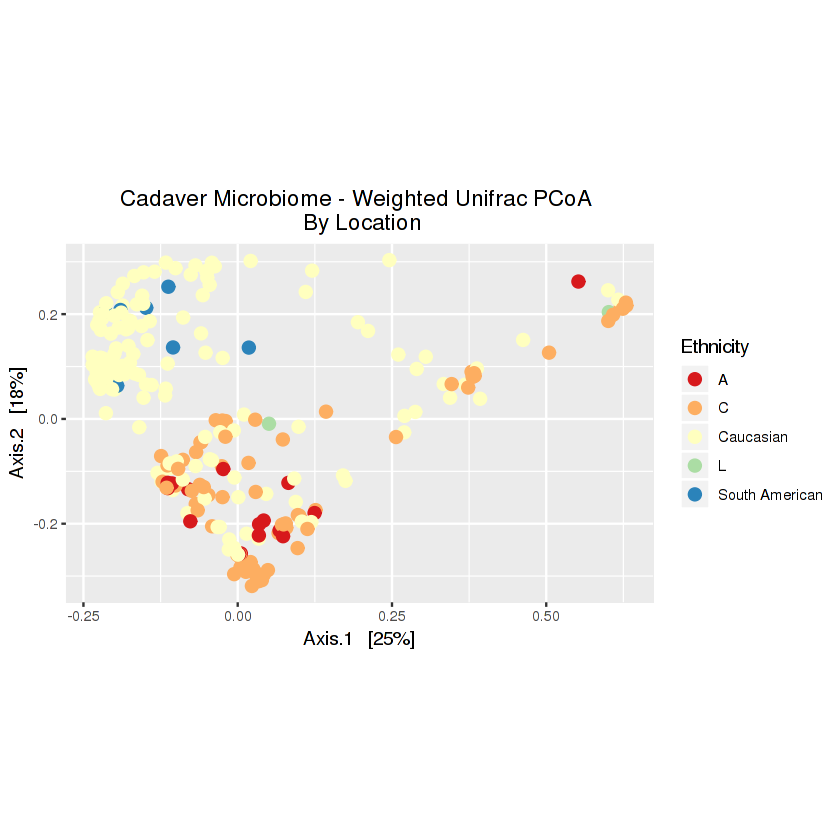

In [327]:
p = plot_ordination(cadaver, cadaver.wunif.log, color = "Ethnicity") + 
    ggtitle("Cadaver Microbiome - Weighted Unifrac PCoA \n By Location") + 
    geom_point(size=3) + 
    coord_fixed(sqrt(cadaver.wunif.evals[2] / cadaver.wunif.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p                            

In [193]:
cadaver.unif.log = ordinate(cadaver, method = "PCoA", distance = "unifrac")
cadaver.unif.evals = cadaver.unif.log$values$Eigenvalues

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTGCCATTGATACTGGCGGGCTTGAGTGTAGATGAGGTAGGCGGAATGCGTGG -- in the phylogenetic tree in the data you provided.”

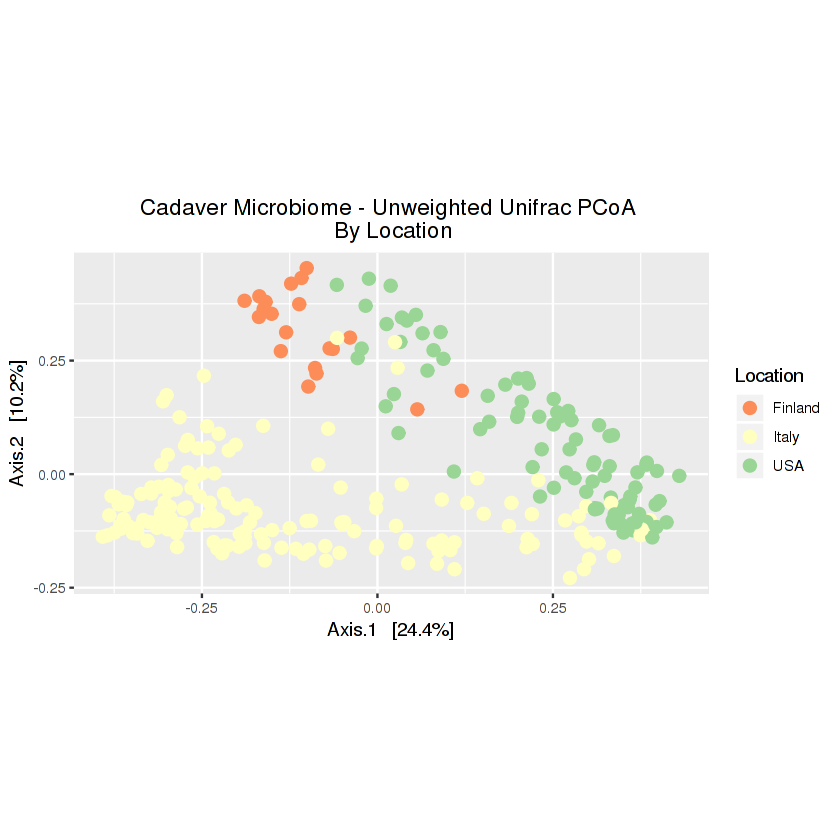

In [197]:
p = plot_ordination(cadaver, cadaver.unif.log, color = "Location") + 
    ggtitle("Cadaver Microbiome - Unweighted Unifrac PCoA \n By Location") + 
    geom_point(size=3) + 
    coord_fixed(sqrt(cadaver.unif.evals[2] / cadaver.unif.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p    

In [198]:
cadaver.bc.log = ordinate(cadaver, method = "PCoA", distance = "bray")
cadaver.bc.evals = cadaver.bc.log$values$Eigenvalues

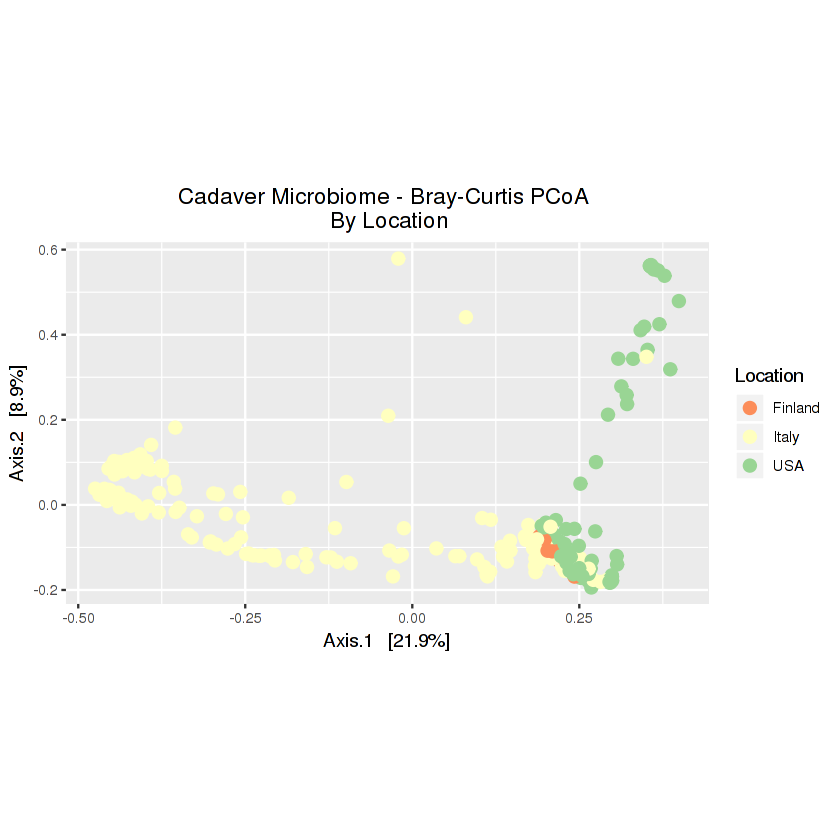

In [199]:
p = plot_ordination(cadaver, cadaver.bc.log, color = "Location") + 
    ggtitle("Cadaver Microbiome - Bray-Curtis PCoA \n By Location") + 
    geom_point(size=3) + 
    coord_fixed(sqrt(cadaver.bc.evals[2] / cadaver.bc.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p    

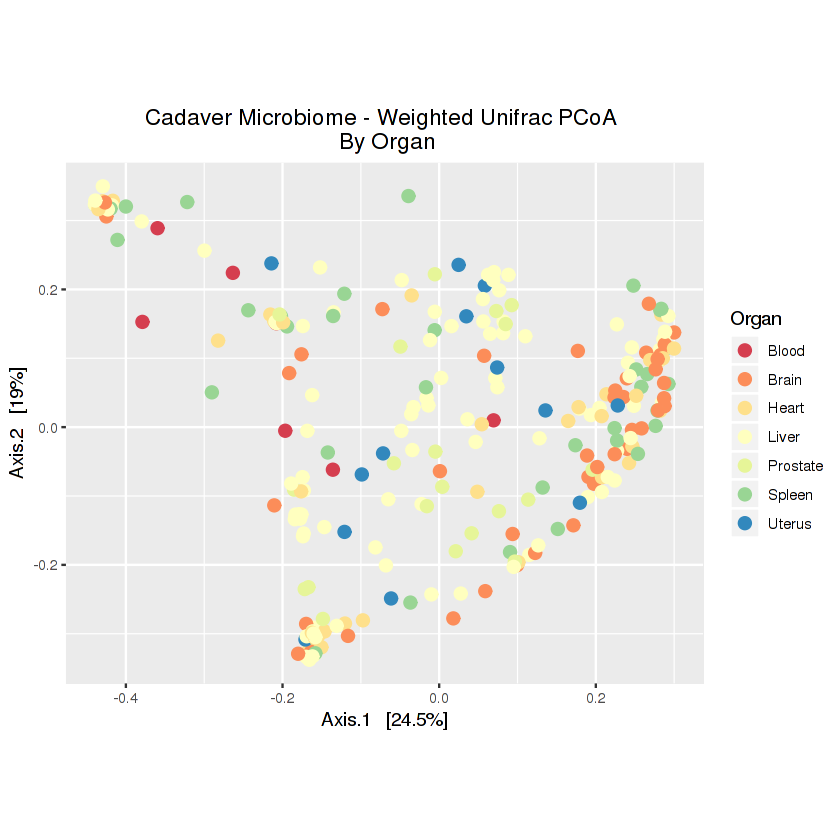

In [200]:
p = plot_ordination(cadaver, cadaver.wunif.log, color = "Organ") + 
    ggtitle("Cadaver Microbiome - Weighted Unifrac PCoA \n By Organ") + 
    geom_point(size=3) + 
    coord_fixed(sqrt(cadaver.wunif.evals[2] / cadaver.wunif.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p                            

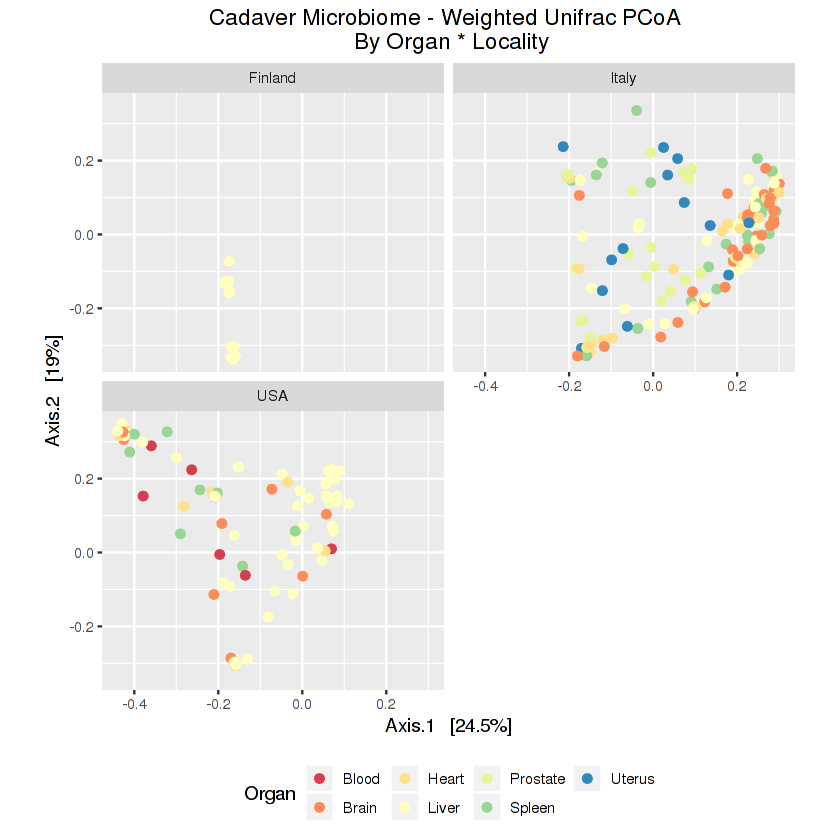

In [201]:
p = plot_ordination(cadaver, cadaver.wunif.log, color = "Organ") + 
    ggtitle("Cadaver Microbiome - Weighted Unifrac PCoA \n By Organ * Locality") + 
    geom_point(size=2) + 
    coord_fixed(sqrt(cadaver.wunif.evals[2] / cadaver.wunif.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p = p + facet_wrap(~Location, ncol=2)
p = p + theme(legend.position="bottom")
p                            

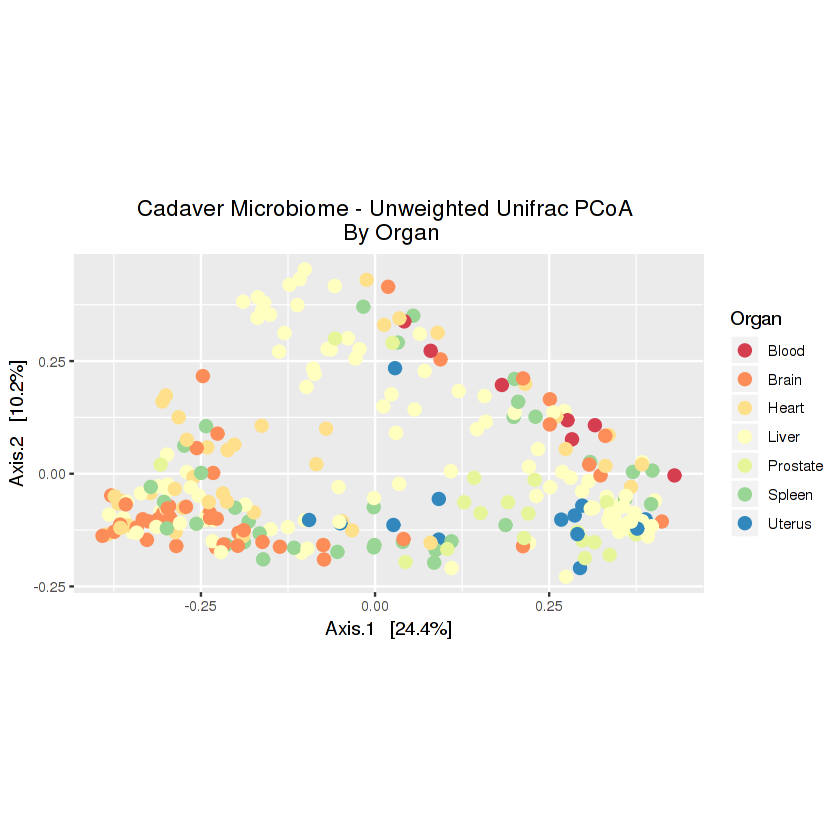

In [202]:
p = plot_ordination(cadaver, cadaver.unif.log, color = "Organ") + 
    ggtitle("Cadaver Microbiome - Unweighted Unifrac PCoA \n By Organ") + 
    geom_point(size=3) + 
    coord_fixed(sqrt(cadaver.unif.evals[2] / cadaver.unif.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p    

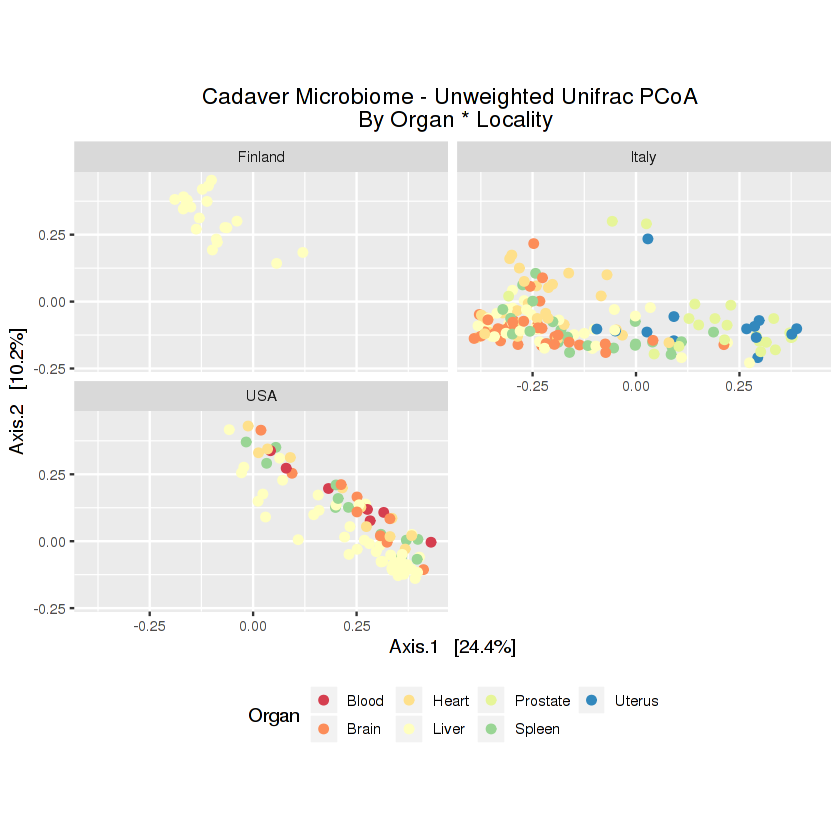

In [203]:
p = plot_ordination(cadaver, cadaver.unif.log, color = "Organ") + 
    ggtitle("Cadaver Microbiome - Unweighted Unifrac PCoA \n By Organ * Locality") + 
    geom_point(size=2) + 
    coord_fixed(sqrt(cadaver.unif.evals[2] / cadaver.unif.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p = p + facet_wrap(~Location, ncol=2)
p = p + theme(legend.position="bottom")
p 

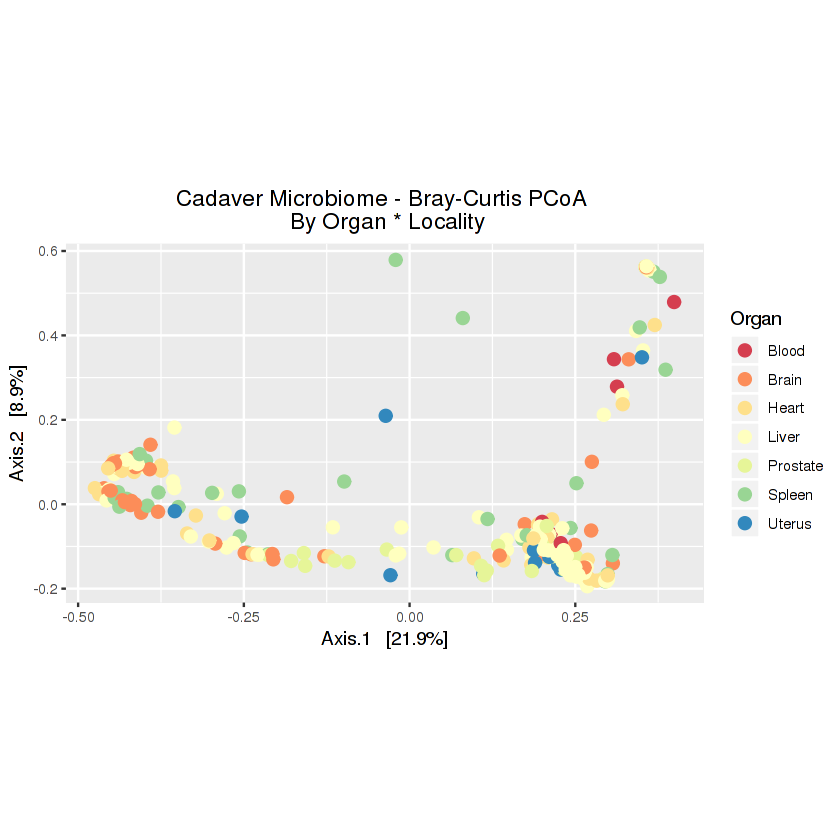

In [204]:
p = plot_ordination(cadaver, cadaver.bc.log, color = "Organ") + 
    ggtitle("Cadaver Microbiome - Bray-Curtis PCoA \n By Organ * Locality") + 
    geom_point(size=3) + 
    coord_fixed(sqrt(cadaver.bc.evals[2] / cadaver.bc.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p  

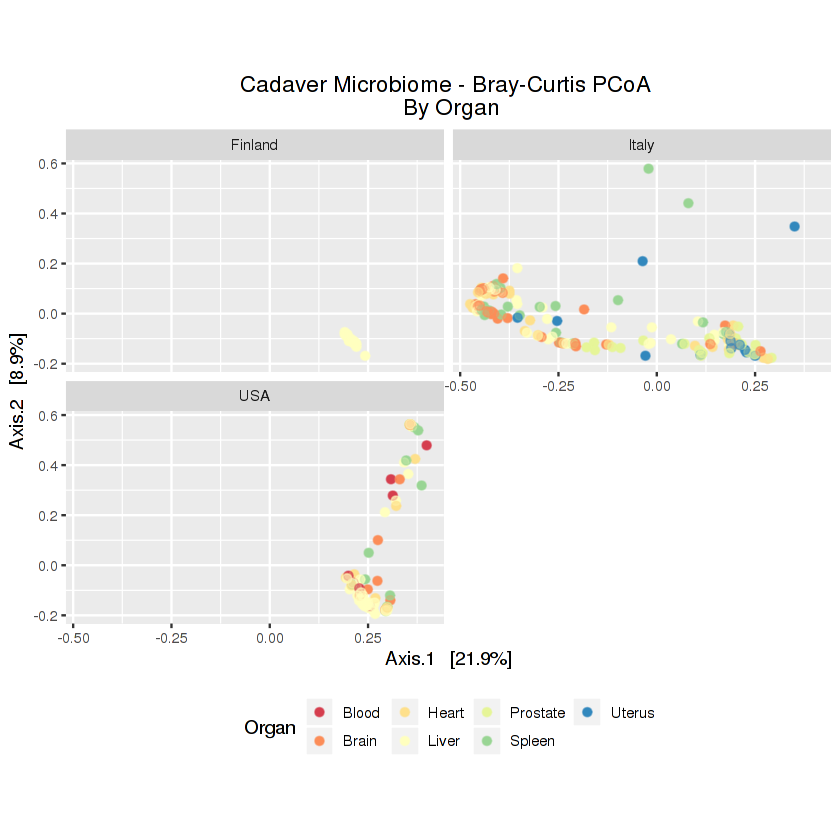

In [205]:
p = plot_ordination(cadaver, cadaver.bc.log, color = "Organ") + 
    ggtitle("Cadaver Microbiome - Bray-Curtis PCoA \n By Organ") + 
    geom_point(size=2, alpha=0.5) + 
    coord_fixed(sqrt(cadaver.bc.evals[2] / cadaver.bc.evals[1])) +
    theme(plot.title = element_text(hjust=0.5))
#p = p + scale_colour_manual(values = c("Black", "Gray"))
p = p + scale_colour_brewer(palette="Spectral")
p = p + facet_wrap(~Location, ncol=2)
p = p + theme(legend.position="bottom")
p  

#### Betadispersion

In [13]:
sample_tab = data.frame(sample_data(cadaver_nt))

In [14]:
names(sample_tab)[1]<-"SampleID"

In [21]:
#Weighted Unifrac

beta.disp.cadaver.wuf = betadisper(cadaver.dist.wunif,group = sample_data(cadaver)$Organ)
beta.disp.cadaver.wuf = beta.disp.cadaver.wuf$distances
beta.disp.cadaver.wuf = data.frame(d = beta.disp.cadaver.wuf, SampleID = names(beta.disp.cadaver.wuf))
beta.disp.cadaver.wuf2 = left_join(beta.disp.cadaver.wuf, sample_tab, by="SampleID")

In [22]:
cadaver.wunif_summary = summary(beta.disp.cadaver.wuf2$d)
cadaver.wunif_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07901 0.18574 0.22845 0.23516 0.28708 0.49678 

In [23]:
#Sort by ascending mean
avg_obs <- aggregate(d ~ Organ, data = beta.disp.cadaver.wuf2, mean)
beta.disp.cadaver.wuf2$Organ <-factor(beta.disp.cadaver.wuf2$Organ, levels=avg_obs[order(avg_obs$d), "Organ"])

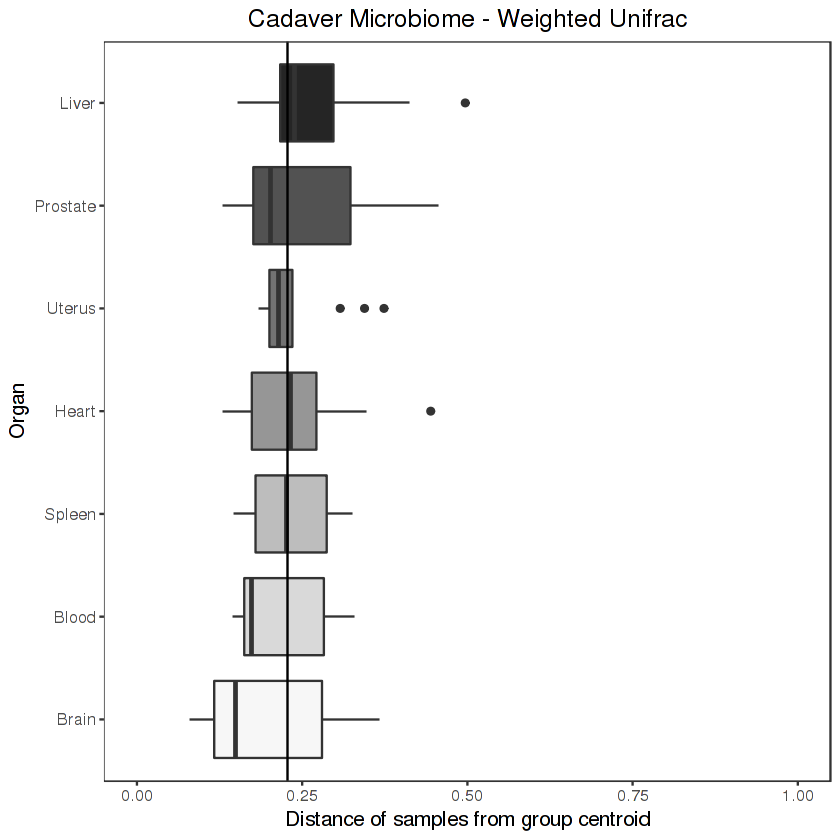

In [25]:
p = ggplot(beta.disp.cadaver.wuf2, aes(x = as.factor(Organ), y = d, fill = as.factor(Organ))) + ggtitle("Cadaver Microbiome - Weighted Unifrac")

p = p + geom_boxplot() + 
        ylab("Distance of samples from group centroid") + 
        xlab("Organ") + 
        coord_flip(ylim = c(0,1))

p = p + scale_fill_brewer(palette="Greys")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           plot.title = element_text(hjust = 0.5),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

#Mean taken from "cadaver.wunif_summary"
p = p + geom_hline(yintercept = 0.22845)

p

In [28]:
wuf.betadisper.kw = kruskal.test(d~Location, data=beta.disp.cadaver.wuf2)
summary(wuf.betadisper.kw)

dunn.test(beta.disp.cadaver.wuf2$d, beta.disp.cadaver.wuf2$Location, method = "Bonferroni")

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 80.9505, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |    Finland      Italy
---------+----------------------
   Italy |   2.571422
         |    0.0152*
         |
     USA |  -2.378833  -8.961234
         |     0.0261    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


In [37]:
#Unweighted Unifrac

beta.disp.cadaver.uf = betadisper(cadaver.dist.unif,group = sample_data(cadaver)$Organ)
beta.disp.cadaver.uf = beta.disp.cadaver.uf$distances
beta.disp.cadaver.uf = data.frame(d = beta.disp.cadaver.uf, SampleID = names(beta.disp.cadaver.uf))
beta.disp.cadaver.uf2 = left_join(beta.disp.cadaver.uf, sample_tab, by="SampleID")

cadaver.unif_summary = summary(beta.disp.cadaver.uf2$d)
cadaver.unif_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2573  0.3921  0.4657  0.4717  0.5411  0.7455 

In [38]:
#Sort by ascending mean
avg_obs <- aggregate(d ~ Organ, data = beta.disp.cadaver.uf2, mean)
beta.disp.cadaver.uf2$Organ <-factor(beta.disp.cadaver.uf2$Organ, levels=avg_obs[order(avg_obs$d), "Organ"])

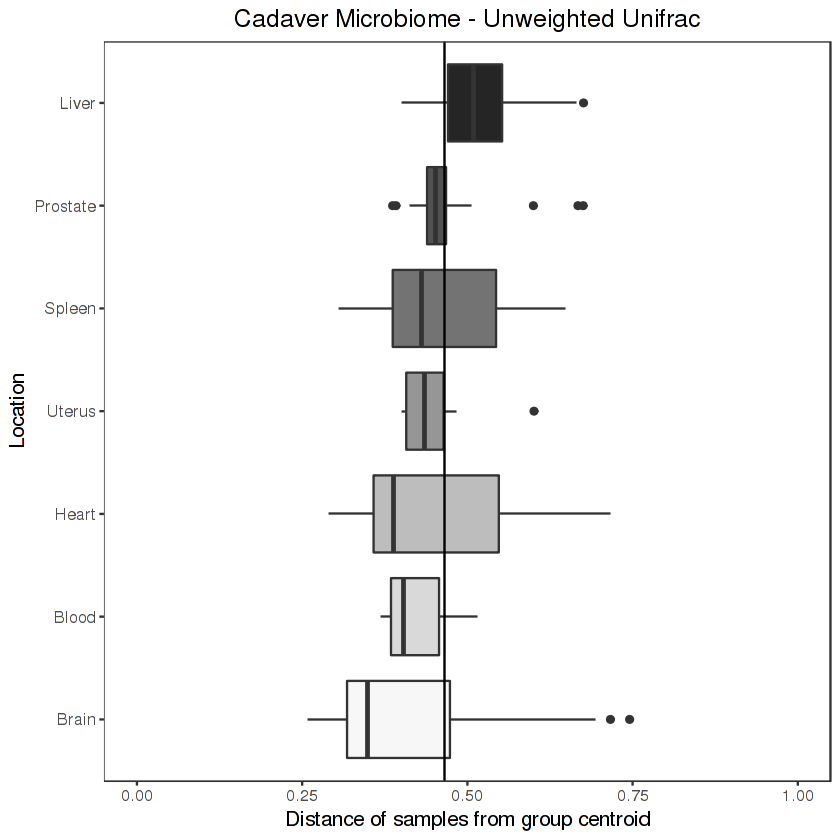

In [39]:
p = ggplot(beta.disp.cadaver.uf2, aes(x = as.factor(Organ), y = d, fill = as.factor(Organ))) + ggtitle("Cadaver Microbiome - Unweighted Unifrac")

p = p + geom_boxplot() + 
        ylab("Distance of samples from group centroid") + 
        xlab("Location") + 
        coord_flip(ylim = c(0,1))

p = p + scale_fill_brewer(palette="Greys")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           plot.title = element_text(hjust = 0.5),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

#Mean taken from "cadaver.unif_summary"
p = p + geom_hline(yintercept = 0.4657)

p

In [33]:
uf.betadisper.kw = kruskal.test(d~Organ, data=beta.disp.cadaver.uf2)
summary(uf.betadisper.kw)

dunn.test(beta.disp.cadaver.uf2$d, beta.disp.cadaver.uf2$Organ, method = "Bonferroni")

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 69.4231, df = 6, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |      Blood      Brain      Heart      Liver   Prostate     Spleen
---------+------------------------------------------------------------------
   Brain |   2.395706
         |     0.1742
         |
   Heart |   1.672535  -1.325691
         |     0.9914     1.0000
         |
   Liver |   1.031253  -3.176335  -1.516025
         |     1.0000    0.0157*     1.0000
         |
Prostate |  -2.052014  -7.052156  -5.866192  -5.422733
         |     0.4218    0.0000*    0.0000*    0.0000*
         |
  Spleen |   1.313630  -1.923293  -0.620760   0.722209   5.237751
         |     1.0000     0.5717     1.0000     1.0000    0.0000*
         |
  Uterus |  -1.402349  -5.170813  -4.205666  -3.602165   0.674802  -3.

In [49]:
#Bray-Curtis

beta.disp.cadaver.bc = betadisper(cadaver.dist.bc,group = sample_data(cadaver)$Organ)
beta.disp.cadaver.bc = beta.disp.cadaver.bc$distances
beta.disp.cadaver.bc = data.frame(d = beta.disp.cadaver.bc, SampleID = names(beta.disp.cadaver.bc))
beta.disp.cadaver.bc2 = left_join(beta.disp.cadaver.bc, sample_tab, by="SampleID")

cadaver.bc_summary = summary(beta.disp.cadaver.bc2$d)
cadaver.bc_summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2058  0.5213  0.6656  0.6079  0.7176  0.8762 

In [54]:
#Sort by ascending mean
avg_obs <- aggregate(d ~ Organ, data = beta.disp.cadaver.bc2, mean)
beta.disp.cadaver.bc2$Organ <-factor(beta.disp.cadaver.bc2$Organ, levels=avg_obs[order(avg_obs$d), "Organ"])

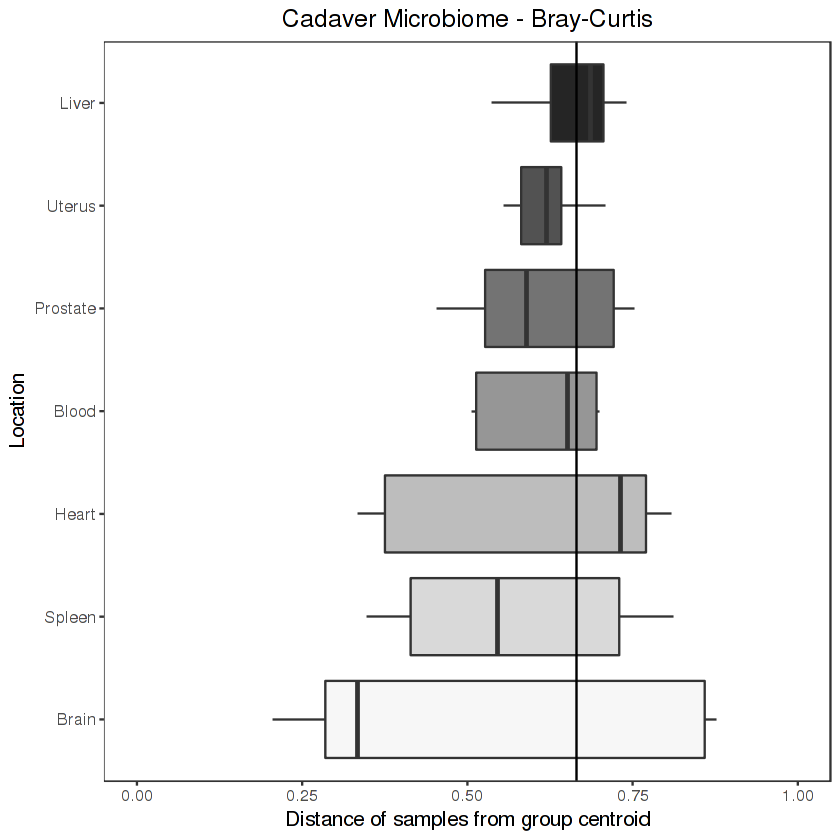

In [55]:
p = ggplot(beta.disp.cadaver.bc2, aes(x = as.factor(Organ), y = d, fill = as.factor(Organ))) + ggtitle("Cadaver Microbiome - Bray-Curtis")

p = p + geom_boxplot() + 
        ylab("Distance of samples from group centroid") + 
        xlab("Location") + 
        coord_flip(ylim = c(0,1))

p = p + scale_fill_brewer(palette="Greys")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           plot.title = element_text(hjust = 0.5),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

#Mean taken from "cadaver.unif_summary"
p = p + geom_hline(yintercept = 0.6656)

p

In [45]:
bc.betadisper.kw = kruskal.test(d~Organ, data=beta.disp.cadaver.bc2)
summary(uf.betadisper.kw)

dunn.test(beta.disp.cadaver.bc2$d, beta.disp.cadaver.bc2$Organ, method = "Bonferroni")

          Length Class  Mode     
statistic 1      -none- numeric  
parameter 1      -none- numeric  
p.value   1      -none- numeric  
method    1      -none- character
data.name 1      -none- character

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 52.8605, df = 6, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |      Blood      Brain      Heart      Liver   Prostate     Spleen
---------+------------------------------------------------------------------
   Brain |   2.396751
         |     0.1737
         |
   Heart |   1.131958  -2.341419
         |     1.0000     0.2017
         |
   Liver |   0.705577  -3.885015  -1.010029
         |     1.0000    0.0011*     1.0000
         |
Prostate |  -1.371820  -5.934495  -3.942712  -3.651588
         |     1.0000    0.0000*    0.0008*    0.0027*
         |
  Spleen |   1.728190  -1.163188   1.088705   2.263696   4.780278
         |     0.8815     1.0000     1.0000     0.2477    0.0000*
         |
  Uterus |  -1.133115  -4.772322  -3.116579  -2.741144   0.191266  -3.

### Rank Abundance

In [56]:
cadaver.mdf = psmelt(cadaver)
#export and add TaxID column (concatenated ranks for specific ID)

In [89]:
blood <- cadaver.mdf[which(cadaver.mdf$Organ=='Blood'),]
uterus <- cadaver.mdf[which(cadaver.mdf$Organ=='Uterus'),]
prostate <- cadaver.mdf[which(cadaver.mdf$Organ=='Prostate'),]
gonads = rbind(uterus, prostate)

#### Plot top taxa

In [90]:
N = 11

topN = blood %>%
    group_by(Rank4) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank4) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank4")

mdf.other = blood %>%
    mutate(Rank4.other = ifelse(Rank4 %in% topN, as.character(Rank4), "Other")) %>%
    group_by(Sample, Rank4.other, Organ, Location) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(Rank4.other, Organ, Location) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Rank4.other))

Selecting by m


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”

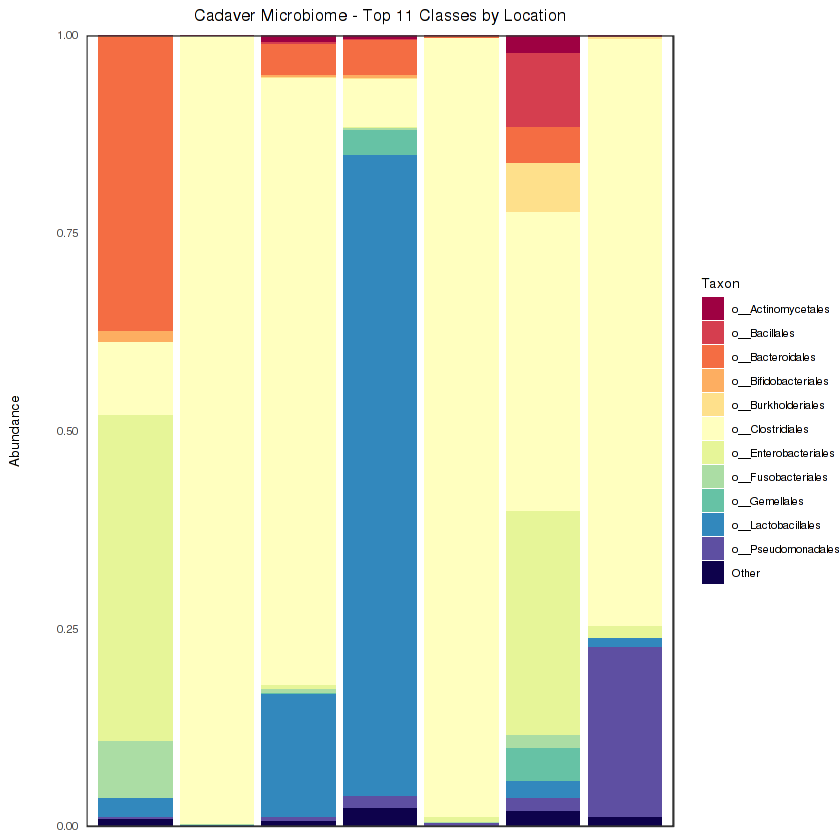

In [91]:
#mdf.other$Location <- factor(mdf.other$Location)

p = ggplot(mdf.other, aes(x=Sample, y = Abundance, fill = Rank4.other)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(expand = c(0,0)) + 
    scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p + guides(fill = guide_legend(title = "Taxon", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              plot.title = element_text(hjust = 0.5),
              text=element_text(size=8, color="black",family="Times New Roman"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #legend.key.size = unit(1, "mm"),
              #legend.spacing.x = unit(3,"in"),
              legend.position = "right",
              legend.key.width = unit(0.5, "mm"),
              axis.title.x=element_blank(),
              panel.spacing = unit(.5, "lines"))
               
p = p + ggtitle("Cadaver Microbiome - Top 11 Classes by Location")

#p = p + facet_wrap(~Organ, scales = "free_x", ncol = 3)

#p = p + facet_grid(Sex ~ Location, scales = "free_x")

p

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”

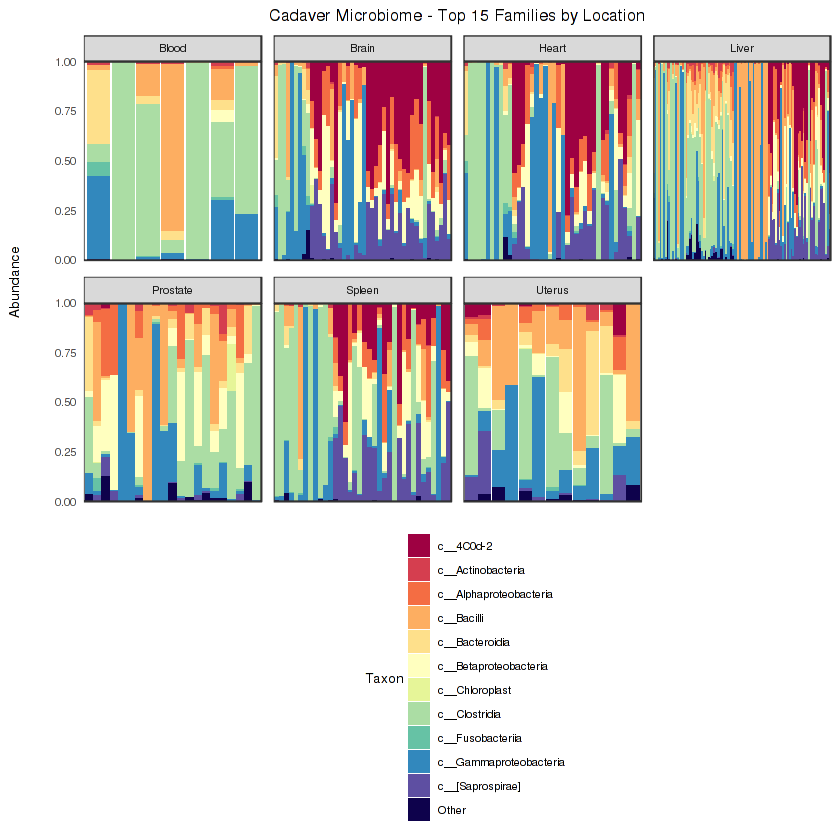

In [221]:
#mdf.other$Location <- factor(mdf.other$Location)

p = ggplot(mdf.other, aes(x=Sample, y = Abundance, fill = Rank3.other)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(expand = c(0,0)) + 
    scale_fill_brewer(palette = "Spectral", na.value= "#0E024C") 

p = p + guides(fill = guide_legend(title = "Taxon", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              plot.title = element_text(hjust = 0.5),
              text=element_text(size=8, color="black",family="Times New Roman"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #legend.key.size = unit(1, "mm"),
              #legend.spacing.x = unit(3,"in"),
              legend.position = "bottom",
              legend.key.width = unit(0.5, "mm"),
              axis.title.x=element_blank(),
              panel.spacing = unit(.5, "lines"))
               
p = p + ggtitle("Cadaver Microbiome - Top 15 Families by Location")

p = p + facet_wrap(~Organ, scales = "free_x", ncol = 4)

#p = p + facet_grid(Nation ~ Organ, scales = "free_x")

p

In [ ]:
### Stats for different OTUs between localities and organs

In [239]:
liver = subset_samples(cadaver, Organ=="Liver")

In [315]:
gamma = subset_taxa(liver, Rank4=="o__MLE1-12")
gamma.mdf = psmelt(gamma)

In [318]:
# columns to paste together
cols <- c('Rank4','Rank5', 'Rank6')

# create a new column `x` with the three columns collapsed together
gamma.mdf$TaxID <- apply(gamma.mdf[ , cols ] , 1 , paste , collapse = "-" )

In [319]:
N = 10

topN = gamma.mdf %>%
    group_by(TaxID) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(TaxID) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("TaxID")

mdf.other = gamma.mdf %>%
    mutate(TaxID.other = ifelse(TaxID %in% topN, as.character(TaxID), "Other")) %>%
    group_by(Sample, TaxID.other, TaxID, Location) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(TaxID.other, Location) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((TaxID.other))



Selecting by m


In [115]:
library(gtools)
#mdf.summary$TaxID.other <- na.replace(mdf.summary$TaxID.other, 'Unclassified')

mdf.summary$TaxID.other = as.character(mdf.summary$TaxID.other)
mdf.summary2 <- within(mdf.summary, TaxID.other[TaxID.other == 'f__-g__'] <- 'Other') 


In [317]:
#taxa = subset(mdf.other, TaxID.other=="o__Bacteroidales-f__Bacteroidaceae-g__Bacteroides")# & Location!="USA")
#t.test(Abundance~Location, data=taxa)
kruskal.test(Abundance ~ Location, data=mdf.other) 
dunn.test(mdf.other$Abundance, g=mdf.other$Location, method="BH")


	Kruskal-Wallis rank sum test

data:  Abundance by Location
Kruskal-Wallis chi-squared = 88.734, df = 2, p-value < 2.2e-16


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 88.7342, df = 2, p-value = 0


                           Comparison of x by group                            
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |    Finland      Italy
---------+----------------------
   Italy |  -6.979874
         |    0.0000*
         |
     USA |   0.000000   8.788940
         |     0.5000    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


In [320]:
mdf.summary

TaxID.other,Location,avg,sd,sem,proportion
o__MLE1-12-f__-g__,Finland,0.0000000,0.0000000,0.00000000,0.00
o__MLE1-12-f__-g__,Italy,0.2538762,0.2431586,0.04052643,25.39
o__MLE1-12-f__-g__,USA,0.0000000,0.0000000,0.00000000,0.00


Warning message:
“Ignoring unknown aesthetics: y”

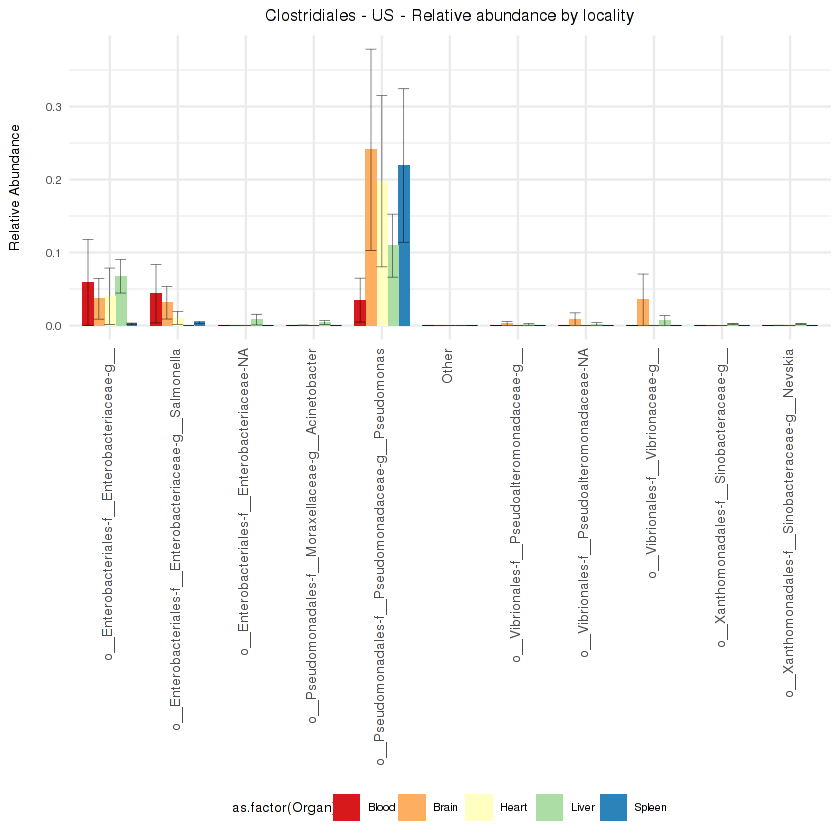

In [277]:
p2 = ggplot(mdf.summary, aes(x= TaxID.other, y = avg, fill = as.factor(Organ))) 

p2 = p2 + scale_fill_brewer(palette="Spectral")

#p2 = p2 + scale_fill_manual(values=c("black","red"))

p2 = p2 + geom_bar(stat="identity", width=.8, position = "dodge", na.rm = TRUE)

p2 = p2 + xlab("Rank6") + ylab("Relative Abundance") + theme(strip.text.y = element_text(angle = 90))

p2 = p2 + theme_minimal() + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.25, size = 8),
                           text=element_text(size=8, color="black", family="Arial"),
                           legend.position="bottom",
                           axis.title.x=element_blank(),
                           axis.title.y=element_text(margin=margin(0,13,0,0)))

p2 = p2 + #geom_point(aes(y = avg), data = mdforal.summary) + 
    geom_errorbar(aes(y = avg, ymin = avg-(sem), ymax = avg+(sem)), 
                , color = "black", width = .8, size=.1, data = mdf.summary, position = "dodge")

#p2 = p2 + scale_y_continuous(limits = c(0,.0001))

p2 = p2 + ggtitle("Clostridiales - US - Relative abundance by locality")

p2 = p2 + theme(plot.title = element_text(hjust = 0.5), legend.position="bottom")

p2

#### Plot top 10 most abundant families

In [161]:
N = 11

topN = cadaver5k.mdf %>%
    group_by(Rank6) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank6) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank6")

mdf.other = cadaver5k.mdf %>%
    mutate(Rank6.other = ifelse(Rank6 %in% topN, as.character(Rank6), "Other")) %>%
    group_by(Sample, Rank6.other, Sex, bmi_category) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(Rank6.other, Sex, bmi_category) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Rank6.other))

Selecting by m


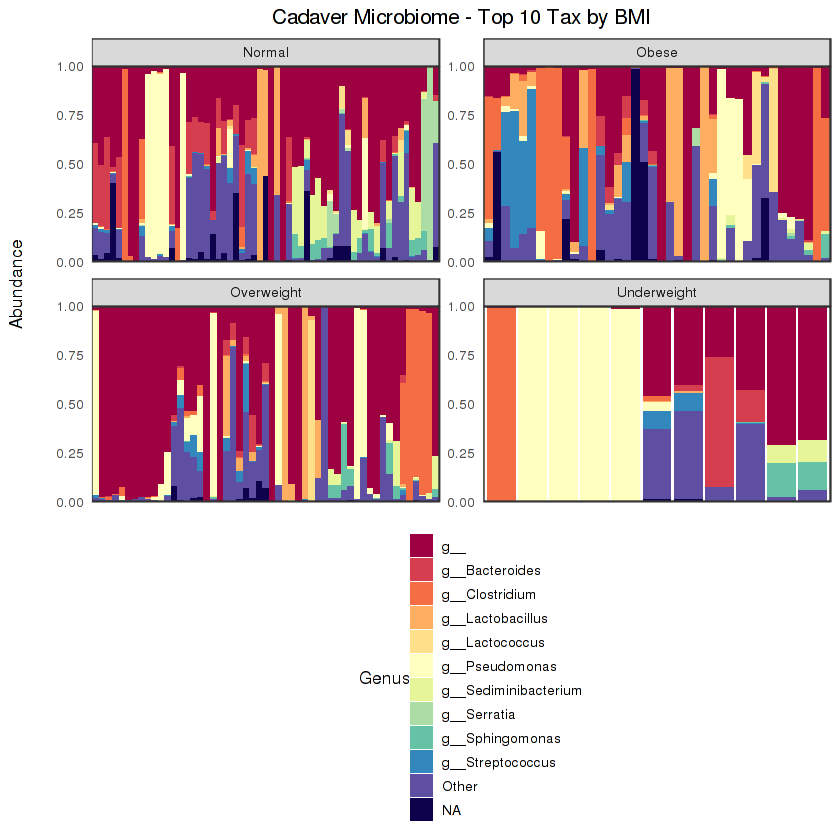

In [164]:
p = ggplot(mdf.other, aes(x=factor(Sample), y = Abundance, fill = Rank6.other)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(expand = c(0,0)) + 
    scale_fill_brewer(palette = "Spectral", na.value= "#0E024C", direction=1) 

p = p + guides(fill = guide_legend(title = "Genus", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              plot.title = element_text(hjust = 0.5),
              text=element_text(size=10, color="black",family="Times New Roman"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #legend.key.size = unit(1, "mm"),
              #legend.spacing.x = unit(3,"in"),
              legend.position = "bottom",
              axis.title.x=element_blank(),
              panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Cadaver Microbiome - Top 10 Tax by BMI")

p = p + facet_wrap(~bmi_category, shrink = TRUE, scales = "free", ncol=2)

p

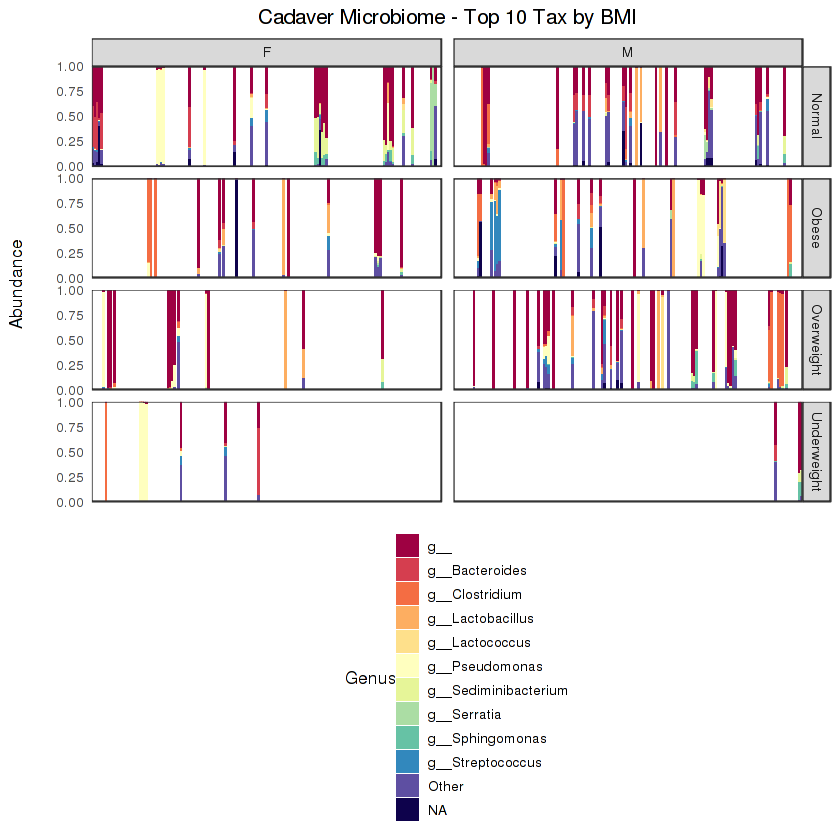

In [163]:
p = ggplot(mdf.other, aes(x=factor(Sample), y = Abundance, fill = Rank6.other)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(expand = c(0,0)) + 
    scale_fill_brewer(palette = "Spectral", na.value= "#0E024C", direction=1) 

p = p + guides(fill = guide_legend(title = "Genus", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              plot.title = element_text(hjust = 0.5),
              text=element_text(size=10, color="black",family="Times New Roman"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #legend.key.size = unit(1, "mm"),
              #legend.spacing.x = unit(3,"in"),
              legend.position = "bottom",
              axis.title.x=element_blank(),
              panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Cadaver Microbiome - Top 10 Tax by BMI")

p = p + facet_grid(bmi_category~Sex)

p

#### Top 10 Orders by Location

In [186]:
N = 11

topN = cadaver5k.mdf %>%
    group_by(Rank4) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank4) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank4")

mdf.other = cadaver5k.mdf %>%
    mutate(Rank4.other = ifelse(Rank4 %in% topN, as.character(Rank4), "Other")) %>%
    group_by(Sample, Rank4.other, Location) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(Rank4.other, Location) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Rank4.other))

Selecting by m


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”

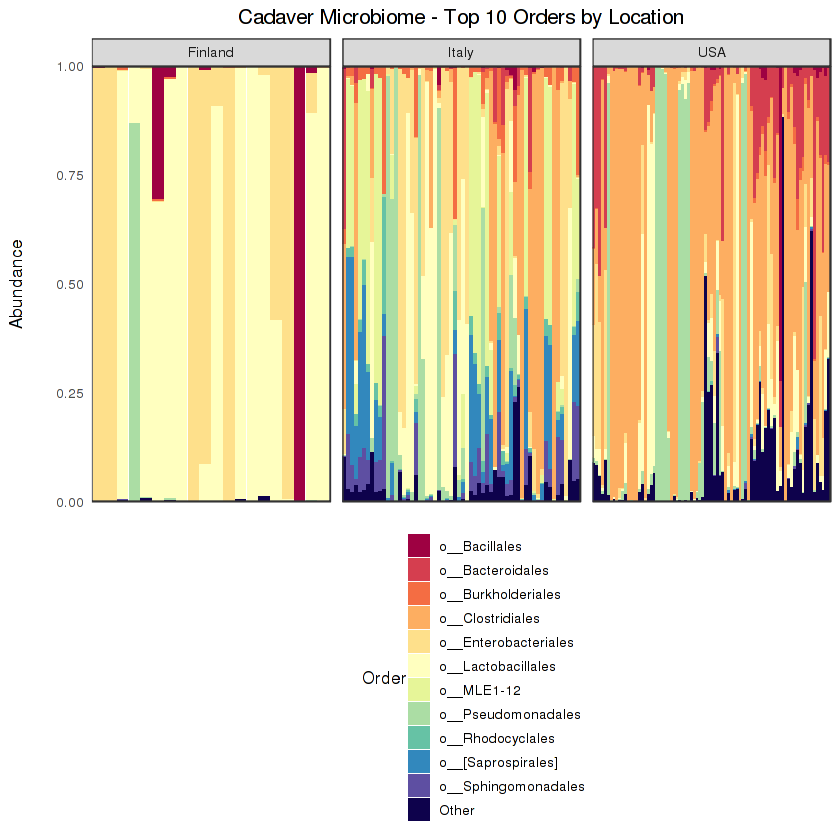

In [187]:
mdf.other$Location <- factor(mdf.other$Location)

p = ggplot(mdf.other, aes(x=Sample, y = Abundance, fill = Rank4.other)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(expand = c(0,0)) + 
    scale_fill_brewer(palette = "Spectral", na.value= "#0E024C", direction=1) 

p = p + guides(fill = guide_legend(title = "Order", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              plot.title = element_text(hjust = 0.5),
              text=element_text(size=10, color="black",family="Times New Roman"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              legend.key.size = unit(1, "mm"),
              #legend.spacing.x = unit(3,"in"),
              legend.position = "bottom",
              axis.title.x=element_blank(),
              panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Cadaver Microbiome - Top 10 Orders by Location")

p = p + facet_wrap(~Location, shrink = TRUE, scales = "free_x", ncol=4)

p

#### Top 10 Orders by Manner of Death

In [189]:
N = 11

topN = cadaver5k.mdf %>%
    group_by(Rank4) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank4) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank4")

mdf.other = cadaver5k.mdf %>%
    mutate(Rank4.other = ifelse(Rank4 %in% topN, as.character(Rank4), "Other")) %>%
    group_by(Sample, Rank4.other, The_manner_of_death) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdf.summary = mdf.other %>%
    group_by(Rank4.other, The_manner_of_death) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              proportion = round(avg*100,2)) %>%
    arrange((Rank4.other))

Selecting by m


Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”

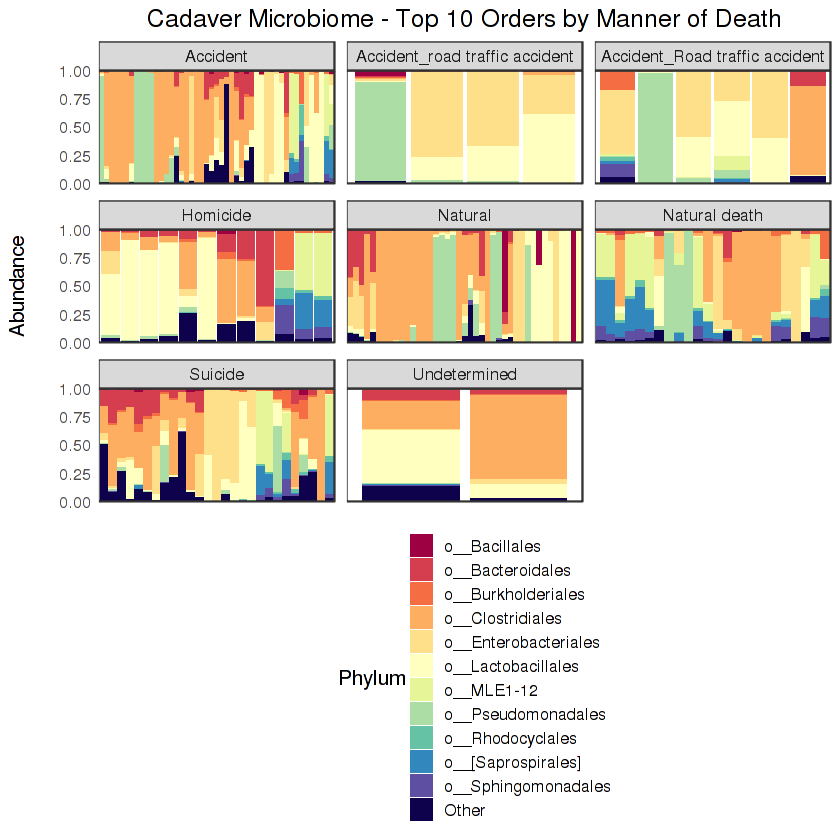

In [191]:
mdf.other$The_manner_of_death <- factor(mdf.other$The_manner_of_death)

p = ggplot(mdf.other, aes(x=Sample, y = Abundance, fill = Rank4.other)) + 
    geom_bar(stat="identity") + 
    scale_y_continuous(expand = c(0,0)) + 
    scale_fill_brewer(palette = "Spectral", na.value= "#0E024C", direction=1) 

p = p + guides(fill = guide_legend(title = "Phylum", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              plot.title = element_text(hjust = 0.5),
              text=element_text(size=12, color="black",family="Times New Roman"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              legend.key.size = unit(1, "mm"),
              #legend.spacing.x = unit(3,"in"),
              legend.position = "bottom",
              axis.title.x=element_blank(),
              panel.spacing = unit(.5, "lines"))

p = p + ggtitle("Cadaver Microbiome - Top 10 Orders by Manner of Death")

p = p + facet_wrap(~The_manner_of_death, shrink = TRUE, scales = "free_x")

p

### Prep data for Piphillin analyses

In [212]:
Finland = subset_samples(cadaver_nt_5k, Location=="Finland")
Italy = subset_samples(cadaver_nt_5k, Location=="Italy")
Europe = merge_phyloseq(Finland,Italy)
Europe = prune_taxa(taxa_sums(Europe)>0, Europe)
Europe.df = data.frame(otu_table(Europe))
write.table(Europe.df, "Europe_otu.txt", sep = "\t", row.names = TRUE, col.names = TRUE)


In [222]:
head(Europe_metadata)

,X.SampleID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,Ethnicity,Order,Location,...,Organ,RTLID,Samplename,Cause_of_death,The_manner_of_death,Height_cm,Weight_kg,bmi,bmi_category,Description
4885.48Liver,4885.48Liver,AAAACAGT,GTGCCAGCMGCCGCGGTAA,4885,L638,M,65,C,4885,Finland,...,Liver,48,48-MS515F,Acute tubulo-interstitial nephritis,Natural,171,73,24.96,normal,4885.48_Liver
4885.9Liver,4885.9Liver,AAAACCCA,GTGCCAGCMGCCGCGGTAA,4885,L537,M,64,C,4885,Finland,...,Liver,9,9-MS515F,Alcoholic cardiomyopathy,Natural,178,146,46.08,obese,4885.9_Liver
4885.19Liver,4885.19Liver,AAAACAAT,GTGCCAGCMGCCGCGGTAA,4885,L572,M,75,C,4885,Finland,...,Liver,19,19-MS515F,Atherosclerotic heart disease,Natural,176,78,25.18,overweight,4885.19_Liver
4885.47Liver,4885.47Liver,AAAACAGG,GTGCCAGCMGCCGCGGTAA,4885,L637,M,75,C,4885,Finland,...,Liver,47,47-MS515F,Ischaemic cardiomyopathy,Natural,182,94,28.38,overweight,4885.47_Liver
4885.26Liver,4885.26Liver,AAAACACA,GTGCCAGCMGCCGCGGTAA,4885,L584,M,68,C,4885,Finland,...,Liver,26,26-MS515F,Duodenal ulcer,Natural,172,61,20.62,normal,4885.26_Liver
4885.8Liver,4885.8Liver,AAAACCAT,GTGCCAGCMGCCGCGGTAA,4885,L534,M,72,C,4885,Finland,...,Liver,8,8-MS515F,Drowning,Accident,170,100,34.60,obese,4885.8_Liver


In [214]:
setwd("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/")

Europe_metadata = data.frame(sample_data(Europe))
write.table(Europe_metadata, "Europe_metadata.txt", sep = "\t", row.names = TRUE, col.names = TRUE)

Italy_metadata = data.frame(sample_data(Italy))
write.table(Italy_metadata, "Italy_metadata.txt", sep = "\t", row.names = TRUE, col.names = TRUE)

Finland_metadata = data.frame(sample_data(Finland))
write.table(Finland_metadata, "Finland_metadata.txt", sep = "\t", row.names = TRUE, col.names = TRUE)

USA_metadata = data.frame(sample_data(USA))
write.table(USA_metadata, "USA_metadata.txt", sep = "\t", row.names = TRUE, col.names = TRUE)


In [227]:
Finland = subset_samples(cadaver_nt_5k, Location=="Finland")
Italy = subset_samples(cadaver_nt_5k, Location=="Italy")
USA = subset_samples(cadaver_nt_5k, Location=="USA")

Finland = prune_taxa(taxa_sums(Finland)>0, Finland)
Italy = prune_taxa(taxa_sums(Italy)>0, Italy)
USA = prune_taxa(taxa_sums(USA)>0, USA)

Finland.df = data.frame(otu_table(Finland))
Italy.df = data.frame(otu_table(Italy))
USA.df = data.frame(otu_table(USA))
                      
Finland.taxa = data.frame(tax_table(Finland))
Italy.taxa = data.frame(tax_table(Italy))
USA.taxa = data.frame(tax_table(USA))
                 
setwd("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/")

#write.table(Finland.df, "Finland_otu.txt", sep = "\t", row.names = TRUE, col.names = TRUE)
#write.table(Italy.df, "Italy_otu.txt", sep = "\t", row.names = TRUE, col.names = TRUE)
#write.table(USA.df, "USA_otu.txt", sep = "\t", row.names = TRUE, col.names = TRUE)



In [196]:
liver = subset_samples(cadaver_nt_5k, Organ=="Liver")
heart = subset_samples(cadaver_nt_5k, Organ=="Heart")
spleen = subset_samples(cadaver_nt_5k, Organ=="Spleen")
uterus = subset_samples(cadaver_nt_5k, Organ=="Uterus")
brain = subset_samples(cadaver_nt_5k, Organ=="Brain")
blood = subset_samples(cadaver_nt_5k, Organ=="Blood")
prostate = subset_samples(cadaver_nt_5k, Organ=="Prostate")

liver = prune_taxa(taxa_sums(liver)>0, liver)
heart = prune_taxa(taxa_sums(heart)>0, heart)
spleen = prune_taxa(taxa_sums(spleen)>0, spleen)
uterus = prune_taxa(taxa_sums(uterus)>0, uterus)
brain = prune_taxa(taxa_sums(brain)>0, brain)
blood = prune_taxa(taxa_sums(blood)>0, blood)
prostate = prune_taxa(taxa_sums(prostate)>0, prostate)

cadaver_nt_5k = prune_taxa(taxa_sums(cadaver_nt_5k)>0, cadaver_nt_5k)


In [200]:
liver.df = data.frame(otu_table(liver))
heart.df = data.frame(otu_table(heart))
spleen.df = data.frame(otu_table(spleen))
uterus.df = data.frame(otu_table(uterus))
brain.df = data.frame(otu_table(brain))
blood.df = data.frame(otu_table(blood))
prostate.df = data.frame(otu_table(prostate))
cadaver_nt_5k.df = data.frame(otu_table(cadaver_nt_5k))

setwd("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/")

write.csv(liver.df, "liver_otu.csv")
write.csv(heart.df, "heart_otu.csv")
write.csv(spleen.df, "spleen_otu.csv")
write.csv(uterus.df, "uterus_otu.csv")
write.csv(brain.df, "brain_otu.csv")
write.csv(blood.df, "blood_otu.csv")
write.csv(prostate.df, "prostate_otu.csv")
write.csv(cadaver_nt_5k.df, "cadaver_5k_otu_table.csv")

In [202]:
cadaver_nt_5k

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1858 taxa and 163 samples ]
sample_data() Sample Data:       [ 163 samples by 21 sample variables ]
tax_table()   Taxonomy Table:    [ 1858 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1858 tips and 1856 internal nodes ]

In [307]:
Italy_liver = subset_samples(liver, Location=="Italy")
Finland_liver = subset_samples(liver, Location=="Finland")
USA_liver = subset_samples(liver, Location=="USA")
Europe_liver = merge_phyloseq(Italy_liver, Finland_liver)

Euro_spleen = subset_samples(spleen, Location=="Italy")
#Finland_spleen = subset_samples(spleen, Location=="Finland") NONE
USA_spleen = subset_samples(spleen, Location=="USA")

Euro_liver = prune_taxa(taxa_sums(Europe_liver)>0, Europe_liver)
USA_liver = prune_taxa(taxa_sums(USA_liver)>0, USA_liver)
Euro_spleen = prune_taxa(taxa_sums(Euro_spleen)>0, Euro_spleen)
USA_spleen = prune_taxa(taxa_sums(USA_spleen)>0, USA_spleen)

Euro_liver.df = data.frame(otu_table(Euro_liver))
USA_liver.df = data.frame(otu_table(USA_liver))
Euro_spleen.df = data.frame(otu_table(Euro_spleen))
USA_spleen.df = data.frame(otu_table(USA_spleen))

write.csv(Euro_liver.df, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/Euro_liver_otu.csv")
write.csv(USA_liver.df, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/USA_liver_otu.csv")
write.csv(Euro_spleen.df, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/Euro_spleen_otu.csv")
write.csv(USA_spleen.df, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/USA_spleen_otu.csv")

In [ ]:
Euro_liver_md = data.frame(sample_data(Euro_liver))
Euro_spleen_md = data.frame(sample_data(Euro_spleen))
USA_liver_md = data.frame(sample_data(USA_liver))
USA_spleen_md = data.frame(sample_data(USA_spleen))

write.csv(Euro_liver_md, "Euro_liver_md.csv")
write.csv(Euro_spleen_md, "Euro_spleen_md.csv")
write.csv(USA_liver_md, "USA_liver_md.csv")
write.csv(USA_spleen_md, "USA_spleen_md.csv")

### ANCOM with Covariates

In [8]:
library(exactRankTests)
library(nlme)
library(ggplot2)

ancom.W = function(otu_data,var_data,
                   adjusted,repeated,
                   main.var,adj.formula,
                   repeat.var,long,rand.formula,
                   multcorr,sig){
  
  n_otu=dim(otu_data)[2]-1
  
  otu_ids=colnames(otu_data)[-1]
  
  if(repeated==F){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID",all.y=T),row.names=NULL)
    #data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var)],by="Sample.ID",all.y=T),row.names=NULL)
  }else if(repeated==T){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID"),row.names=NULL)
   # data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var,repeat.var)],by="Sample.ID"),row.names=NULL)
  }
  
  base.formula = paste0("lr ~ ",main.var)
  if(repeated==T){
    repeat.formula = paste0(base.formula," | ", repeat.var)
  }
  if(adjusted==T){
    adjusted.formula = paste0(base.formula," + ", adj.formula)
  }
  
  if( adjusted == F & repeated == F ){
    fformula  <- formula(base.formula)
  } else if( adjusted == F & repeated == T & long == T ){
    fformula  <- formula(base.formula)   
  }else if( adjusted == F & repeated == T & long == F ){
    fformula  <- formula(repeat.formula)   
  }else if( adjusted == T & repeated == F  ){
    fformula  <- formula(adjusted.formula)   
  }else if( adjusted == T & repeated == T  ){
    fformula  <- formula(adjusted.formula)   
  }else{
    stop("Problem with data. Dataset should contain OTU abundances, groups, 
         and optionally an ID for repeated measures.")
  }
  
  
  
    if( repeated==FALSE & adjusted == FALSE){
       if( length(unique(data_comp[,which(colnames(data_comp)==main.var)]))==2 ){
          tfun <- exactRankTests::wilcox.exact
       } else{
          tfun <- stats::kruskal.test
    }
    }else if( repeated==FALSE & adjusted == TRUE){
      tfun <- stats::aov
    }else if( repeated== TRUE & adjusted == FALSE & long == FALSE){
      tfun <- stats::friedman.test
    }else if( repeated== TRUE & adjusted == FALSE & long == TRUE){
      tfun <- nlme::lme
    }else if( repeated== TRUE & adjusted == TRUE){
      tfun <- nlme::lme
    }
  
  logratio.mat <- matrix(NA, nrow=n_otu, ncol=n_otu)
  for(ii in 1:(n_otu-1)){
    for(jj in (ii+1):n_otu){
      data.pair <- data_comp[,which(colnames(data_comp)%in%otu_ids[c(ii,jj)])]
      lr <- log((1+as.numeric(data.pair[,1]))/(1+as.numeric(data.pair[,2])))
      
      lr_dat <- data.frame( lr=lr, data_comp,row.names=NULL )
      
      if(adjusted==FALSE&repeated==FALSE){  ## Wilcox, Kruskal Wallis
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==FALSE&repeated==TRUE&long==FALSE){ ## Friedman's 
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==TRUE&repeated==FALSE){ ## ANOVA
        model=tfun(formula=fformula, data = lr_dat,na.action=na.omit)   
        picker=which(gsub(" ","",row.names(summary(model)[[1]]))==main.var)  
        logratio.mat[ii,jj] <- summary(model)[[1]][["Pr(>F)"]][picker]
      }else if(repeated==TRUE&long==TRUE){ ## GEE
        model=tfun(fixed=fformula,data = lr_dat,
                   random = formula(rand.formula),
                   correlation=corAR1(),
                   na.action=na.omit)   
        picker=which(gsub(" ","",row.names(anova(model)))==main.var)
        logratio.mat[ii,jj] <- anova(model)[["p-value"]][picker]
      }
      
    }
  } 
  
  ind <- lower.tri(logratio.mat)
  logratio.mat[ind] <- t(logratio.mat)[ind]
  
  
  logratio.mat[which(is.finite(logratio.mat)==FALSE)] <- 1
  
  mc.pval <- t(apply(logratio.mat,1,function(x){
    s <- p.adjust(x, method = "BH")
    return(s)
  }))
  
  a <- logratio.mat[upper.tri(logratio.mat,diag=FALSE)==TRUE]
  
  b <- matrix(0,ncol=n_otu,nrow=n_otu)
  b[upper.tri(b)==T] <- p.adjust(a, method = "BH")
  diag(b)  <- NA
  ind.1    <- lower.tri(b)
  b[ind.1] <- t(b)[ind.1]
  
  #########################################
  ### Code to extract surrogate p-value
  surr.pval <- apply(mc.pval,1,function(x){
    s0=quantile(x[which(as.numeric(as.character(x))<sig)],0.95)
    # s0=max(x[which(as.numeric(as.character(x))<alpha)])
    return(s0)
  })
  #########################################
  ### Conservative
  if(multcorr==1){
    W <- apply(b,1,function(x){
      subp <- length(which(x<sig))
    })
    ### Moderate
  } else if(multcorr==2){
    W <- apply(mc.pval,1,function(x){
      subp <- length(which(x<sig))
    })
    ### No correction
  } else if(multcorr==3){
    W <- apply(logratio.mat,1,function(x){
      subp <- length(which(x<sig))
    })
  }
  
  return(W)
  }



ANCOM.main = function(OTUdat,Vardat,
                      adjusted,repeated,
                      main.var,adj.formula,
                      repeat.var,longitudinal,
                      random.formula,
                      multcorr,sig,
                      prev.cut){
  
  p.zeroes=apply(OTUdat[,-1],2,function(x){
    s=length(which(x==0))/length(x)
  })
  
  zeroes.dist=data.frame(colnames(OTUdat)[-1],p.zeroes,row.names=NULL)
  colnames(zeroes.dist)=c("Taxon","Proportion_zero")
  
  zero.plot = ggplot(zeroes.dist, aes(x=Proportion_zero)) + 
              geom_histogram(binwidth=0.1,colour="black",fill="white") + 
              xlab("Proportion of zeroes") + ylab("Number of taxa") +
              theme_bw()
  
  #print(zero.plot)
  
  OTUdat.thinned=OTUdat
  OTUdat.thinned=OTUdat.thinned[,c(1,1+which(p.zeroes<prev.cut))]
  
  otu.names=colnames(OTUdat.thinned)[-1]
  
  W.detected   <- ancom.W(OTUdat.thinned,Vardat,
                          adjusted,repeated,
                          main.var,adj.formula,
                          repeat.var,longitudinal,random.formula,
                          multcorr,sig)
  
  W_stat       <- W.detected
  
  
  ### Bubble plot
  
  W_frame = data.frame(otu.names,W_stat,row.names=NULL)
  W_frame = W_frame[order(-W_frame$W_stat),]
  
  W_frame$detected_0.9=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.8=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.7=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.6=rep(FALSE,dim(W_frame)[1])
  
  W_frame$detected_0.9[which(W_frame$W_stat>0.9*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.8[which(W_frame$W_stat>0.8*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.7[which(W_frame$W_stat>0.7*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.6[which(W_frame$W_stat>0.6*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  
  final_results=list(W_frame,zero.plot)
  names(final_results)=c("W.taxa","PLot.zeroes")
  return(final_results)
    }

 Package ‘exactRankTests’ is no longer under development.
 Please consider using package ‘coin’ instead.


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



### European Organs - covariates: Sex, Age, Location, PMI

In [9]:
#READ IN DATA

liver_otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/liver.otu.csv")
liver_meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/OTU_files/liver.map.csv")

names(liver_otu)[1]<-"Sample.ID"
names(liver_meta)[1]<-"Sample.ID"

In [11]:
liver = subset_samples(cadaver_nt, Organ=="Liver")
spleen = subset_samples(cadaver_nt, Organ=="Spleen")
heart = subset_samples(cadaver_nt, Organ=="Heart")
brain = subset_samples(cadaver_nt, Organ=="Brain")

#liver = prune_taxa(taxa_sums(liver)>0, liver)
#spleen = prune_taxa(taxa_sums(spleen)>0, spleen)
#heart = prune_taxa(taxa_sums(heart)>0, heart)
#brain = prune_taxa(taxa_sums(brain)>0, brain)

organs = merge_phyloseq(liver,heart,spleen,brain)
organs = prune_taxa(taxa_sums(organs)>0, organs)

In [18]:
all_otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/all_otu.csv" )
all_meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/all_meta.csv")

#all_otu = otu_table(organs)
#write.csv(all_otu,"/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/all_otu.csv" )
#all_meta = sample_data(organs)
#write.csv(all_meta, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/all_meta.csv")

#names(all_otu)[1]<-"Sample.ID"
#names(all_meta)[1]<-"Sample.ID"

In [67]:
brain <- all_meta[which(all_meta$Organ=='Brain'),]

In [80]:
accident = heart %>%
mutate(Single_MOD = MOD)

accident$Single_MOD = as.character(accident$Single_MOD)
accident$Single_MOD[which(accident$MOD != "Accident")] = "Other"
accident$Single_MOD = as.factor(accident$Single_MOD)
head(accident$Single_MOD)

[1] Other    Accident Accident Accident Accident Other   
Levels: Accident Other

In [84]:
x = tax_table(cadaver_nt)
write.csv(x, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/MOD/cadaver_nt.tax_table.csv" )

In [17]:
colnames(all_meta)

[1] "SampleID"             "BarcodeSequence"      "LinkerPrimerSequence"
 [4] "RTL_run"              "Case_no"              "Sex"                 
 [7] "Age"                  "Ethnicity"            "Order"               
[10] "Location"             "PMI"                  "Organ"               
[13] "RTLID"                "Samplename"           "Cause_of_death"      
[16] "The_manner_of_death"  "Height_cm"            "Weight_kg"           
[19] "bmi"                  "bmi_category"         "Description"

In [19]:
#RUN ANCOM
#variable "Organ" takes values Liver and Other

comparison_test=ANCOM.main(OTUdat=all_otu,
                           Vardat=all_meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Organ",
                           adj.formula="Location+Sex+Age+PMI+bmi_category", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

all.organ.ancom = comparison_test$W.taxa
head(all.organ.ancom)

,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
81,TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGATGTGAAATCCCCGGGCTTAACCTGGGAACTGCATTTGTGACTGCACGGCTAGAGTGTGTCAGAGGGGGGTAGAATTCCACG,112,TRUE,TRUE,TRUE,TRUE
46,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG,110,TRUE,TRUE,TRUE,TRUE
44,GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG,109,TRUE,TRUE,TRUE,TRUE
49,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG,109,TRUE,TRUE,TRUE,TRUE
74,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCACGGCTAGAGTACGGTAGAGGGGGATGGAATTCCGCG,108,TRUE,TRUE,TRUE,TRUE
79,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG,108,TRUE,TRUE,TRUE,TRUE


In [20]:
write.csv(all.organ.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/MOD/all.organ.ancom.csv")



In [57]:
all_liver = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/all_liver.loc.ancom.csv")
all_spleen = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/all_spleen.loc.ancom.csv")
all_brain = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/all_brain.loc.ancom.csv")
all_heart = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/all_heart.loc.ancom.csv")

euro_liver = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/Europe_liver.ancom.csv")
euro_spleen = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/Europe_spleen.ancom.csv")
euro_brain = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/Europe_brain.ancom.csv")
euro_heart = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/Europe_heart.ancom.csv")
euro_uterus = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/Europe_uterus.ancom.csv")
euro_prostate = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/Europe_prostate.ancom.csv")

usa_liver = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/USA_liver.ancom.csv")
usa_spleen = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/USA_spleen.ancom.csv")
usa_brain = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/USA_brain.ancom.csv")
usa_heart = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/USA_heart.ancom.csv")
usa_blood = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/USA_blood.ancom.csv")


In [10]:
liver_sig_taxa <- left_join(all_liver, tax_table)
write.csv(liver_sig_taxa, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/sig_taxa/all_liver.ancom.sigres.taxa.csv")

spleen_sig_taxa <- left_join(all_spleen, tax_table)
write.csv(spleen_sig_taxa, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/sig_taxa/all_spleen.ancom.sigres.taxa.csv")

brain_sig_taxa <- left_join(all_brain, tax_table)
write.csv(brain_sig_taxa, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/sig_taxa/all_brain.ancom.sigres.taxa.csv")

heart_sig_taxa <- left_join(all_heart, tax_table)
write.csv(heart_sig_taxa, "/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/sig_taxa/all_heart.ancom.sigres.taxa.csv")


Joining, by = "otu.names"
Warning message:
“Column `otu.names` joining factors with different levels, coercing to character vector”Joining, by = "otu.names"
Warning message:
“Column `otu.names` joining factors with different levels, coercing to character vector”Joining, by = "otu.names"
Warning message:
“Column `otu.names` joining factors with different levels, coercing to character vector”Joining, by = "otu.names"
Warning message:
“Column `otu.names` joining factors with different levels, coercing to character vector”

In [51]:
sigres.mdf = psmelt(sig_taxa)
liver = psmelt(liver_merged)
spleen = psmelt(spleen_merged)
heart = psmelt(heart_merged)
brain = psmelt(brain_merged)

In [52]:
stats = sigres.mdf %>%
    group_by(Organ, OTU) %>%
    summarize(median = median(Abundance), 
              mean = mean(Abundance),
              sd = sd(Abundance),
              sem = sd(Abundance/sqrt(length(Abundance))))
head(stats)

Warning message in grouped_df(groups$data, groups$group_names):
“internal error -3 in R_decompress1”

ERROR: Error in grouped_df(groups$data, groups$group_names): lazy-load database '/gpfs/apps/haswell/software/gcc-6.2.0/R/3.4.1/lib64/R/library/assertthat/R/assertthat.rdb' is corrupt


In [53]:
taxid = read.csv("/group/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Organs/sig_taxa/taxids.csv")

In [54]:
all_ancom_results = left_join(sigres.mdf,taxid)
liver_ancom_results = left_join(liver,taxid)
spleen_ancom_results = left_join(spleen,taxid)
heart_ancom_results = left_join(heart,taxid)
brain_ancom_results = left_join(brain,taxid)

Joining, by = "OTU"
Warning message:
“Column `OTU` joining character vector and factor, coercing into character vector”Joining, by = "OTU"
Warning message:
“Column `OTU` joining character vector and factor, coercing into character vector”Joining, by = "OTU"
Warning message:
“Column `OTU` joining character vector and factor, coercing into character vector”Joining, by = "OTU"
Warning message:
“Column `OTU` joining character vector and factor, coercing into character vector”Joining, by = "OTU"
Warning message:
“Column `OTU` joining character vector and factor, coercing into character vector”

In [55]:
head(all_ancom_results)

OTU,Sample,Abundance,X.SampleID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,...,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7,TaxID,Detection,W_stat
TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,3813.53Spleen,29842,3813.53Spleen,AAAACTAA,GTGCCAGCMGCCGCGGTAA,53,C48,F,45,...,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__,f__Peptostreptococcaceae,0.9,121
TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,3813.53Spleen,29842,3813.53Spleen,AAAACTAA,GTGCCAGCMGCCGCGGTAA,53,C48,F,45,...,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__,f__Peptostreptococcaceae,0.9,177
TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,3813.53Spleen,29842,3813.53Spleen,AAAACTAA,GTGCCAGCMGCCGCGGTAA,53,C48,F,45,...,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__,f__Peptostreptococcaceae,0.9,175
TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATG,4885.43Liver,27627,4885.43Liver,AAAACACT,GTGCCAGCMGCCGCGGTAA,4885,L629,F,83,...,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__,g__Lactobacillus,0.8,104
TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATG,4885.43Liver,27627,4885.43Liver,AAAACACT,GTGCCAGCMGCCGCGGTAA,4885,L629,F,83,...,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__,g__Lactobacillus,0.9,119
TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,3813.21Spleen,26547,3813.21Spleen,AAAACATC,GTGCCAGCMGCCGCGGTAA,21,C25,F,48,...,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Peptostreptococcaceae,g__,s__,f__Peptostreptococcaceae,0.9,121


In [59]:
ancom_0.9 = all_ancom_results[which(all_ancom_results$Detection=='0.9'),]
ancom_0.8 = all_ancom_results[which(all_ancom_results$Detection!='0.7'),]

Warning message:
“Removed 814 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 814 rows containing missing values (geom_point).”

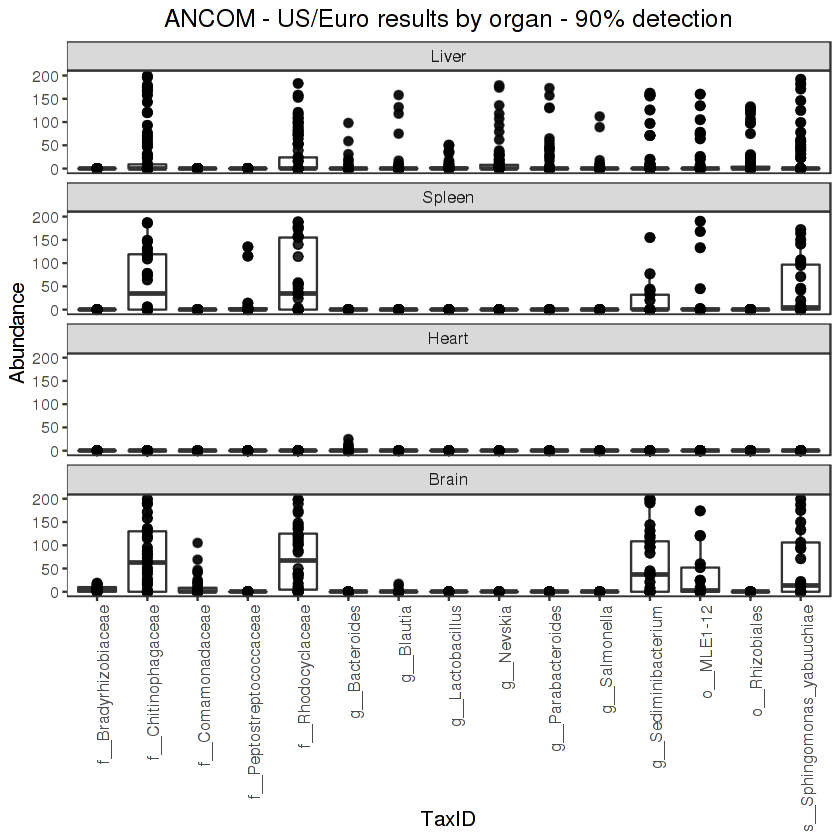

In [61]:
p = ggplot(ancom_0.9, aes(x = TaxID, y = Abundance)) + ggtitle("ANCOM - US/Euro results by organ - 90% detection")
p = p + geom_boxplot() + ylab("Abundance")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

p = p + scale_y_continuous(limits = c(0,200))

p = p + geom_point(size = 2,alpha=.6)#, aes(color = Rank4),
                   #position = position_jitter(h = 0, w = 0.1)) #+
                  #scale_colour_brewer(palette="Spectral")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ, ncol=1)

p

Warning message:
“Removed 1238 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1238 rows containing missing values (geom_point).”

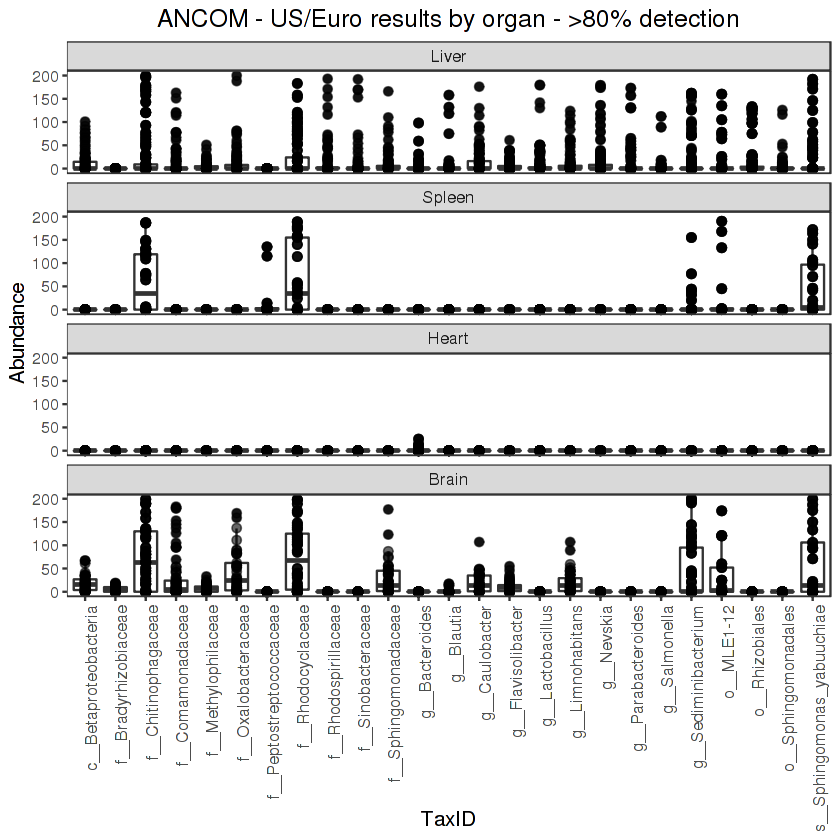

In [62]:
p = ggplot(ancom_0.8, aes(x = TaxID, y = Abundance)) + ggtitle("ANCOM - US/Euro results by organ - >80% detection")
p = p + geom_boxplot() + ylab("Abundance")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

p = p + scale_y_continuous(limits = c(0,200))

p = p + geom_point(size = 2,alpha=.6)#, aes(color = Rank4),
                   #position = position_jitter(h = 0, w = 0.1)) #+
                  #scale_colour_brewer(palette="Spectral")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ, ncol=1)

p

Warning message:
“Removed 1514 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 1514 rows containing missing values (geom_point).”

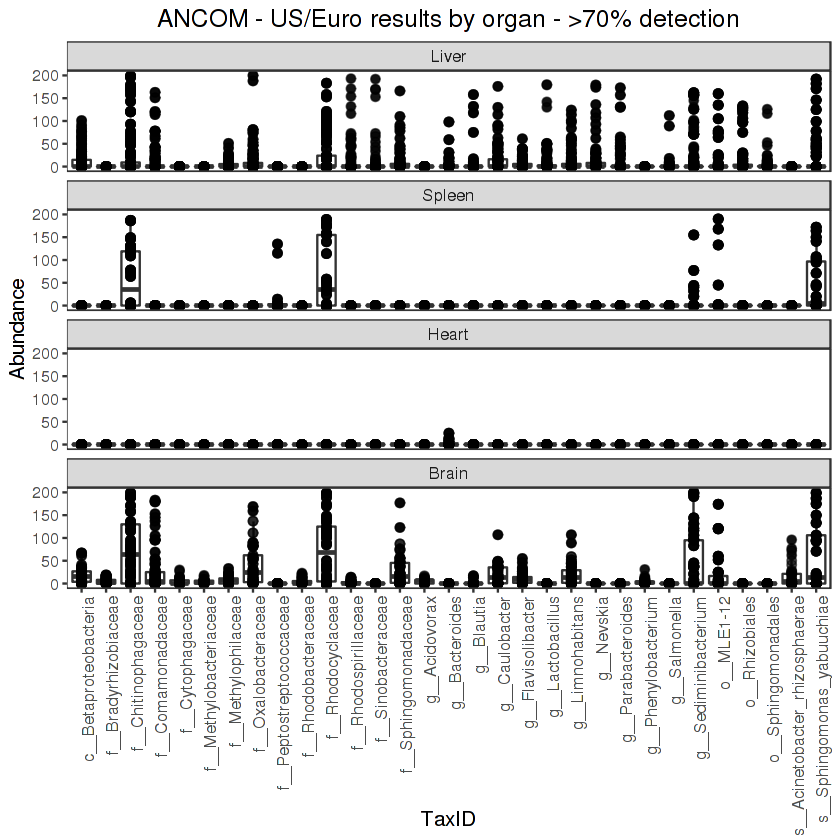

In [64]:
p = ggplot(all_ancom_results, aes(x = TaxID, y = Abundance)) + ggtitle("ANCOM - US/Euro results by organ - >70% detection")
p = p + geom_boxplot() + ylab("Abundance")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

p = p + scale_y_continuous(limits = c(0,200))

p = p + geom_point(size = 2,alpha=.6)#, aes(color = Rank4),
                   #position = position_jitter(h = 0, w = 0.1)) #+
                  #scale_colour_brewer(palette="Spectral")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ, ncol=1)

p

### USA Only

In [ ]:
'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG',
'TACGTAGGGCGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTTGTAGGCGGTTGGTCGCGTCTGCTGTGAAAGGCTGGGGCTTAACCCTGGTTTTGCAGTGGGTACGGGCTAACTAGAGTGCAGTAGGGGAGACTGGAATTCCTGG'

In [ ]:
### Subset OTUs ID'd by ANCOM

#LIVER

subset1 <- subset(otu_table(liver), 
        rownames(otu_table(liver)) %in% c(
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG',
'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG',
'TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCGAAACTGGCAGGCTTGAGTCTTGTAGAGGGGGGTAGAATTCCAGG',
'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAG',
'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGG',
'TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGCGTAAAGAGTATGTAGGTGGGCATTTAAGTCAGATGTGAAATTCCCGGGCTTAACCTGGGAGCTGCATTTGATACTGGGTGTCTAGAGTGCAGGAGAGGAAAGTGGAATTCCTAG',
'TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCATGCGTAGGCGGATACTTAAGTGGGATGTGAAATCCCGGGGCTCAACCCCGGTGCTGCATTCCAAACTGGGTATCTAGAGTACAGGAGAGGAAAGCGGAATTCCTAG',
'TACGTATGTCACGAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGCGTTGGAAACTGTATAACTAGAGTACTGGAGAGGTAAGCGGAACTACAAGT',
'TACAGAGGGTGCAAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGTTCGTTAAGTCGATTGTGAAAGCCCTGGGCTTAACCTGGGAATTGCAGTCGATACTGGCGGACTAGAGAACGGTAGAGGGAGGCGGAACTCCAGG',
'TACGTATGGGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGTACGTAGGCGGTTTTTTAAGTCAGGTGTGAAAGCGTGAGGCTTAACCTCATTAAGCACTTGAAACTGGAAGACTTGAGTGAAGGAGAGGAAAGTGGAATTCCTAGT',
'TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAG',
'AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG',
'TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTGATTTAAGTCAGCGGTGAAAGTTTGTGGCTCAACCATAAAATTGCCGTTGAAACTGGGTTACTTGAGTGTGTTTGAGGTAGGCGGAATGCGTGG',
'TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGGGATTAAGTGTGTTGTGAAATGTAGGCGCCCAACGTCTGACTTGCAGCGCATACTGGTTCCCTTGAGTACGCGCAACGCCGGCGGAATTCGTCG',
'TACGGAGGATCCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTATTAAGTCAGGGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTGATGAGCTTGAATACACTAGAGGTAGGCGGAATGTGACA'
        ))
liver_merged <- merge_phyloseq(subset1, tax_table(liver), sample_data(liver))

#SPLEEN

subset2 <- subset(otu_table(spleen), 
        rownames(otu_table(spleen)) %in% c(
       'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG',
'TACGTAGGGCGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTTGTAGGCGGTTGGTCGCGTCTGCTGTGAAAGGCTGGGGCTTAACCCTGGTTTTGCAGTGGGTACGGGCTAACTAGAGTGCAGTAGGGGAGACTGGAATTCCTGG'
        ))
spleen_merged <- merge_phyloseq(subset2, tax_table(cadaver_nt), sample_data(cadaver_nt))

#HEART

subset3 <- subset(otu_table(heart), 
        rownames(otu_table(heart)) %in% c(
        'TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCATGCGTAGGCGGATACTTAAGTGGGATGTGAAATCCCGGGGCTCAACCCCGGTGCTGCATTCCAAACTGGGTATCTAGAGTACAGGAGAGGAAAGCGGAATTCCTAG',
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG'
     
        ))
       heart_merged <- merge_phyloseq(subset3, tax_table(cadaver_nt), sample_data(cadaver_nt))

#BRAIN

subset4 <- subset(otu_table(brain), 
        rownames(otu_table(brain)) %in% c(
        'TACGTATGTCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGCGTTGGAAACTGTGTAACTAGAGTACTGGAGAGGTAAGCGGAACTACAAGT'
        ))
brain_merged <- merge_phyloseq(subset4, tax_table(cadaver_nt), sample_data(cadaver_nt))

### USA Organs - covariates: Sex, Age, PMI

In [44]:
#READ IN DATA

USA_otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/USA_otu.csv")
USA_meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/USA_meta.csv")

names(USA_otu)[1]<-"Sample.ID"
names(USA_meta)[1]<-"Sample.ID"

In [58]:
#READ IN DATA

Europe_otu = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Europe_otu.csv")
Europe_meta = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Europe_meta.csv")

names(Europe_otu)[1]<-"Sample.ID"
names(Europe_meta)[1]<-"Sample.ID"

In [60]:
head(USA_meta)

Sample.ID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,Ethnicity,Order,Location,...,Organ,RTLID,Samplename,Cause_of_death,The_manner_of_death,Height_cm,Weight_kg,bmi,bmi_category,Description
3813.11Brain,AAAACAAG,GTGCCAGCMGCCGCGGTAA,11,C15,F,40,C,3813,USA,...,Brain,C15,11-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.11_Brain
3813.12Heart,AAAACAAT,GTGCCAGCMGCCGCGGTAA,12,C15,F,40,C,3813,USA,...,Heart,C15,12-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.12_Heart
3813.13Liver,AAAACACA,GTGCCAGCMGCCGCGGTAA,3813,C15,F,40,C,3813,USA,...,Liver,13,13-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.13_Liver
3813.14Spleen,AAAACACC,GTGCCAGCMGCCGCGGTAA,14,C15,F,40,C,3813,USA,...,Spleen,C15,14-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.14_Spleen
3813.15Blood,AAAACACG,GTGCCAGCMGCCGCGGTAA,15,C15,F,40,C,3813,USA,...,Blood,C15,15-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.15_Blood
3813.16Liver,AAAACACT,GTGCCAGCMGCCGCGGTAA,3813,C18,F,28,L,3813,USA,...,Liver,16,16-MS515F,Car Accident,Accident,162,73,27.82,overweight,3813.16_Liver


In [61]:
#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=USA_otu,
                           Vardat=USA_meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Organ",
                           adj.formula="Sex+Age+PMI+bmi_category+Ethnicity+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

USA_Org_by_sex_age_PMI.ancom = comparison_test$W.taxa
head(USA_Org_by_sex_age_PMI.ancom)

,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
95,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG,176,TRUE,TRUE,TRUE,TRUE
37,TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT,175,TRUE,TRUE,TRUE,TRUE
100,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG,173,TRUE,TRUE,TRUE,TRUE
104,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCGAAACTGGCAGGCTTGAGTCTTGTAGAGGGGGGTAGAATTCCAGG,170,TRUE,TRUE,TRUE,TRUE
132,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGG,146,FALSE,TRUE,TRUE,TRUE
32,TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCATGCGTAGGCGGATACTTAAGTGGGATGTGAAATCCCGGGGCTCAACCCCGGTGCTGCATTCCAAACTGGGTATCTAGAGTACAGGAGAGGAAAGCGGAATTCCTAG,145,FALSE,TRUE,TRUE,TRUE


In [64]:
#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=Europe_otu,
                           Vardat=Europe_meta,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Organ",
                           adj.formula="Location+Sex+Age+PMI+bmi_category+Ethnicity+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Europe_Org_by_sex_age_PMI.ancom = comparison_test$W.taxa
head(Europe_Org_by_sex_age_PMI.ancom)

,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
29,GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG,86,TRUE,TRUE,TRUE,TRUE
80,TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA,86,TRUE,TRUE,TRUE,TRUE
33,TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG,85,TRUE,TRUE,TRUE,TRUE
77,TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA,85,TRUE,TRUE,TRUE,TRUE
34,TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTGCCTTTGATACTGAGGATCTTGAGTTCGGGAGAGGTGAGTGGAACTGCGAG,83,TRUE,TRUE,TRUE,TRUE
64,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG,82,TRUE,TRUE,TRUE,TRUE


In [63]:
write.csv(USA_Org_by_sex_age_PMI.ancom,"/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/USA_Organ.ancom.csv")

In [69]:
USA_organs = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/USA_Organ.ancom.taxa.csv")

In [71]:
head(USA_organs$W_stat)

[1] 176 175 173 170 146 145

In [66]:
write.csv(Europe_Org_by_sex_age_PMI.ancom,"/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Europe_Organ.ancom.csv")

In [62]:
tax_table = read.csv("/group/gilbert-lab/Lutz/Cadaver/tax_table.csv")

In [75]:
sig_taxa = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Europe_Organ.ancom.taxa.csv")

In [93]:
### Subset OTUs ID'd by ANCOM


subset <- subset(otu_table(cadaver), 
        rownames(otu_table(cadaver)) %in% c(
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTGCCTTTGATACTGAGGATCTTGAGTTCGGGAGAGGTGAGTGGAACTGCGAG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG',
'TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATG',
'TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCTCGGCTTAACCGAGGAAGCGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATG',
'TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGCGCTTAACGTGGGAACTGCATTTGAAACTGGCAAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGG'
))
merged <- merge_phyloseq(subset, tax_table(cadaver), sample_data(cadaver))

In [94]:
data = psmelt(merged)
data$Location = as.character(data$Location)
data1 <- data[which(data$Location=='Finland'),]
data2 <- data[which(data$Location=='Italy'),]
data1$Location = as.factor(data1$Location)
data2$Location = as.factor(data2$Location)
data3 = rbind(data1,data2)
head(data3$Location)
write.csv(data3, "/gpfs/data/gilbert-lab/Lutz/Cadaver/temp_data.csv")

[1] Finland Finland Finland Finland Finland Finland
Levels: Finland Italy

In [95]:
Euro.organs <- mutate(data3, TaxID = paste(Rank4, Rank5, Rank6, Rank7))

In [96]:
stats = Euro.organs %>%
    group_by(Organ, TaxID) %>%
    summarize(median = median(Abundance), 
              mean = mean(Abundance),
              sd = sd(Abundance),
              sem = sd(Abundance/sqrt(length(Abundance))))
head(stats)

Organ,TaxID,median,mean,sd,sem
Brain,o__Enterobacteriales f__Enterobacteriaceae g__ s__,0.000000000,2.917926e-02,0.1119908099,1.892990e-02
Brain,o__Lactobacillales f__Lactobacillaceae g__Lactobacillus s__,0.000000000,2.491800e-04,0.0011552237,1.952685e-04
Brain,o__Lactobacillales f__Lactobacillaceae g__Lactobacillus s__zeae,0.000000000,4.287947e-05,0.0002263173,3.825461e-05
Brain,o__MLE1-12 f__ g__ s__,0.273056058,2.994579e-01,0.2362689433,3.993674e-02
Brain,o__Rhizobiales f__Bradyrhizobiaceae g__ s__,0.002675227,2.383255e-03,0.0017299599,2.924166e-04
Brain,o__Rhodocyclales f__Rhodocyclaceae g__ s__,0.038915470,4.676888e-02,0.0328698465,5.556018e-03


In [101]:
write.csv(stats, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/Euro_organ.90.stats.csv")

In [102]:
liver_data <- data1[which(data1$Organ=='Liver'),]
other_data <- data1[which(data1$Organ!='Liver'),]

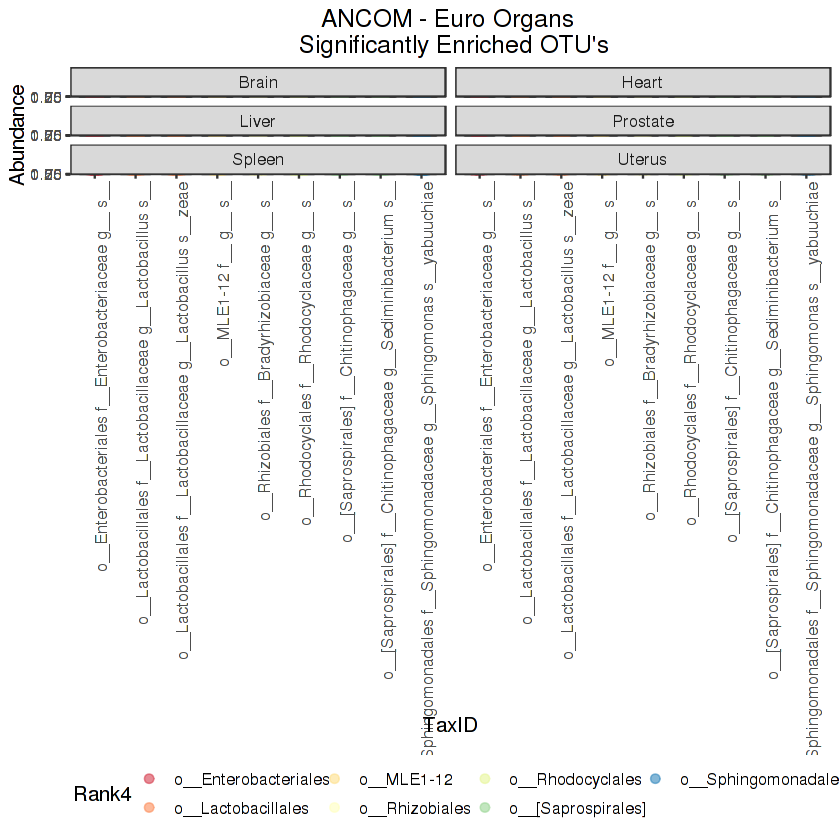

In [98]:
p = ggplot(Euro.organs, aes(x = TaxID, y = Abundance)) + ggtitle("ANCOM - Euro Organs \n Significantly Enriched OTU's")

p = p + geom_boxplot() + ylab("Abundance")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 20000))

#p = p + scale_y_continuous(limits = c(0,50))

p = p + geom_point(size = 2,alpha=.6, aes(color = Rank4),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_brewer(palette="Spectral")

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ, ncol=2)

p

In [99]:
png('ancom_organs.Euro.png', width=10, height=15, units='in', res=300)
plot(p)
dev.off()

png 
  2

### ANCOM of PIPHILLIN Results

In [6]:
counts <- as.matrix(read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/All_organs/organs.all.sorted.transposed.csv", check.names = FALSE))
map <- read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/map_files/piphillin_cadaver_metadata.csv")

names(counts)[1]<-"Sample.ID"
names(map)[1]<-"Sample.ID"


In [113]:
head(counts)
head(map)

Sample.ID,ko00010,ko00020,ko00030,ko00040,ko00051,ko00052,ko00053,ko00061,ko00071,...,ko05215,ko05219,ko05222,ko05230,ko05231,ko05322,ko05340,ko05410,ko05416,ko05418
3813.11Brain,173166,108635,117316,68482,141164,160305,23609,80038,29513,...,5898,877,393,31310,4737,8,7761,0,393,21489
3813.12Heart,165278,102760,116004,71936,148085,145544,31669,71212,31469,...,5069,1360,141,28073,4536,1,7167,0,141,19484
3813.13Liver,42851,26274,29115,17256,35341,40283,5965,19336,6753,...,1426,207,6,7681,1128,1,1890,0,6,5023
3813.14Spleen,20905,11828,14704,7585,16243,15446,3095,10063,5610,...,601,83,219,3249,491,10,864,2,219,3120
3813.16Liver,28922,23444,26867,8195,18317,7084,10395,22699,26379,...,804,8,832,4197,807,0,1635,3,832,8910
3813.17Heart,54272,17310,46706,19666,51577,49016,7431,36783,12327,...,11,5,4,5030,2432,0,48,0,4,4960


Sample.ID,BarcodeSequence,LinkerPrimerSequence,RTL_run,Case_no,Sex,Age,Ethnicity,Order,Nation,...,Organ,RTLID,Samplename,Cause_of_death,The_manner_of_death,Height_cm,Weight_kg,bmi,bmi_category,Description
3813.11Brain,AAAACAAG,GTGCCAGCMGCCGCGGTAA,11,C15,F,40,C,3813,USA,...,Brain,C15,11-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.11_Brain
3813.12Heart,AAAACAAT,GTGCCAGCMGCCGCGGTAA,12,C15,F,40,C,3813,USA,...,Heart,C15,12-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.12_Heart
3813.13Liver,AAAACACA,GTGCCAGCMGCCGCGGTAA,3813,C15,F,40,C,3813,USA,...,Liver,13,13-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.13_Liver
3813.14Spleen,AAAACACC,GTGCCAGCMGCCGCGGTAA,14,C15,F,40,C,3813,USA,...,Spleen,C15,14-MS515F,Bowel Obstruction,Natural,165,55,20.20,normal,3813.14_Spleen
3813.16Liver,AAAACACT,GTGCCAGCMGCCGCGGTAA,3813,C18,F,28,L,3813,USA,...,Liver,16,16-MS515F,Car Accident,Accident,162,73,27.82,overweight,3813.16_Liver
3813.17Heart,AAAACAGA,GTGCCAGCMGCCGCGGTAA,17,C19,F,49,C,3813,USA,...,Heart,C19,17-MS515F,Complication after surgery,Natural,193,64,17.18,underweight,3813.17_Heart


In [18]:
#MODmap = map %>%
#mutate(MOD = The_manner_of_death)

MODmap$MOD = as.character(MODmap$MOD)
MODmap$MOD[which(MODmap$The_manner_of_death == "Natural death")] = "Natural"
MODmap$MOD = as.factor(MODmap$MOD)
head(MODmap$MOD)

[1] Natural  Natural  Natural  Natural  Accident Natural 
Levels: Accident Homicide Natural Suicide

In [16]:
MODmap = subset(MODmap, MOD != "Undetermined")

In [17]:
head(MODmap$MOD)

[1] Natural  Natural  Natural  Natural  Accident Natural 
Levels: Accident Homicide Natural Natural death Suicide Undetermined

In [53]:
Suicide = MODmap %>%
mutate(MOD2 = MOD)

Suicide$MOD2 = as.character(Suicide$MOD2)
Suicide$MOD2[which(Suicide$MOD != "Suicide")] = "Other"
Suicide$MOD2 = as.factor(Suicide$MOD2)
head(Suicide$MOD2)

[1] Other Other Other Other Other Other
Levels: Other Suicide

In [54]:
Suicide$Organ = as.character(Suicide$Organ)
Suicide.brain = subset(Suicide, Organ=="Brain")
Suicide.heart = subset(Suicide, Organ=="Heart")
Suicide.liver = subset(Suicide, Organ=="Liver")
Suicide.spleen = subset(Suicide, Organ=="Spleen")
Suicide.brain$Organ = as.factor(Suicide.brain$Organ)

In [52]:
head(Homicide.brain$MOD2)

[1] Other    Other    Other    Homicide Other    Other   
Levels: Homicide Other

In [55]:
comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Natural.brain,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

natural.brain.piphillin.ancom = comparison_test$W.taxa
head(natural.brain.piphillin.ancom)

write.csv(natural.brain.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/natural.brain.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Natural.heart,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

natural.heart.piphillin.ancom = comparison_test$W.taxa
head(natural.heart.piphillin.ancom)

write.csv(natural.heart.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/natural.heart.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Natural.liver,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

natural.liver.piphillin.ancom = comparison_test$W.taxa
head(natural.liver.piphillin.ancom)

write.csv(natural.liver.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/natural.liver.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Natural.spleen,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

natural.spleen.piphillin.ancom = comparison_test$W.taxa
head(natural.spleen.piphillin.ancom)

write.csv(natural.spleen.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/natural.spleen.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Accident.brain,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

accident.brain.piphillin.ancom = comparison_test$W.taxa
head(accident.brain.piphillin.ancom)

write.csv(accident.brain.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/accident.brain.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Accident.heart,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

accident.heart.piphillin.ancom = comparison_test$W.taxa
head(accident.heart.piphillin.ancom)

write.csv(accident.heart.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/accident.heart.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Accident.liver,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

accident.liver.piphillin.ancom = comparison_test$W.taxa
head(accident.liver.piphillin.ancom)

write.csv(accident.liver.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/accident.liver.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Accident.spleen,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

accident.spleen.piphillin.ancom = comparison_test$W.taxa
head(accident.spleen.piphillin.ancom)

write.csv(accident.spleen.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/accident.spleen.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Homicide.brain,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Homicide.brain.piphillin.ancom = comparison_test$W.taxa
head(Homicide.brain.piphillin.ancom)

write.csv(Homicide.brain.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Homicide.brain.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Homicide.heart,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Homicide.heart.piphillin.ancom = comparison_test$W.taxa
head(Homicide.heart.piphillin.ancom)

write.csv(Homicide.heart.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Homicide.heart.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Homicide.liver,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Homicide.liver.piphillin.ancom = comparison_test$W.taxa
head(Homicide.liver.piphillin.ancom)

write.csv(Homicide.liver.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Homicide.liver.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Homicide.spleen,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Homicide.spleen.piphillin.ancom = comparison_test$W.taxa
head(Homicide.spleen.piphillin.ancom)

write.csv(Homicide.spleen.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Homicide.spleen.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.brain,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.brain.piphillin.ancom = comparison_test$W.taxa
head(Suicide.brain.piphillin.ancom)

write.csv(Suicide.brain.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.brain.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.heart,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.heart.piphillin.ancom = comparison_test$W.taxa
head(Suicide.heart.piphillin.ancom)

write.csv(Suicide.heart.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.heart.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.liver,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.liver.piphillin.ancom = comparison_test$W.taxa
head(Suicide.liver.piphillin.ancom)

write.csv(Suicide.liver.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.liver.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.spleen,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.spleen.piphillin.ancom = comparison_test$W.taxa
head(Suicide.spleen.piphillin.ancom)

write.csv(Suicide.spleen.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.spleen.piphillin.ancom.csv")


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
119,ko00944,222,FALSE,FALSE,TRUE,TRUE
249,ko05120,4,FALSE,FALSE,FALSE,FALSE
12,ko00120,3,FALSE,FALSE,FALSE,FALSE
3,ko00030,1,FALSE,FALSE,FALSE,FALSE
32,ko00330,1,FALSE,FALSE,FALSE,FALSE
100,ko00760,1,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
168,ko03050,206,FALSE,FALSE,TRUE,TRUE
20,ko00232,1,FALSE,FALSE,FALSE,FALSE
46,ko00405,1,FALSE,FALSE,FALSE,FALSE
50,ko00450,1,FALSE,FALSE,FALSE,FALSE
109,ko00902,1,FALSE,FALSE,FALSE,FALSE
135,ko01057,1,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
235,ko04974,257,TRUE,TRUE,TRUE,TRUE
172,ko03410,213,FALSE,FALSE,TRUE,TRUE
178,ko04013,197,FALSE,FALSE,TRUE,TRUE
166,ko03022,185,FALSE,FALSE,FALSE,TRUE
277,ko05231,177,FALSE,FALSE,FALSE,TRUE
85,ko00627,126,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
157,ko02030,82,FALSE,FALSE,FALSE,FALSE
98,ko00740,2,FALSE,FALSE,FALSE,FALSE
137,ko01062,1,FALSE,FALSE,FALSE,FALSE
177,ko04011,1,FALSE,FALSE,FALSE,FALSE
1,ko00010,0,FALSE,FALSE,FALSE,FALSE
2,ko00020,0,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
119,ko00944,88,FALSE,FALSE,FALSE,FALSE
1,ko00010,0,FALSE,FALSE,FALSE,FALSE
2,ko00020,0,FALSE,FALSE,FALSE,FALSE
3,ko00030,0,FALSE,FALSE,FALSE,FALSE
4,ko00040,0,FALSE,FALSE,FALSE,FALSE
5,ko00051,0,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
117,ko00940,175,FALSE,FALSE,FALSE,TRUE
69,ko00562,100,FALSE,FALSE,FALSE,FALSE
111,ko00906,95,FALSE,FALSE,FALSE,FALSE
82,ko00624,40,FALSE,FALSE,FALSE,FALSE
248,ko05111,14,FALSE,FALSE,FALSE,FALSE
17,ko00195,10,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
217,ko04728,195,FALSE,FALSE,FALSE,TRUE
215,ko04726,193,FALSE,FALSE,FALSE,TRUE
243,ko05030,193,FALSE,FALSE,FALSE,TRUE
244,ko05031,193,FALSE,FALSE,FALSE,TRUE
245,ko05034,193,FALSE,FALSE,FALSE,TRUE
258,ko05146,155,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
67,ko00550,1,FALSE,FALSE,FALSE,FALSE
174,ko03430,1,FALSE,FALSE,FALSE,FALSE
1,ko00010,0,FALSE,FALSE,FALSE,FALSE
2,ko00020,0,FALSE,FALSE,FALSE,FALSE
3,ko00030,0,FALSE,FALSE,FALSE,FALSE
4,ko00040,0,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
20,ko00232,107,FALSE,FALSE,FALSE,FALSE
184,ko04071,7,FALSE,FALSE,FALSE,FALSE
31,ko00311,4,FALSE,FALSE,FALSE,FALSE
131,ko01051,2,FALSE,FALSE,FALSE,FALSE
61,ko00521,1,FALSE,FALSE,FALSE,FALSE
90,ko00643,1,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
69,ko00562,220,FALSE,FALSE,TRUE,TRUE
247,ko05110,192,FALSE,FALSE,FALSE,TRUE
200,ko04213,142,FALSE,FALSE,FALSE,FALSE
238,ko05010,105,FALSE,FALSE,FALSE,FALSE
109,ko00902,38,FALSE,FALSE,FALSE,FALSE
110,ko00903,9,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
10,ko00072,232,FALSE,TRUE,TRUE,TRUE
235,ko04974,191,FALSE,FALSE,FALSE,TRUE
124,ko00970,95,FALSE,FALSE,FALSE,FALSE
88,ko00640,89,FALSE,FALSE,FALSE,FALSE
17,ko00195,76,FALSE,FALSE,FALSE,FALSE
184,ko04071,42,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
156,ko02026,135,FALSE,FALSE,FALSE,FALSE
140,ko01120,55,FALSE,FALSE,FALSE,FALSE
2,ko00020,35,FALSE,FALSE,FALSE,FALSE
223,ko04918,32,FALSE,FALSE,FALSE,FALSE
31,ko00311,1,FALSE,FALSE,FALSE,FALSE
97,ko00730,1,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
88,ko00640,6,FALSE,FALSE,FALSE,FALSE
60,ko00520,1,FALSE,FALSE,FALSE,FALSE
1,ko00010,0,FALSE,FALSE,FALSE,FALSE
2,ko00020,0,FALSE,FALSE,FALSE,FALSE
3,ko00030,0,FALSE,FALSE,FALSE,FALSE
4,ko00040,0,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
109,ko00902,134,FALSE,FALSE,FALSE,FALSE
138,ko01100,120,FALSE,FALSE,FALSE,FALSE
209,ko04621,34,FALSE,FALSE,FALSE,FALSE
168,ko03050,29,FALSE,FALSE,FALSE,FALSE
276,ko05230,28,FALSE,FALSE,FALSE,FALSE
21,ko00240,20,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
18,ko00220,207,FALSE,FALSE,TRUE,TRUE
180,ko04024,70,FALSE,FALSE,FALSE,FALSE
168,ko03050,47,FALSE,FALSE,FALSE,FALSE
236,ko04976,47,FALSE,FALSE,FALSE,FALSE
11,ko00100,14,FALSE,FALSE,FALSE,FALSE
8,ko00061,1,FALSE,FALSE,FALSE,FALSE


,otu.names,W_stat,detected_0.9,detected_0.8,detected_0.7,detected_0.6
109,ko00902,188,FALSE,FALSE,FALSE,TRUE
133,ko01054,16,FALSE,FALSE,FALSE,FALSE
39,ko00363,4,FALSE,FALSE,FALSE,FALSE
235,ko04974,2,FALSE,FALSE,FALSE,FALSE
252,ko05132,2,FALSE,FALSE,FALSE,FALSE
16,ko00190,1,FALSE,FALSE,FALSE,FALSE


In [ ]:
comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.brain,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.brain.piphillin.ancom = comparison_test$W.taxa
head(Suicide.brain.piphillin.ancom)

write.csv(Suicide.brain.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.brain.piphillin.ancom.csv")

comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.heart,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.heart.piphillin.ancom = comparison_test$W.taxa
head(Suicide.heart.piphillin.ancom)

write.csv(Suicide.heart.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.heart.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.liver,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.liver.piphillin.ancom = comparison_test$W.taxa
head(Suicide.liver.piphillin.ancom)

write.csv(Suicide.liver.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.liver.piphillin.ancom.csv")


comparison_test=ANCOM.main(OTUdat=counts,
                           Vardat=Suicide.spleen,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="MOD2",
                           adj.formula="Sex+Age+PMI+bmi_category+Location", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

Suicide.spleen.piphillin.ancom = comparison_test$W.taxa
head(Suicide.spleen.piphillin.ancom)

write.csv(Suicide.spleen.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/Suicide.spleen.piphillin.ancom.csv")


In [36]:
write.csv(accident.brain.piphillin.ancom, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/PIPHILLIN/ANCOM_of_PiphResults/accident.brain.piphillin.ancom.csv")


In [ ]:
cuttle_otu = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/dissections_otu.csv" )
cuttle_meta = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/dissections_meta.csv" )

control_fecal.otu = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/control_fecal.otu.transformed.csv")
control_fecal.meta = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/control_fecal.meta.csv")
test_fecal.otu = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/test_fecal.otu.transformed.csv")
test_fecal.meta = read.csv("/group/gilbert-lab/Lutz/Cuttlefish/2017_Experiment/CSVfiles/test_fecal.meta.csv")

names(cuttle_otu)[1]<-"Sample.ID"
names(cuttle_meta)[1]<-"Sample.ID"
names(control_fecal.otu)[1]<-"Sample.ID"
names(control_fecal.meta)[1]<-"Sample.ID"
names(test_fecal.otu)[1]<-"Sample.ID"
names(test_fecal.meta)[1]<-"Sample.ID"

#### UPDATED ANCOM PLOTS 4 Oct 2018

In [18]:
### All sigres for organs (all.organ, usa.organ, euro.organ)

subset <- subset(otu_table(cadaver), 
        rownames(otu_table(cadaver)) %in% c('AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG',
'GACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGAGTGTAGGCGGTTGCCCAAGTCAGGTGTGAAAGCCTTGAGCTCAACTCAAGAAATGCACTTGGTACTGGGTGGCTAGAGGACCGGAGAGGATAGTGGAATTCCCAG',
'GACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGTGTAGGCGGTTGTTCAAGTCGGGTGTGAAAGCCTTGAGCTCAACTCAAGAAATGCACTCGGTACTGGATGACTAGAGGACCGGAGAGGATAGTGGAATTCCCAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGCGGTTTGTTAAGTCTGATGTTAAAGACCGGGGCTCAACCTCGGAAATGCATTGGATACTGGCAGACTGGAGTGCAGTAGAGGCTAGTGGAATTCCCAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTG',
'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGACGGTTACATAAGTCGGGTGTGAAAGCCCCGGGCTCAACCTGGGAATTGCATTCGAGACTGCGTAGCTAGGGTGCGGAAGAGGGAAGCGGAATTTCCGG',
'TACAGAGGGTGCAAGCGTTAATCGGATTTACTGGGCGTAAAGCGCGCGTAGGCGGCTAATTAAGTCAAATGTGAAATCCCCGAGCTTAACTTGGGAATTGCATTCGATACTGGTTAGCTAGAGTGTGGGAGAGGATGGTAGAATTCCAGG',
'TACAGAGGGTGCAAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGTTCGTTAAGTCGATTGTGAAAGCCCTGGGCTTAACCTGGGAATTGCAGTCGATACTGGCGGACTAGAGAACGGTAGAGGGAGGCGGAACTCCAGG',
'TACAGAGGGTGCAAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGTTCGTTAAGTCGATTGTGAAAGCCCTGGGCTTAACCTGGGAATTGCAGTCGATACTGGCGGACTAGAGAACGGTAGAGGGAGGCGGAACTCCAGG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGCCGATTAAGTCGGGGGTGAAAGCCTGTGGCTCAACCACAGAATTGCCTTCGATACTGGTTGGCTTGAGACCGGAAGAGGACAGCGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGAGGTGAAATCCTGGAGCTCAACTCCAGAACTGCCTTTGATACTGAGGATCTTGAGTTCGGGAGAGGTGAGTGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTGCCTTTGATACTGAGGATCTTGAGTTCGGGAGAGGTGAGTGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATCACTGGGCGTAAAGGGTGCGTAGGCGGGTCTTTAAGTCAGGGGTGAAATCCTGGAGCTCAACTCCAGAACTGCCTTTGATACTGAGGATCTTGAGTTCGGGAGAGGTGAGTGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATTACTGGGCGTAAAGGGAGCGTAGGCGGACTGTTAAGTTAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCAGTCTTGAGTACGGAAGAGGTATGTGGAACTCCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATTACTGGGCGTAAAGGGAGCGTAGGCGGACTGTTAAGTTAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCAGTCTTGAGTACGGAAGAGGTATGTGGAACTCCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGACAGTTTAGTCAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCTGTCTTGAGTACGGGAGAGGTGAGTGGAACTCCGAG',
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG',
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG',
'TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGGGATTAAGTGTGTTGTGAAATGTAGGCGCCCAACGTCTGACTTGCAGCGCATACTGGTTCCCTTGAGTACGCGCAACGCCGGCGGAATTCGTCG',
'TACGGAGGATCCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTATTAAGTCAGGGGTGAAAGACGGTGGCTCAACCATCGCAGTGCCCTTGATACTGATGAGCTTGAATACACTAGAGGTAGGCGGAATGTGACA',
'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGG',
'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGG',
'TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGATGTTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGATACTGGATATCTTGAGTGCAGTTGAGGCAGGCGGAATTCGTGG',
'TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTGATTTAAGTCAGCGGTGAAAGTTTGTGGCTCAACCATAAAATTGCCGTTGAAACTGGGTTACTTGAGTGTGTTTGAGGTAGGCGGAATGCGTGG',
'TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGTGGTGATTTAAGTCAGCGGTGAAAGTTTGTGGCTCAACCATAAAATTGCCGTTGAAACTGGGTTACTTGAGTGTGTTTGAGGTAGGCGGAATGCGTGG',
'TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGAGTACGTAGGCGGCTATTCAAGTCAGAGGTGAAAGCCCGGGGCTCAACCCCGGAACTGCCTTTGAAACTAGGTAGCTAGAATCTTGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTACTCAAGTCAGAGGTGAAAGCCCGGGGCTCAACCCCGGAACTGCCTTTGAAACTAGGTGGCTAGAATCTTGGAGAGGCGAGTGGAATTCCGAG',
'TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTACTCAAGTCAGAGGTGAAAGCCCGGGGCTCAACCCCGGAACTGCCTTTGAAACTAGGTGGCTAGAATCTTGGAGAGGCGAGTGGAATTCCGAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGACTTCTAAGTCGGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTTCGATACTGGGAGTCTGGAGTTCGAGAGAGGTGAGTGGAATTCCGAG',
'TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCGAAACTGGCAGGCTTGAGTCTTGTAGAGGGGGGTAGAATTCCAGG',
'TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCGAAACTGGCAGGCTTGAGTCTTGTAGAGGGGGGTAGAATTCCAGG',
'TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGCGCTTAACGTGGGAACTGCATTTGAAACTGGCAAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGG',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGAGGGCAGGTAAGTCAGTGGTGAAATCTCCAAGCTTAACTTGGAAACTGCCGTTGATACTATCTATCTTGAATATCGTGGAGGTGGGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGAGGGCAGGTAAGTCAGTGGTGAAATCTCCAAGCTTAACTTGGAAACTGCCGTTGATACTATCTATCTTGAATATCGTGGAGGTGGGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTATGTAAGTCAGTGGTGAAATCTCGGAGCTTAACTCCGAAACTGCCATTGATACTATATATCTTGAATATTGTGGAGGTTTGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGTAGGGCGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTTGTAGGCGGTTGGTCGCGTCTGCTGTGAAAGGCTGGGGCTTAACCCTGGTTTTGCAGTGGGTACGGGCTAACTAGAGTGCAGTAGGGGAGACTGGAATTCCTGG',
'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAG',
'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAG',
'TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGGCATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATACTTGAGTGCCGGAGGGGTAAGCGGAATTCCTAG',
'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
'TACGTAGGGGGCTAGCGTTATCCGGAATTACTGGGCGTAAAGGGTGCGTAGGCGGTCTTTCAAGCCAGAAGTGAAAGGCTACGGCTCAACCGTAGTAAGCTTTTGGAACTGTAGGACTTGAGTGCAGGAGAGGAGAGTGGAATTCCTAGT',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTCTTGTAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCAAGGCTGGAGTACGGCAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTCTTGTAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCAAGGCTGGAGTACGGCAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATATAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGTATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATATAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGTATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGATGTGAAATCCCCGGGCTTAACCTGGGAACTGCATTTGTGACTGCACGGCTAGAGTGTGTCAGAGGGGGGTAGAATTCCACG',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGATGTGAAATCCCCGGGCTTAACCTGGGAACTGCATTTGTGACTGCACGGCTAGAGTGTGTCAGAGGGGGGTAGAATTCCACG',
'TACGTAGGGTGCAGGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGTTAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAATTGCGCTTGTAACTGGCAGACTGGAGTGTGGCAGAGGGGGGTGGAATTCCAAG',
'TACGTAGGGTGCAGGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGTTAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAATTGCGCTTGTAACTGGCAGACTGGAGTGTGGCAGAGGGGGGTGGAATTCCAAG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATGTAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGCATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCACGGCTAGAGTACGGTAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCACGGCTAGAGTACGGTAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTTGTAAGTCAGATGTGAAATCCCCGAGCTCAACTTGGGAACTGCGTTTGAAACTACAAGACTAGAATATGTCAGAGGGGGGTAGAATTCCACG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTTGTAAGTCAGATGTGAAATCCCCGAGCTCAACTTGGGAACTGCGTTTGAAACTACAAGACTAGAATATGTCAGAGGGGGGTAGAATTCCACG',
'TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATG',
'TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGAGAGTGCAGGCGGTTTTCTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGATAACTTGAGTGCAGAAGAGGGTAGTGGAACTCCATG',
'TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCTCGGCTTAACCGAGGAAGCGCATCGGAAACTGGGAAACTTGAGTGCAGAAGAGGACAGTGGAACTCCATG',
'TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGCGTAAAGAGTATGTAGGTGGGCATTTAAGTCAGATGTGAAATTCCCGGGCTTAACCTGGGAGCTGCATTTGATACTGGGTGTCTAGAGTGCAGGAGAGGAAAGTGGAATTCCTAG',
'TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGTGCAGGCGGTTCAATAAGTCTGATGTGAAAGCCTTCGGCTCAACCGGAGAATTGCATCAGAAACTGTTGAACTTGAGTGCAGAAGAGGAGAGTGGAACTCCATG',
'TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCCCATAAGTCAGTGGTGAAATACGGCAGCTCAACTGTCGAGGTGCCATTGATACTGCGGGGCTTGAGTACTGGTGAGGTAGGCGGAATTGACGG',
'TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCATGCGTAGGCGGATACTTAAGTGGGATGTGAAATCCCGGGGCTCAACCCCGGTGCTGCATTCCAAACTGGGTATCTAGAGTACAGGAGAGGAAAGCGGAATTCCTAG',
'TACGTAGGTGGCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCATGCGTAGGCGGATACTTAAGTGGGATGTGAAATCCCGGGGCTCAACCCCGGTGCTGCATTCCAAACTGGGTATCTAGAGTACAGGAGAGGAAAGCGGAATTCCTAG',
'TACGTATGGGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGGGTACGTAGGCGGTTTTTTAAGTCAGGTGTGAAAGCGTGAGGCTTAACCTCATTAAGCACTTGAAACTGGAAGACTTGAGTGAAGGAGAGGAAAGTGGAATTCCTAGT',
'TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAG',
'TACGTATGTCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGCGTTGGAAACTGTGTAACTAGAGTACTGGAGAGGTAAGCGGAACTACAAGT',
'TACGTATGTCACGAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGCGTTGGAAACTGTATAACTAGAGTACTGGAGAGGTAAGCGGAACTACAAGT'
        ))
                 
organs.merged <- merge_phyloseq(subset, tax_table(cadaver), sample_data(cadaver))

In [19]:
organs.mdf = psmelt(organs.merged)

In [27]:
head(organs.mdf$Location)

[1] USA     Finland USA     USA     USA     USA    
Levels: Finland Italy USA

In [25]:
# columns to paste together
cols <- c( 'Rank3' , 'Rank4' , 'Rank5', 'Rank6')

# create a new column `x` with the three columns collapsed together
organs.mdf$TaxID <- apply( organs.mdf[ , cols ] , 1 , paste , collapse = "-" )

In [41]:
brain = organs.mdf[which(organs.mdf$Organ=='Brain'),]
heart = organs.mdf[which(organs.mdf$Organ=='Heart'),]
liver = organs.mdf[which(organs.mdf$Organ=='Liver'),]
spleen = organs.mdf[which(organs.mdf$Organ=='Spleen'),]

comp.organs = rbind(brain,heart,liver,spleen)

uterus = organs.mdf[which(organs.mdf$Organ=='Uterus'),]
prostate = organs.mdf[which(organs.mdf$Organ=='Prostate'),]
blood = organs.mdf[which(organs.mdf$Organ=='Blood'),]

all.organs = rbind(brain,heart,liver,spleen,uterus,prostate,blood)

In [35]:
comp.organs = rbind(brain,heart,liver,spleen)

stats = organs.mdf %>%
    group_by(Organ, TaxID, Location) %>%
    summarize(median = median(Abundance), 
              mean = mean(Abundance),
              sd = sd(Abundance),
              sem = sd(Abundance/sqrt(length(Abundance))))
head(stats)

Organ,TaxID,Location,median,mean,sd,sem
Blood,c__4C0d-2-o__MLE1-12-f__-g__,USA,0,0.000000e+00,0.000000000,0.000000e+00
Blood,c__Actinobacteria-o__Actinomycetales-f__Micrococcaceae-g__Rothia,USA,0,9.205042e-05,0.000169264,6.397576e-05
Blood,c__Alphaproteobacteria-o__Caulobacterales-f__Caulobacteraceae-g__Caulobacter,USA,0,0.000000e+00,0.000000000,0.000000e+00
Blood,c__Alphaproteobacteria-o__Caulobacterales-f__Caulobacteraceae-g__Phenylobacterium,USA,0,0.000000e+00,0.000000000,0.000000e+00
Blood,c__Alphaproteobacteria-o__Rhizobiales-f__Bradyrhizobiaceae-g__,USA,0,0.000000e+00,0.000000000,0.000000e+00
Blood,c__Alphaproteobacteria-o__Rhizobiales-f__-g__,USA,0,0.000000e+00,0.000000000,0.000000e+00


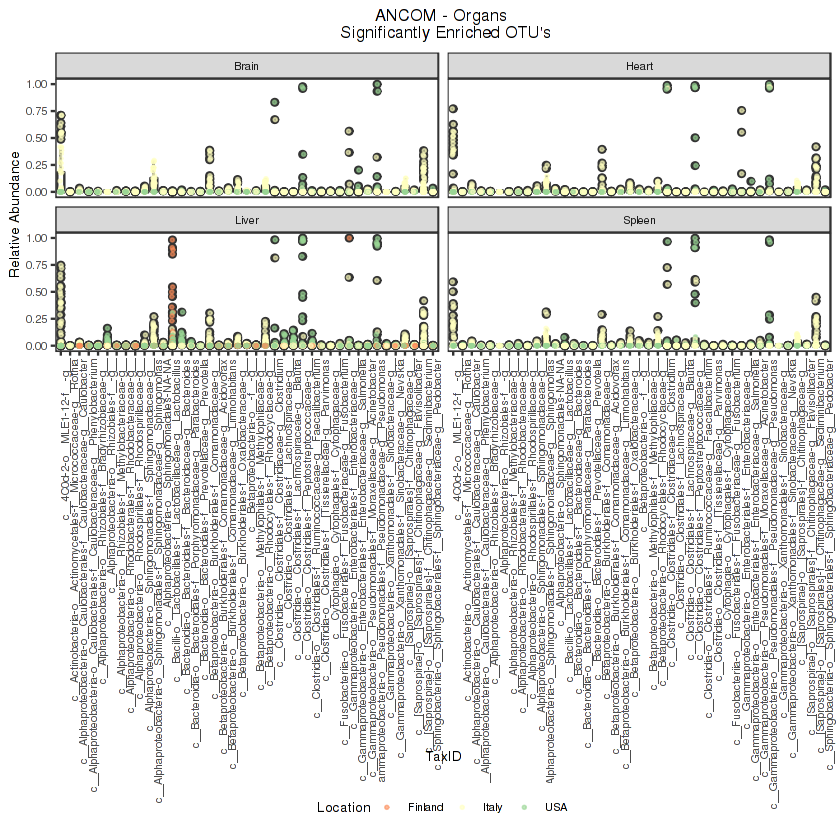

In [48]:
p = ggplot(comp.organs, aes(x = TaxID, y = Abundance)) + ggtitle("ANCOM - Organs \n Significantly Enriched OTU's")

p = p + geom_boxplot() + ylab("Relative Abundance")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

#p = p + scale_y_continuous(limits = c(0,50))

p = p + geom_point(size = .5,alpha=.6, aes(color = Location),
                   position = position_jitter(h = 0, w = 0.1)) +
                  scale_colour_brewer(palette="Spectral")

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ, ncol=2)

p

In [49]:
png('ancom_organs.png', width=10, height=15, units='in', res=300)
plot(p)
dev.off()

png 
  2

### Plotting ANCOM ASVs by Organ

In [6]:
Brain = subset_samples(cadaver, Organ=="Brain")
Heart = subset_samples(cadaver, Organ=="Heart")
Liver = subset_samples(cadaver, Organ=="Liver")
Prostate = subset_samples(cadaver, Organ=="Prostate")
Uterus = subset_samples(cadaver, Organ=="Uterus")
Spleen = subset_samples(cadaver, Organ=="Spleen")

In [21]:
subset1 <- subset(otu_table(cadaver), 
        rownames(otu_table(cadaver)) %in% c(
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGATGTGAAATCCCCGGGCTTAACCTGGGAACTGCATTTGTGACTGCACGGCTAGAGTGTGTCAGAGGGGGGTAGAATTCCACG',
'TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG',
'GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG',
'TACGGAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTCAGAGGTGAAAGCCTGGAGCTCAACTCCAGAACTGCCTTTGAGACTGCATCGCTTGAATCCAGGAGAGGTCAGTGGAATTCCGAG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTGTGCAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAACTGCACTTGTGACTGCACGGCTAGAGTACGGTAGAGGGGGATGGAATTCCGCG',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTCGTAAGACAGAGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCTTTGTGACTGCGAGGCTAGAGTACGGCAGAGGGGGGTGGAATTCCACG',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGTTTGTAAGTCAGTGGTGAAATCCCCGAGCTTAACTTGGGAACTGCCATTGATACTGCAAGTCTTGAATTTTCTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAGGTAAGTCAGTGGTGAAATCCTGGAGCTTAACTCCAGAACTGCCATTGATACTATCTGTCTTGAATATTGTGGAGGTAAGCGGAATATGTCA',
'TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTACTCAAGTCAGAGGTGAAAGCCCGGGGCTCAACCCCGGAACTGCCTTTGAAACTAGGTGGCTAGAATCTTGGAGAGGCGAGTGGAATTCCGAG',
'TACGAAGGGGGCTAGCGTTGCTCGGAATTACTGGGCGTAAAGGGAGCGTAGGCGGACTGTTAAGTTAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCAGTCTTGAGTACGGAAGAGGTATGTGGAACTCCGAG',
'TACGTAGGGTGCAGGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGTTAAGACAGGTGTGAAATCCCCGGGCTTAACCTGGGAATTGCGCTTGTAACTGGCAGACTGGAGTGTGGCAGAGGGGGGTGGAATTCCAAG',
'TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATATAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGTATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCG',
'TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGAGGGCAGGTAAGTCAGTGGTGAAATCTCCAAGCTTAACTTGGAAACTGCCGTTGATACTATCTATCTTGAATATCGTGGAGGTGGGCGGAATATGTCA',
'TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTATGTAAGACAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTTGTGACTGCATAGCTAGAGTACGGCAGAGGGGGATGGAATTCCGCG'

))

ancom_merged <- merge_phyloseq(subset1, tax_table(cadaver), sample_data(cadaver))

In [22]:
organs.mdf = psmelt(ancom_merged)

In [23]:
brain = organs.mdf[which(organs.mdf$Organ=='Brain'),]
heart = organs.mdf[which(organs.mdf$Organ=='Heart'),]
liver = organs.mdf[which(organs.mdf$Organ=='Liver'),]
spleen = organs.mdf[which(organs.mdf$Organ=='Spleen'),]

ancom.organs = rbind(brain,heart,liver,spleen)

In [24]:
write.csv(ancom.organs, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/organs.ancom.90.sigres.csv")

In [31]:
tax.table = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/tax.table.temp.csv")

In [32]:
head(tax.table)

OTU,Rank1,Rank2,Rank3,Rank4,Rank5,Rank6,Rank7
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCATCACAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTGGAGCTGGAGTGCAGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,s__
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTTTGCAAGTCTGACGTGAAAATCCGGGGCTCAACCCCGGAACTGCGTTGGAAACTGTGAGGCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,s__
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTTTGCAAGTCTGACGTGAAACTCCGGGGCTCAACTCCGGAACTGCGTTGGAAACTGTAAGGCTTGAGTGCCGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAAGGCAAGTCTGAAGTGAAAGCCCGGGGCTTAACCGCGGGACTGCTTTGGAAACTGTCTGGCTGGAGTGCCGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,NA,NA
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAAGGCAAGTCTGAAGTGAAAGCCCGGTGCTTAACGCCGGGACTGCTTTGGAAACTGTTTGGCTGGAGTGCCGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAAGGCAAGTCTGAAGTGAAAGCCCGGTGCTTAACGTCGGGACTGCTTTGGAAACTGTTTAGCTGGAGTGCCGGAGAGGTAAGCGGAATTCCTAG,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__


In [26]:
stats = ancom.organs %>%
    group_by(Organ, OTU, Location) %>%
    summarize(median = median(Abundance), 
              mean = mean(Abundance),
              sd = sd(Abundance),
              sem = sd(Abundance/sqrt(length(Abundance))))
head(stats)

Organ,OTU,Location,median,mean,sd,sem
Brain,GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG,Italy,0.273056058,0.299457905,0.236268943,0.039936741
Brain,GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGTGGTTTGTTAAGTTTGGTGTTAAAGATTGGGGCTCAACCCTGAAACTGCACTGAATACTGGCAGACTCGAGTGTGGTAGAGGCTAGTGGAATTCCCAG,USA,0.000000000,0.000000000,0.000000000,0.000000000
Brain,TACGAAGGGGGCTAGCGTTGCTCGGAATTACTGGGCGTAAAGGGAGCGTAGGCGGACTGTTAAGTTAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCAGTCTTGAGTACGGAAGAGGTATGTGGAACTCCGAG,Italy,0.008201523,0.009188505,0.006947047,0.001174265
Brain,TACGAAGGGGGCTAGCGTTGCTCGGAATTACTGGGCGTAAAGGGAGCGTAGGCGGACTGTTAAGTTAGAGGTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCAGTCTTGAGTACGGAAGAGGTATGTGGAACTCCGAG,USA,0.000000000,0.000000000,0.000000000,0.000000000
Brain,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG,Italy,0.000000000,0.000000000,0.000000000,0.000000000
Brain,TACGAAGGGGGCTAGCGTTGTTCGGATTTACTGGGCGTAAAGCGCACGTAGGCGGATTCTTAAGTCAGAGGTGAAATCCCAGGGCTCAACCCTGGAACTGCCTTTGATACTGGGGATCTCGAGTTCGAGAGAGGTGAGTGGAACTGCGAG,USA,0.000000000,0.000000000,0.000000000,0.000000000


In [33]:
result = left_join(stats, tax.table)
write.csv(result, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/organs.ancom.90.sigres.csv")

Joining, by = "OTU"
Warning message:
“Column `OTU` joining character vector and factor, coercing into character vector”

In [34]:
result.1 <- mutate(ancom.organs, TaxID = paste(Rank4, Rank5, Rank6, Rank7))
result.2 <- mutate(result, TaxID = paste(Rank4, Rank5, Rank6, Rank7)) 


In [41]:
write.csv(result.1, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/organs.ancom.90.sigres.csv")
write.csv(result.2, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/ANCOM/organs.ancom.90.sigres_summ.stats.csv")


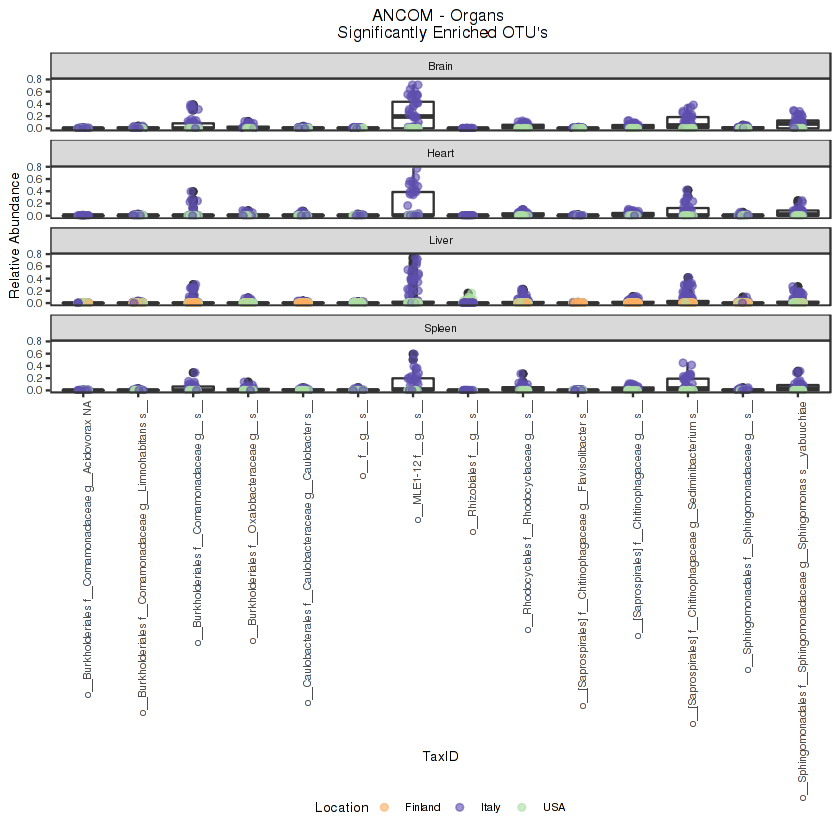

In [36]:
p = ggplot(result.1, aes(x = TaxID, y = Abundance)) + ggtitle("ANCOM - Organs \n Significantly Enriched OTU's")

p = p + geom_boxplot() + ylab("Relative Abundance")  #+ coord_flip(ylim = c(0,200))

#p = p + coord_cartesian(ylim = c(0, 2000))

#p = p + scale_y_continuous(limits = c(0,50))

p = p + geom_point(size = 1.5,alpha=.6, aes(color = Location),
                   position = position_jitter(h = 0, w = 0.1)) +
                  #scale_colour_brewer(palette="Spectral")
                    scale_color_manual(values = c(
                                      '#FDAE61',
                                      '#5E4FAD',
                                      '#ABDDA4'))

p = p + theme_bw() + theme(text=element_text(size=8, color="black",family="Times New Roman"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust=1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ, ncol=1)

p

In [42]:
png('organs.ancom.sigres.png', width=4, height=10, units='in', res=300)
plot(p)
dev.off()

png 
  2

In [ ]:
### T-test of ANCOM sigres

krusk = kruskal.test(Shannon ~ Location, data=dfsha) 
krusk
